# Regresión lineal

## Regresión lineal simple

Modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, la variables independiente $X$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
y_i=\beta_0+\beta_1 x_i+\varepsilon_i  \quad \text{para }i=1,\dots,n
\\]

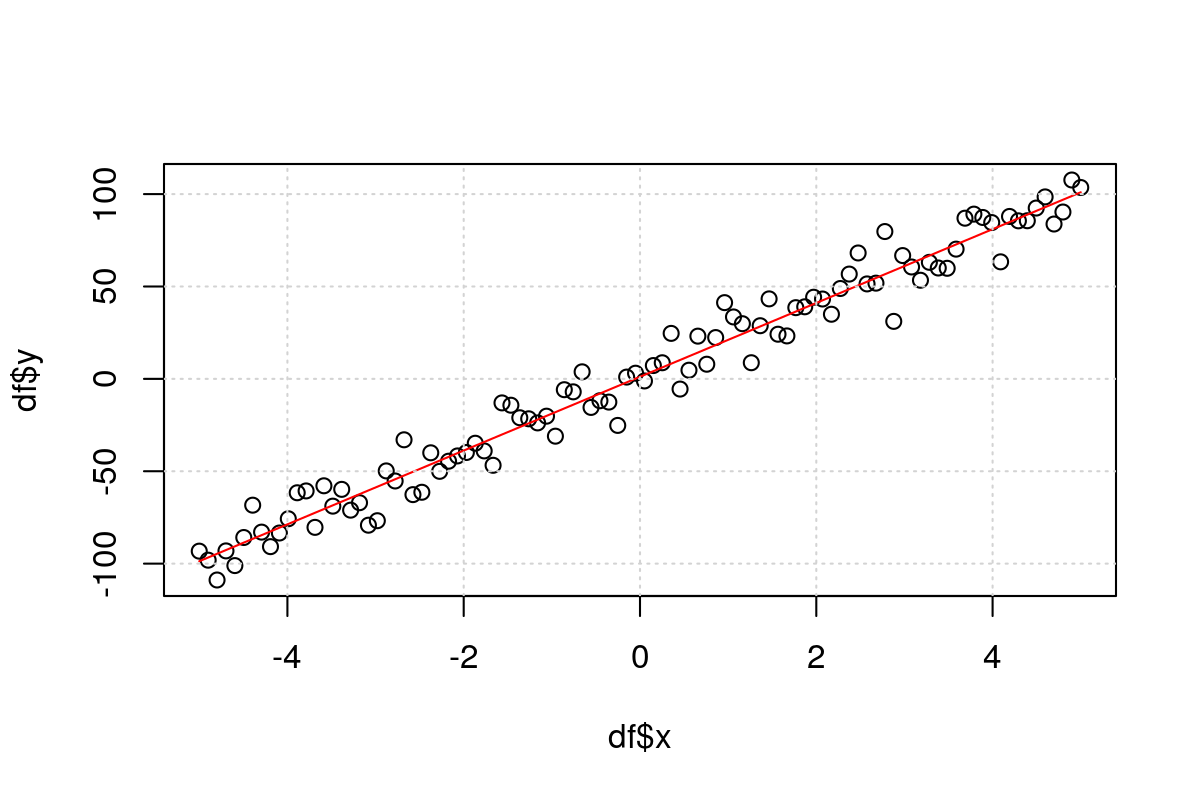

In [3]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 200)

n<-100
x<-seq(-5,5,length.out = n)
df<-data.frame(x,y = 20*x+1+rnorm(n,mean=1,sd=10))
model <- lm(y~x,data=df)
plot(df$x,df$y)
lines(df$x,predict(model,df),col="red")
grid()


Esto significa que se puede expandir de la forma:
\\[
\begin{split}
y_1 &=\beta_0+\beta_1 x_1+\varepsilon_1  \\
y_2 &=\beta_0+\beta_1 x_2+\varepsilon_2  \\
\vdots& \\
y_n&=\beta_0+\beta_1 x_n+\varepsilon_n 
\end{split}
\\]


donde:
* $y_i$: i-esimo valor de la variable dependiente
* $x_i$: i-esimo valor de la variable independiente
* $\beta_0, \beta_1$: parámetros a determinal que dado un conjunto de $x_i$ produce los mejores $y_i$
 * $\beta_0$ : Puede ser llamado sesgo, bias, intercept o término constante. Indica el corte en el eje Y
 * $\beta_1$ : Puede ser llamado pendiente, slope. Indica cuanto aumenta Y por cada incremento de X
* $\varepsilon_i$: error, valor aleatorio.

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 1 & x_1\\ 
 1 & x_2 \\ 
 \vdots & \vdots \\ 
 1 & x_n 
\end{bmatrix}
\begin{bmatrix}
\beta_0
\\ 
\beta_1
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]




Donde:
* $Y \in \mathbb{R}^{n \times 1}$ 
* $X \in \mathbb{R}^{n \times 2}$ 
* $\beta \in \mathbb{R}^{1 \times 2}$ 
* $\varepsilon \in \mathbb{R}^{n \times 1}$ 



Podemos usar la matriz inversa para resolver ecuaciones:
\\[
\begin{split}
Y &= X \beta \\
X^{-1}Y&=X^{-1}X \beta \\
X^{-1}Y&=I\beta \\
X^{-1}Y&=\beta \\
\end{split}
\\]


### Pseudoinversa Moore-Penrose

¿Qué ocurre si la matriz que queremos invertir no es cuadrada? Entonces el sistema de ecuaciones no tiene una única solución o simplemente no tiene solución.

Lo que tratamos de encontrar es la menos mala de las soluciones.

Para números reales se define como:
\\[
X^+ = \left( X^{\intercal} X  \right)^{-1} X^{\intercal}
\\]
Cuando:
\\[
X^+X = I
\\]



El problema original consistía en querer calcular $\beta$ de tal forma que se minimice la influencia de $\varepsilon$:
\\[
Y=X \beta+\varepsilon
\\]
En nuestro sistema $\varepsilon$ es desconocido, pero sabemos que tiene media cero y varianza finita. Así que  simplificamos el siguiente sistema de ecuaciones:

\\[
\begin{split}
Y=&X \hat{\beta} \\
X^+Y=& X^+X \hat{\beta} \\
X^+Y=& \hat{\beta} \\
X^+Y=& \hat{\beta} \\
\left( X^{\intercal}X  \right)^{-1} X^{\intercal} Y =& \hat{\beta}
\end{split}
\\]

Ahora tenemos, a partir de $X$ e $Y$ una estimación $\hat{\beta}$. Podemos entonces, a partir de valores conocidos de $X$ calcular una estimación de $\hat{Y}$. 
\\[
\hat{Y}=X \hat{\beta}
\\]

Evidentemente $Y \neq \hat{Y}$, llamaremos **residuo**(error) a la diferencia entre el valor real y el valor estimado : $Y-\hat{Y}$. 

El método anterior garantiza que el error cuadrático medio sea mínimo.
\\[
MSE = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}
\\]

Es decir, nuestra tarea consiste en **minimizar** la función $MSE$ para que nuestro modelo $\hat{Y}$ sea **óptimo**. La función MSE es convexa y cuadrática.

#### Coeficiente de determinación $R^2$


Proporciona una medida de como de bien nuestra medida sigue al modelo. Se calcula mediante:
\\[
R^2=1-\frac{SS_{res}}{SS_t}
\\]

Donde $SS_{res}$ es la suma del cuadrado de los residuos:
\\[
SS_{res}=\sum_i (y_i-\hat {y_i})^2
\\]

y $SS_{tot}$ es proporcional a la varianza de $Y$:

\\[
SS_{tot}=\sum_i (y_i-\bar{y})^2
\\]

Cuanto más cercano a $1$ mejor seguirá la predicción a los datos reales.

### Descenso por gradientes

Vamos a tratar de minimizar la función MSE con lo que hemos aprendido del descenso de gradientes:

[1] 57

[1]  1.141682 19.968729


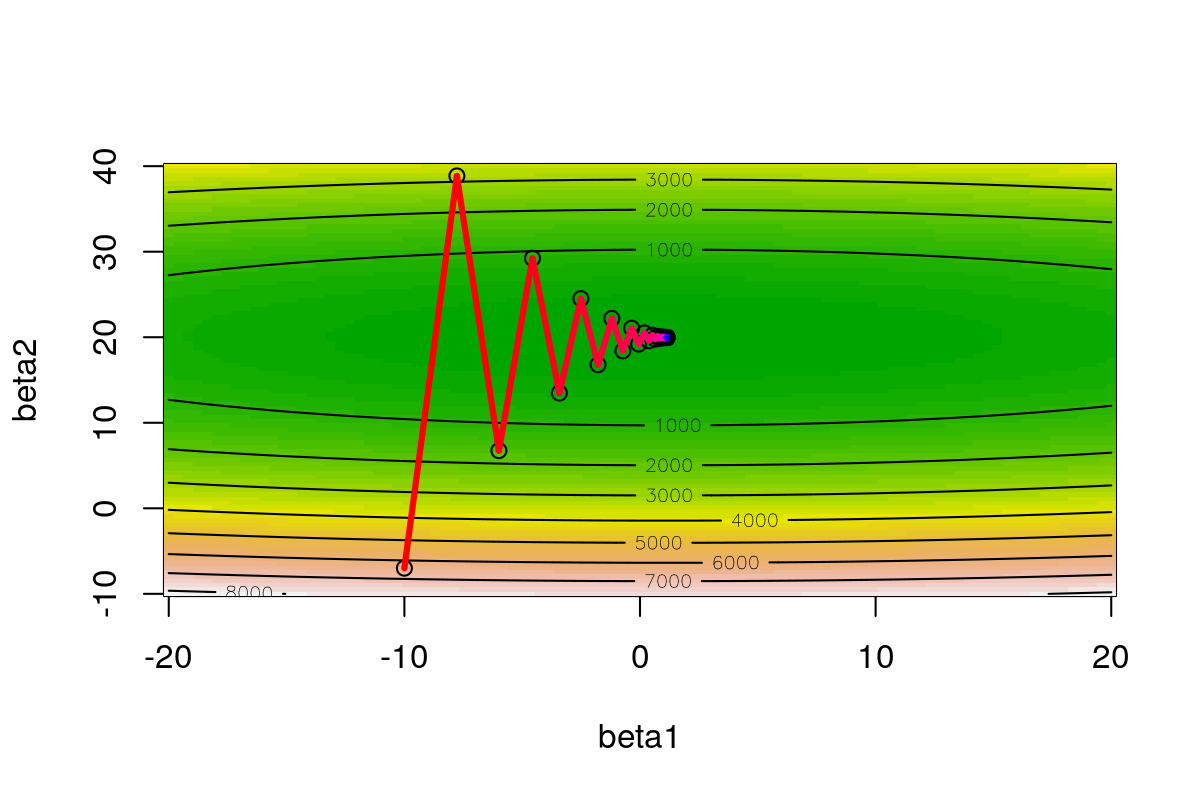

In [4]:
library(pracma)
library(plotrix)

mymodel<-function(x,beta1,beta2){beta1+x*beta2}

mse<-function(beta1,beta2){
    out<-rep(NA,length=length(beta1))
    for(i in 1:length(beta1)){
        out[i]<-sum((df$y-mymodel(df$x,beta1[i],beta2[i]))^2)/nrow(df)
    }
    out
}

beta1 <- seq(-20,20,length=100)
beta2 <- seq(-10,40,length=100)
z <- outer(beta1,beta2,mse)
image(beta1,beta2,z,col = terrain.colors(39))
contour(beta1,beta2,z,add=T)


myfuncVector<-function(x){ mse(x[1],x[2]) }

x_0 <- c(-10,-7)
delta <- 0.1
#delta <- 1
criterio_convergencia<-1e-4

x_historico<-data.frame(x=x_0[1],y=x_0[2])
for (i in 1:5000){
    g <- grad(myfuncVector,x_0)
    #g <- inv(hessian(myfuncVector,x_0)) %*% as.matrix(grad(myfuncVector,x_0),cols=1)
    if(abs(sum(g))<criterio_convergencia){
        break;
    }
    x_new <- x_0 - g*delta     
    x_0 <- x_new
    x_historico<-rbind(x_historico,data.frame(x=x_0[1],y=x_0[2]))
}
nrow(x_historico)
print(x_0)
points(x_historico$x,x_historico$y,col="black")
color.scale.lines(x_historico$x,x_historico$y,c(1,1,0),0,c(0,1,1),colvar=1:nrow(x_historico),lwd=3)


### Ejemplo Regresión lineal:

In [5]:
library(MASS)
animals <- unique(rbind(Animals, mammals))
head(animals)

,body,brain
,<dbl>,<dbl>
Mountain beaver,1.35,8.1
Cow,465.00,423.0
Grey wolf,36.33,119.5
Goat,27.66,115.0
Guinea pig,1.04,5.5
Dipliodocus,11700.00,50.0


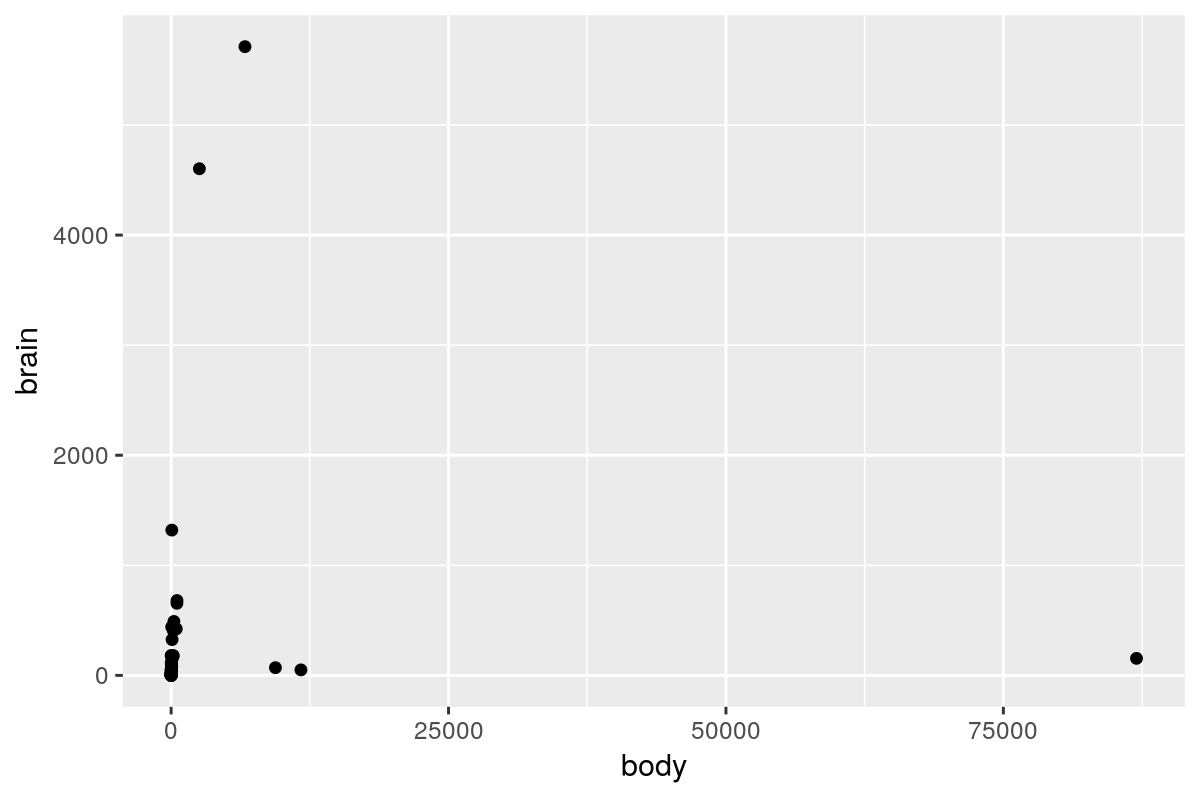

In [6]:
library(ggplot2)
ggplot(animals,aes(x=body,y=brain))+geom_point()

In [7]:
model<-lm(brain~body, data=animals)
summary(model)


Call:
lm(formula = brain ~ body, data = animals)

Residuals:
   Min     1Q Median     3Q    Max 
-486.3 -262.4 -249.3 -109.7 5417.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 2.663e+02  1.152e+02   2.313    0.024 *
body        4.304e-03  1.048e-02   0.411    0.683  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 915.1 on 63 degrees of freedom
Multiple R-squared:  0.002669,	Adjusted R-squared:  -0.01316 
F-statistic: 0.1686 on 1 and 63 DF,  p-value: 0.6827


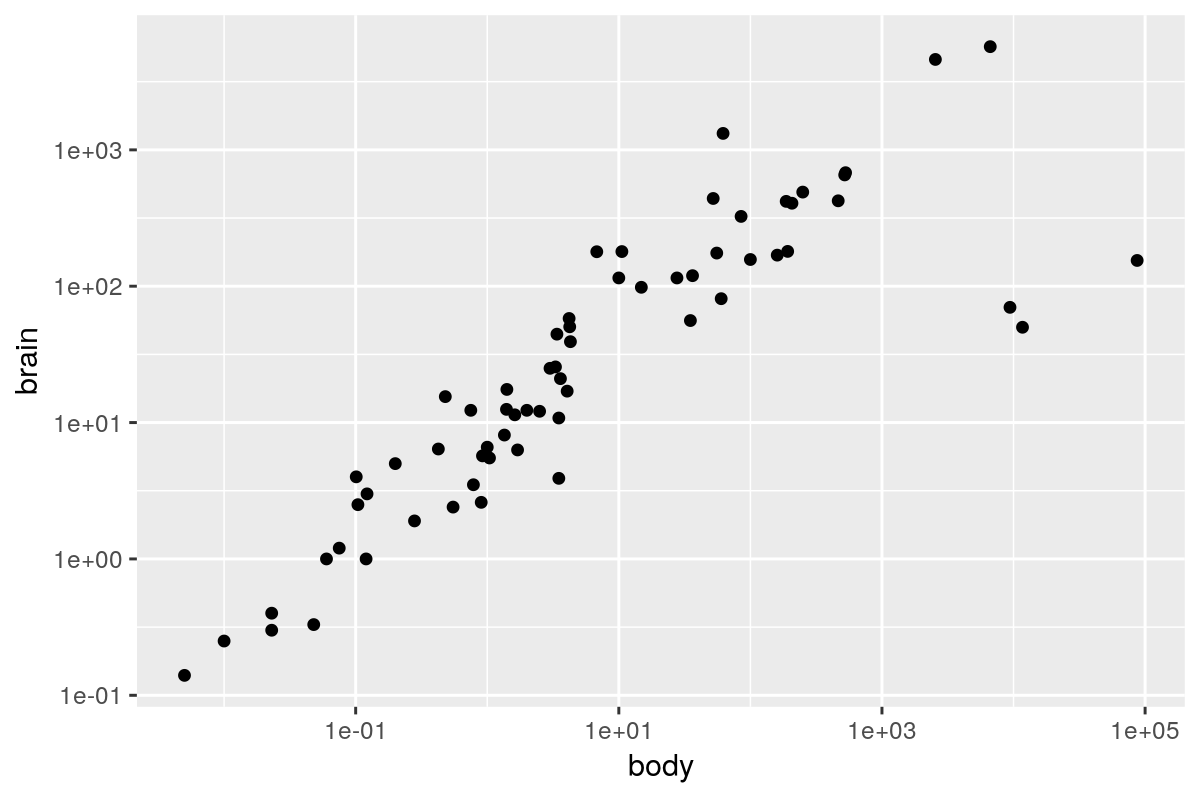

In [8]:
ggplot(animals,aes(x=body,y=brain))+geom_point()+
    scale_x_continuous(trans='log10')+
    scale_y_continuous(trans='log10')

In [9]:
animals[animals$body>1000,]

,body,brain
,<dbl>,<dbl>
Dipliodocus,11700,50.0
Asian elephant,2547,4603.0
African elephant,6654,5712.0
Triceratops,9400,70.0
Brachiosaurus,87000,154.5



Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




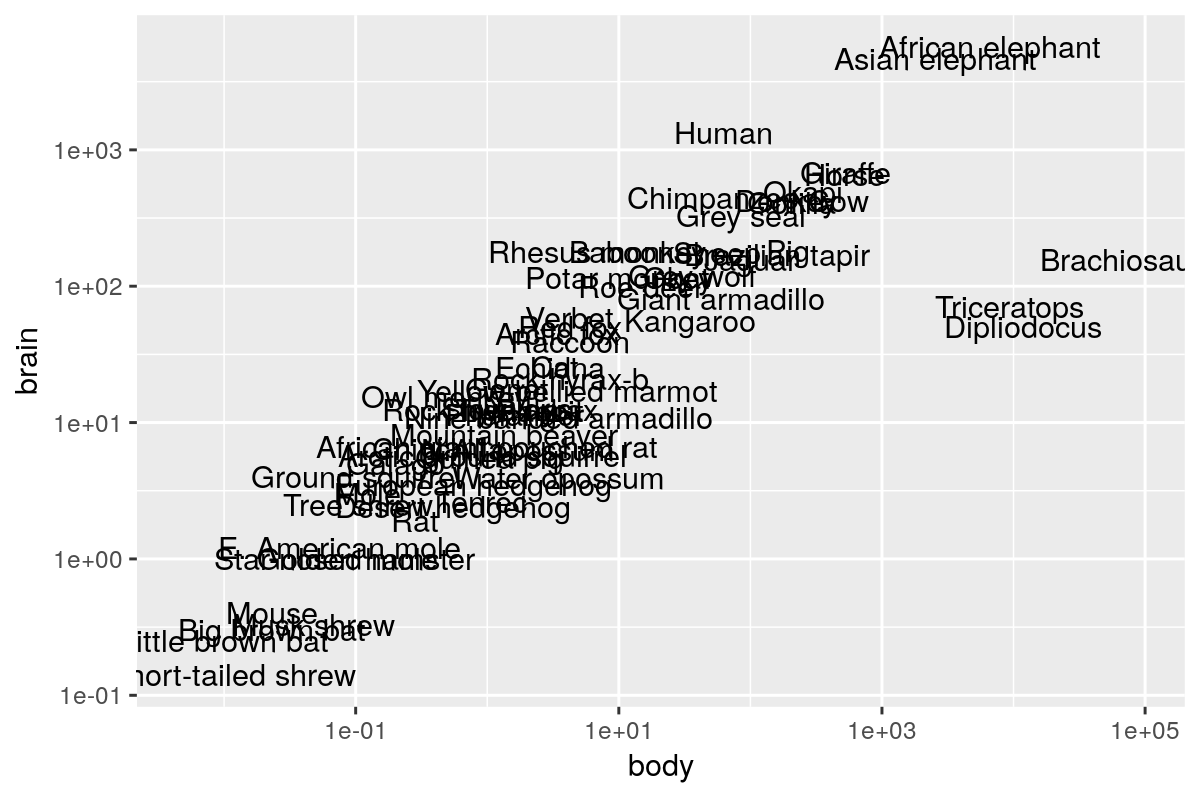

In [10]:
library(dplyr)
library(tibble)

ggplot(animals %>% rownames_to_column(var = "especie"),aes(x=body,y=brain))+
    scale_x_continuous(trans='log10')+
    scale_y_continuous(trans='log10')+geom_text(aes(label=especie))

In [11]:
animals %>% rownames_to_column(var = "especie") %>% 
    mutate(log_body=log10(body)) %>%
    mutate(log_brain=log10(brain)) -> animals_log

In [12]:
model <- lm(log_brain ~ log_body, data = animals_log)
summary(model)


Call:
lm(formula = log_brain ~ log_body, data = animals_log)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67605 -0.22040  0.06732  0.27838  1.11719 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.94315    0.07037   13.40   <2e-16 ***
log_body     0.59152    0.04117   14.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5092 on 63 degrees of freedom
Multiple R-squared:  0.7662,	Adjusted R-squared:  0.7625 
F-statistic: 206.4 on 1 and 63 DF,  p-value: < 2.2e-16


In [13]:
model$coefficients

(Intercept)    log_body 
  0.9431510   0.5915198

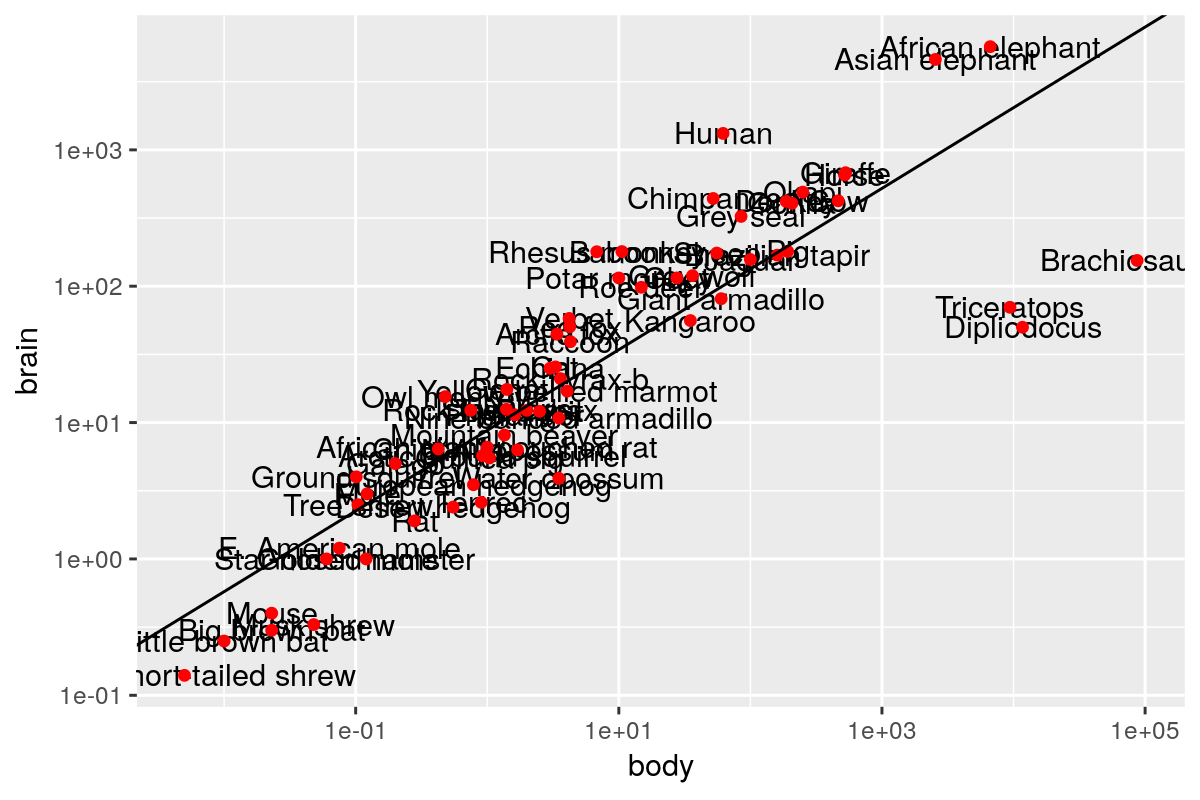

In [14]:
ggplot(animals_log ,aes(x=body,y=brain))+    
    scale_x_continuous(trans='log10')+
    scale_y_continuous(trans='log10')+geom_text(aes(label=especie))+
    geom_point(color='red')+
    geom_abline(slope = model$coefficients[2], intercept = model$coefficients[1])

In [15]:
animals_log$pred_log_brain <- predict(model, animals_log)
animals_log$pred_brain <- 10^predict(model, animals_log)

animals_log$residual <- animals_log$log_brain - animals_log$pred_log_brain
animals_log$residual <- model$residuals
head(animals_log)

,especie,body,brain,log_body,log_brain,pred_log_brain,pred_brain,residual
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Mountain beaver,1.35,8.1,0.13033377,0.9084850,1.0202460,10.477219,-0.1117610
2,Cow,465.00,423.0,2.66745295,2.6263404,2.5210024,331.896259,0.1053380
3,Grey wolf,36.33,119.5,1.56026540,2.0773679,1.8660790,73.464741,0.2112890
4,Goat,27.66,115.0,1.44185218,2.0606978,1.7960352,62.522334,0.2646627
5,Guinea pig,1.04,5.5,0.01703334,0.7403627,0.9532266,8.978971,-0.2128639
6,Dipliodocus,11700.00,50.0,4.06818586,1.6989700,3.3495637,2236.473030,-1.6505937


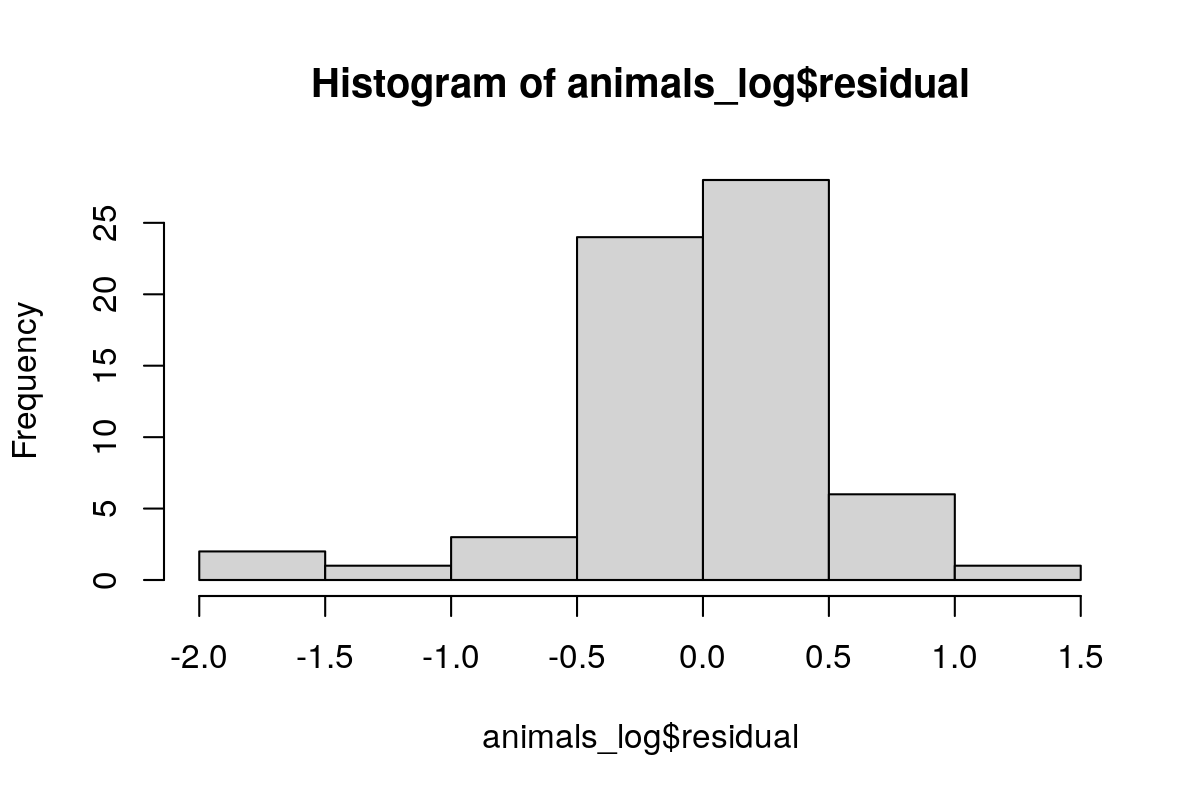

In [16]:
hist(animals_log$residual)

In [17]:
animals_log %>% mutate(abs_residual=abs(residual)) %>% arrange(desc(abs_residual)) %>% top_n(10)

Selecting by abs_residual



especie,body,brain,log_body,log_brain,pred_log_brain,pred_brain,residual,abs_residual
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brachiosaurus,87000.000,154.50,4.9395193,2.1889285,3.864975,7327.817665,-1.6760462,1.6760462
Dipliodocus,11700.000,50.00,4.0681859,1.6989700,3.349564,2236.473030,-1.6505937,1.6505937
Triceratops,9400.000,70.00,3.9731279,1.8450980,3.293335,1964.875184,-1.4482369,1.4482369
Human,62.000,1320.00,1.7923917,3.1205739,2.003386,100.782762,1.1171877,1.1171877
Rhesus monkey,6.800,179.00,0.8325089,2.2528530,1.435597,27.264438,0.8172565,0.8172565
Baboon,10.550,179.50,1.0232525,2.2540645,1.548425,35.352908,0.7056393,0.7056393
Asian elephant,2547.000,4603.00,3.4060289,3.6630410,2.957885,907.579570,0.7051563,0.7051563
Chimpanzee,52.160,440.00,1.7173376,2.6434527,1.958990,90.989288,0.6844624,0.6844624
Water opossum,3.500,3.90,0.5440680,0.5910646,1.264978,18.406790,-0.6739134,0.6739134


El peso medio de un Neanderthal podría rondar los 72kg(https://en.wikipedia.org/wiki/Neanderthal_anatomy), y el peso de su cerebro alrededor de 1400g (https://www.scientificamerican.com/article/rambling-road-to-humanity/).
¿Cómo encaja esto en nuestro modelo?

In [18]:
peso <- 72
log_brain <- predict(model, data.frame(log_body=log10(peso)))
paste("El peso esperado sería ",10^log_brain,'gramos')

[1] "El peso esperado sería  110.10322344536 gramos"

In [19]:
animals_log$especie

[1] "Mountain beaver"           "Cow"                      
 [3] "Grey wolf"                 "Goat"                     
 [5] "Guinea pig"                "Dipliodocus"              
 [7] "Asian elephant"            "Donkey"                   
 [9] "Horse"                     "Potar monkey"             
[11] "Cat"                       "Giraffe"                  
[13] "Gorilla"                   "Human"                    
[15] "African elephant"          "Triceratops"              
[17] "Rhesus monkey"             "Kangaroo"                 
[19] "Golden hamster"            "Mouse"                    
[21] "Rabbit"                    "Sheep"                    
[23] "Jaguar"                    "Chimpanzee"               
[25] "Rat"                       "Brachiosaurus"            
[27] "Mole"                      "Pig"                      
[29] "Arctic fox"                "Owl monkey"               
[31] "Roe deer"                  "Verbet"                   
[33] "Chinchilla"                "Ground squirrel"          
[35] "Arctic ground squirrel"    "African giant pouched rat"
[37] "Lesser short-tailed shrew" "Star-nosed mole"          
[39] "Nine-banded armadillo"     "Tree hyrax"               
[41] "N.A. opossum"              "Big brown bat"            
[43] "European hedgehog"         "Galago"                   
[45] "Genet"                     "Grey seal"                
[47] "Rock hyrax-a"              "Water opossum"            
[49] "Yellow-bellied marmot"     "Little brown bat"         
[51] "Slow loris"                "Okapi"                    
[53] "Baboon"                    "Desert hedgehog"          
[55] "Giant armadillo"           "Rock hyrax-b"             
[57] "Raccoon"                   "E. American mole"         
[59] "Musk shrew"                "Echidna"                  
[61] "Brazilian tapir"           "Tenrec"                   
[63] "Phalanger"                 "Tree shrew"               
[65] "Red fox"

El peso de un leon macho adulto adulto son 170kg, y su tamaño de cerebro sería 240g
https://faculty.washington.edu/chudler/facts.html


In [20]:
peso <- 170
log_brain <- predict(model, data.frame(log_body=log10(peso)))
paste("El peso esperado sería ",10^log_brain,'gramos')

[1] "El peso esperado sería  183.023055834998 gramos"

In [21]:
# Para una rata de 400g el tamaño de su cerebro esperado sería de 2g, nuestro modelo dice:

peso <- 0.4
log_brain <- predict(model, data.frame(log_body=log10(peso)))
paste("El peso esperado sería ",10^log_brain,'gramos')

[1] "El peso esperado sería  5.1022484181624 gramos"

## Regresión lineal múltiple

Ahora ahora habíamos visto como encontrar como el cambio en una variable puede afectar a otra, pero ¿qué ocurre si son varias las variables que alteran el comportamiento de nuestra variable objetivo? En este caso necesitamos utilizar la regresión lineal múltiple.

Es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, las variables independientes $X_i$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
Y=\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p+\varepsilon = \sum \beta_k X_k+\varepsilon
\\]


donde:
* $Y$: variable dependiente
* $X_1,X_2,\cdots ,X_p$: variables independientes
* $\beta_0, \beta_1,\beta_2,\cdots ,\beta_p$: parámetros a determinal que dado un $X_k$ produce el mejor posible $Y$
* $\varepsilon$: error, valor aleatorio.

Condiciones para aplicarlo:
1. Que la relación entre las variables sea lineal.
2. Que los errores en la medición de $X_k$ sean independientes entre sí.
3. Que los errores sigan una distribución normal de media 0 y varianza constante
4. Que la varianza sea constante, se cumple heterocedasticidad


Para calcular el valor óptimo de $\beta$ vamos a utilizar un poco de álgebra linea. 
\\[
\begin{split}
y_1 &=\beta_1 x_{11}+\beta_2 x_{12}+\beta_3 x_{13}+\cdots+\beta_p x_{1p}+\varepsilon_1  \\
y_2 &=\beta_1 x_{21}+\beta_2 x_{22}+\beta_3 x_{23}+\cdots+\beta_p x_{2p}+\varepsilon_1  \\
\vdots& \\
y_n &=\beta_1 x_{n1}+\beta_2 x_{n2}+\beta_3 x_{n3}+\cdots+\beta_p x_{np}+\varepsilon_1  \\
\end{split}
\\]

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 x_{11} & x_{12} & x_{13} & \cdots & x_{1p} \\ 
 x_{21} & x_{22} & x_{23} & \cdots & x_{2p} \\ 
 \vdots & & & \ddots & \vdots \\ 
 x_{n1} & x_{n2} & x_{n3} & \cdots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ 
\beta_2 \\
\beta_3 \\
\vdots  \\
\beta_p
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]

Al igual que en el caso anterior podemos estimar $\beta$ con:
\\[
\beta=\left( X^{\intercal}X  \right)^{-1} X^{\intercal} Y
\\]

In [ ]:
n<-20
x<-seq(-10,30,length.out = n)
df<-data.frame(x,y = x-3*x-2*x^2+0.1*x^3+1+rnorm(n,mean=1,sd=80))
model <- lm(y~poly(x,3),data=df)
model$coef
options(repr.plot.height=4,repr.plot.width=6)

plot(df$x,df$y)
lines(df$x,predict(model,df),col="red")
grid()

Esta fórmula nos garantiza que el error (residuo) cuadrático medio sea mínimo:
\\[
MSE = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}
\\]

Es decir, nuestra tarea consiste en **minimizar** la **función de coste** ($MSE$) para que nuestro modelo $\hat{Y}$ sea **óptimo**.





## Coeficiente de determinación $R^2$


Proporciona una medida de como de bien nuestra medida sigue al modelo. Se calcula mediante:

\\[
R^2=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{MSE(y,y')}{VAR(y)}
\\]

Donde $SS_{res}$ es la suma del cuadrado de los residuos:
\\[
SS_{res}=\sum_i (y_i-y_i')^2
\\]

y $SS_{tot}$ es proporcional a la varianza de $Y$:

\\[
SS_{tot}=\sum_i (y_i-\bar{y})^2
\\]

Cuanto más cercano a $1$ mejor seguirá la predicción a los datos reales.

In [22]:
myrsquared<-function(Y,est_Y){
    Rsq <- 1-(sum((Y-est_Y)^2))/(sum((Y-mean(Y))^2))
    return(Rsq)
}

## Generalización

La habilidad de obtener un resultado en datos no observados se llama **generalización**.

El objetivo en estadística era encontrar un modelo que mejor encajara con los datos observados, era un problema de optimización pura. En *Data Mining* queremos un modelo para hacer predicciones, eso significa que necesitamos un modelo que funcione lo mejor posible con **datos que no hemos observado nunca**.

Es por ello que los datos se dividen en como mínimo dos grupos:
* Datos de **entrenamiento**: Son los datos con los que entrenaremos nuestro modelo.
* Datos de **test**: Son los datos con los que comprobaremos la calidad de nuestro modelo. Son datos que el modelo no ha visto nunca.

Veamos un ejemplo, supongamos que tenemos los siguientes datos

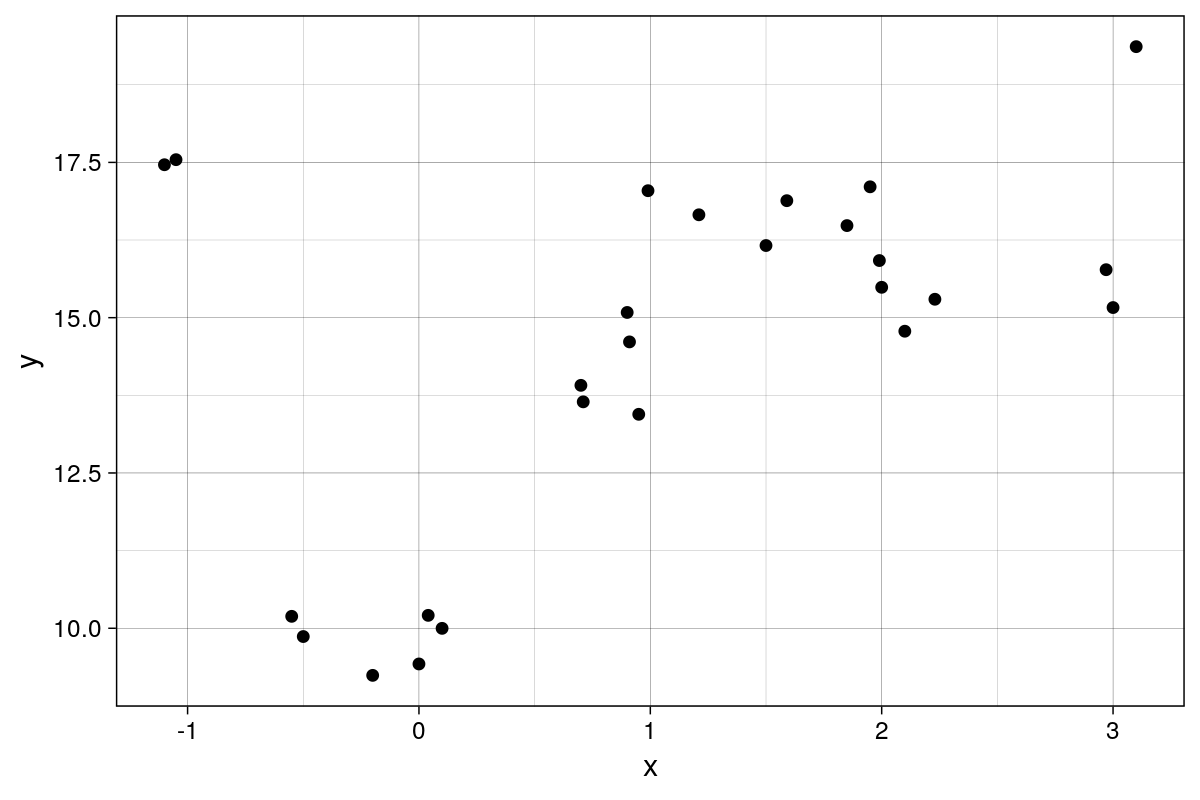

In [23]:
library(ggplot2)
x<-c(-1.1,-1.05,0.99,0.95,-0.5,-0.55,0,0.1,0.7,0.71,0.9,0.91,1.5,1.85,1.95,1.99,2,2.1,3,3.1,-0.20,0.04,1.21,1.59,2.23,2.97)
y<-c(17.462034,17.543560,17.044042,13.444434,9.866625,10.191937,9.425260,9.998468,13.910648,13.645024,15.083907,14.610008,16.161246,16.482340,17.106625,15.919612,15.488990,14.781905,15.162828,19.362935,9.24160,10.20768,16.65628,16.88339,15.29640,15.77241)
data.df<-data.frame(x,y)
ggplot(data.df,aes(x=x,y=y))+geom_point()+theme_linedraw()

Queremos hacer un modelo que dado un valor de X, me de el valor más cercano de Y. Podemos probar con modelos más o menos complejos, con distinto grado:

RMSE  Rsquared       MAE 
0.7969074 0.9222614 0.5993939

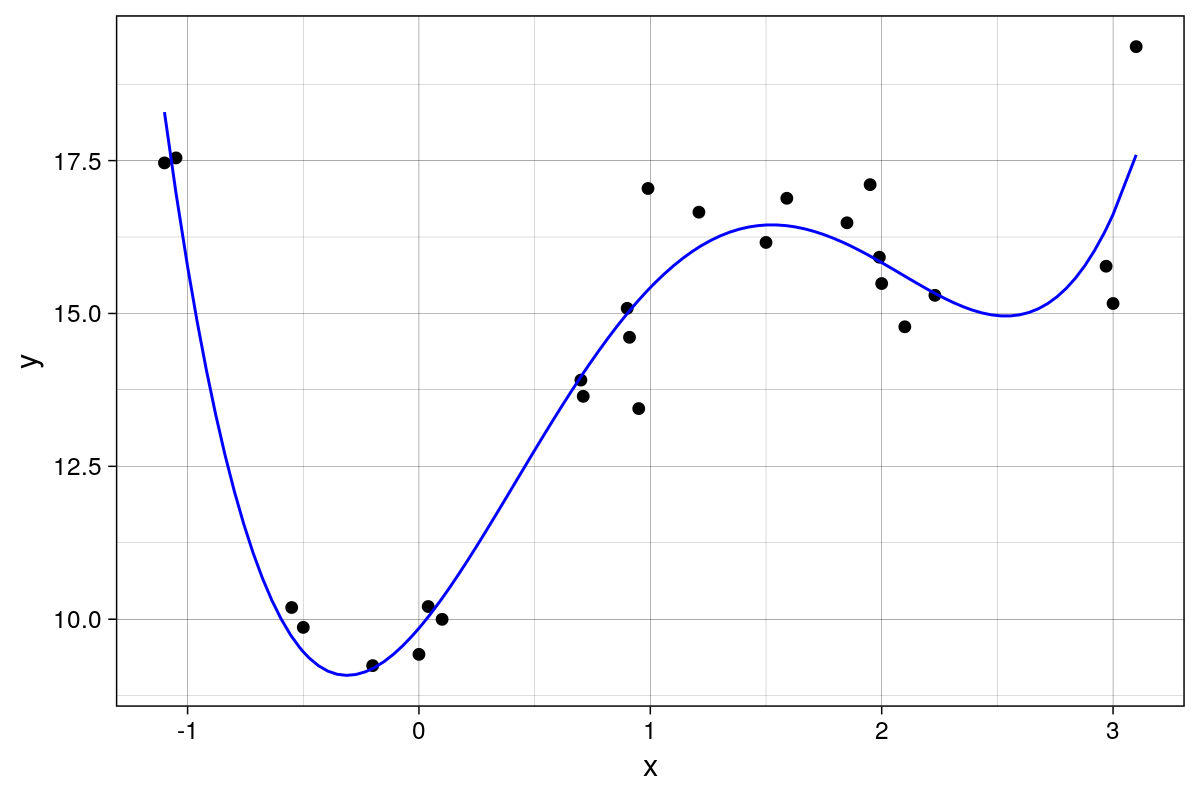

In [24]:
model<-lm(y~poly(x,4),data=data.df)
new.data.df<-data.frame(x=c(data.df$x,seq(-1,3,length.out=100)),y=NA,yp=NA)
new.data.df$yp<-predict(model,new.data.df)

data.df$yp<-predict(model,data.df)

new.data.df<-rbind(new.data.df,data.df)
ggplot(new.data.df,aes(x=x,y=y))+geom_point(na.rm=TRUE)+geom_line(aes(y=yp),color="blue")+theme_linedraw()

caret::postResample(pred=data.df$yp, obs=data.df$y)

Cual de todos los modelos es el mejor? Acordaros que buscamos generalización, queremos que el modelo se comporte lo mejor posible con datos que no ha visto. 
Por ello dividimos nuestros datos entre test y training. Una buena prácita consiste en usar un 70%-80% para entrenamiento y el resto para tests. 
En este caso podemos por ejemplo coger 20 muestras para entrenamiento y el resto para test

In [25]:
calcmse<-function(y_real,y_est){
  sum((y_real-y_est)^2)/length(y_real)
}

idx<-1:20
train.df<-data.df[idx,c("x","y")]
test.df<-data.df[-idx,c("x","y")]

[1] "El MSE training es: 0.357704820295634"

[1] "El MSE testing es: 2.4286622507204"

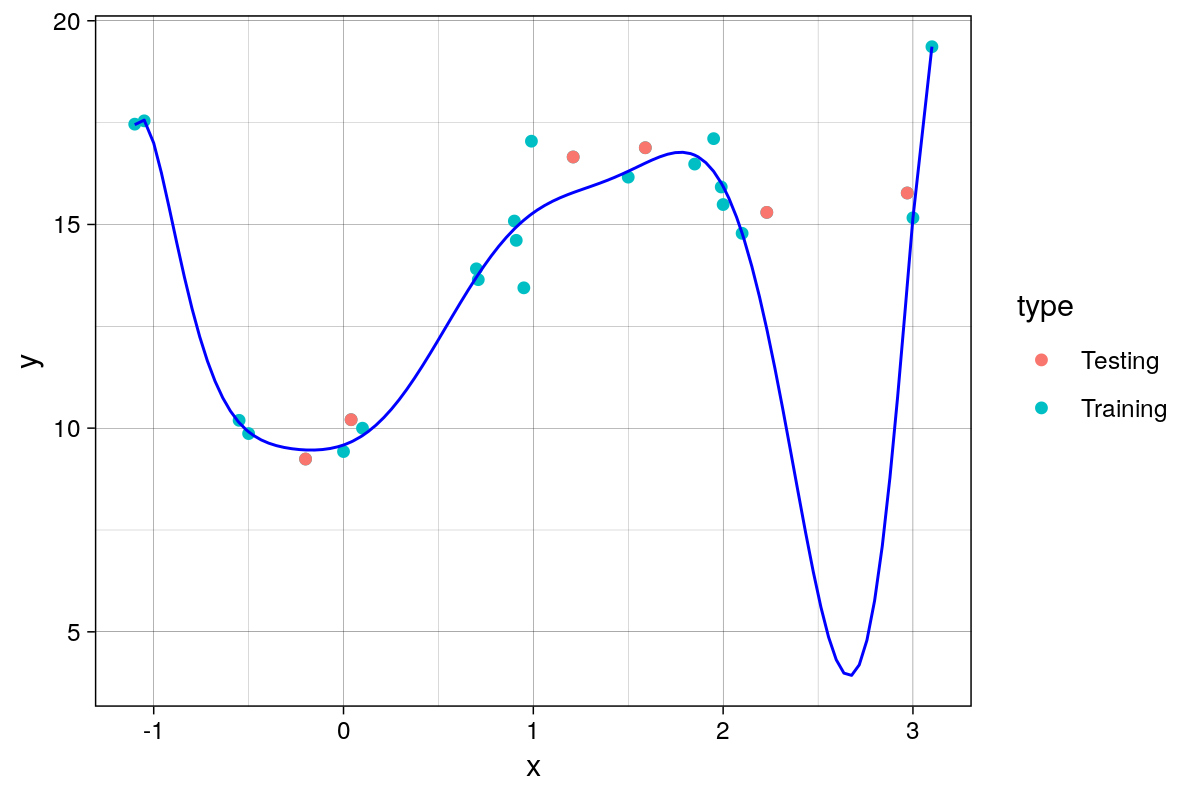

In [33]:
model<-lm(y~poly(x,10),data=train.df)

new.data.df<-data.frame(x=c(data.df$x,seq(-1,3,length.out=100)),y=NA,yp=NA)
new.data.df$yp<-predict(model,new.data.df)

data.df$yp<-predict(model,data.df)

new.data.df<-rbind(new.data.df,data.df)
new.data.df$type<-"Training"

test.df$type<-"Testing"
test.df$yp<-predict(model,test.df)
new.data.df<-rbind(new.data.df,test.df)


ggplot(new.data.df,aes(x=x,y=y))+geom_point(na.rm=TRUE,aes(color=type))+
  geom_line(aes(y=yp),color="blue")+theme_linedraw()
paste("El MSE training es:",calcmse(y_real=train.df$y, y_est=predict(model,train.df)))
paste("El MSE testing es:", calcmse(y_real=test.df$y,  y_est=predict(model,test.df)))

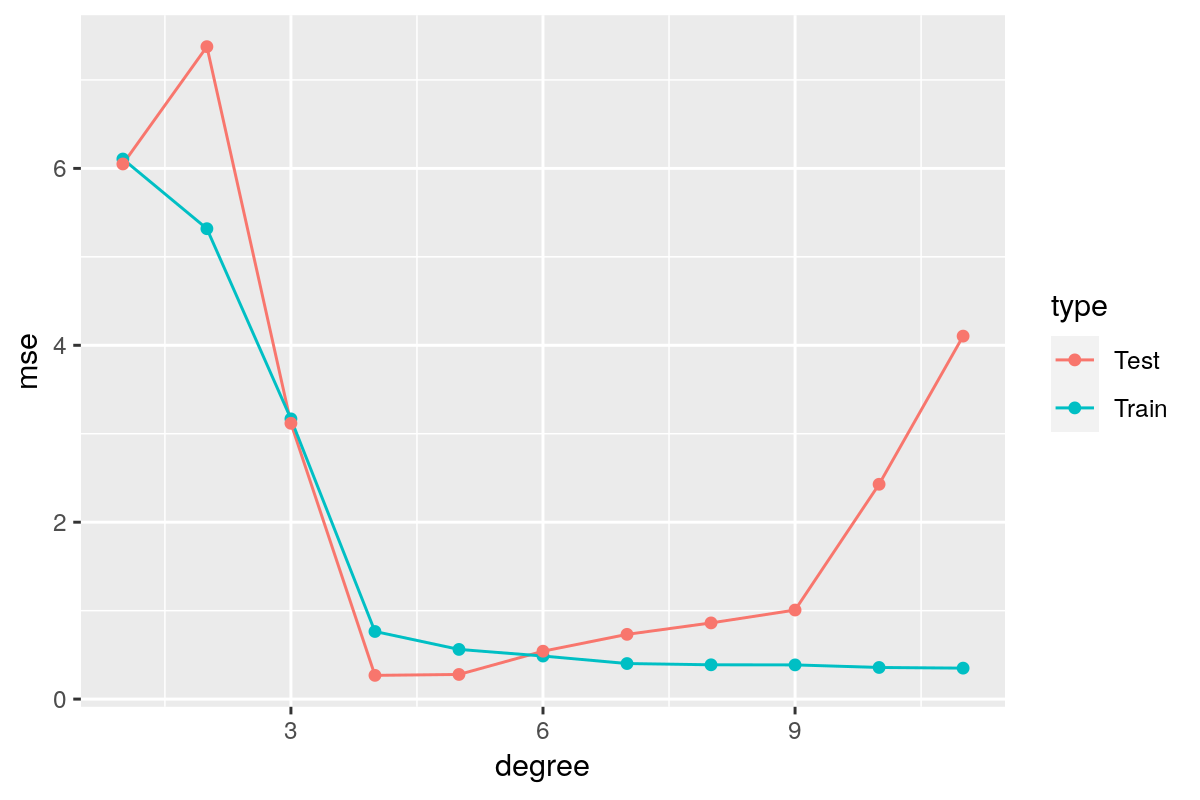

In [27]:

mse_train<-c()
mse_test<-c()
for (i in 1:11){
  model<-glm(formula=y~poly(x,i),data=train.df)
  yp_train<-predict(model,train.df)
  mse_train[i]<-calcmse(train.df$y,yp_train)
  
  yp_test<-predict(model,test.df)
  mse_test[i] <-calcmse(test.df$y,yp_test)
}
mse.df<-data.frame(degree=1:length(mse_train),mse=mse_train,type="Train")
mse.df<-rbind(mse.df,data.frame(degree=1:length(mse_train),mse=mse_test,type="Test"))
ggplot(mse.df,aes(x=degree,y=mse,color=type))+geom_line()+geom_point()


Si un modelo es demasiado simple tanto el error de test como de entrenamiento será alto.

A medida que el modelo es más complejo el error disminuye.

Si el modelo es demasiado complejo ocurre el **sobreajuste** el modelo aprende sobre el ruido de nuestro modelo de entrenamiento y no es capaz de  generalizar bien.
Para evitar el sobreajuste(overfitting) se puede recurrir a simplificar el modelo o a poner limitaciones sobre el mismo. Esto se conoce con el nombre de regularización.
* Regularización Ridge o $L^2$: se evita que los parámetros crezcan demasiado. Se añade la función de coste:
\\[
Coste = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}+\lambda \sum_j \beta^2
\\]
* Regularización Lasso o $L$: permite seleccionar los parámetros que más afectan al resultado. Se añade la función de coste:
\\[
Coste = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}+\lambda \sum_j | \beta |
\\]




### Prediciendo la potencia de generación de una central de ciclo combinado

El conjunto de datos contiene 9568 puntos de datos recopilados de una Central de Ciclo Combinado durante 6 años (2006-2011), cuando la planta de energía se puso a funcionar con carga completa. Las características consisten en variables ambientales promedio por hora, Temperatura Ambiente (AT), Presión ambiente (AP), Humedad relativa (HR) y Vacío de escape (V) para predecir la producción neta de energía eléctrica por hora (PE) de la planta.

Las características consisten en variables ambientales promedio por hora
- **Producción neta de energía** eléctrica por hora (PE) 420.26-495.76 MW
- Temperatura (AT) en el rango de 1.81 ° C y 37.11 ° C,
- Presión ambiental (AP) en el rango de 992.89-1033.30 milibares,
- Humedad relativa (HR) en el rango de 25.56% a 100.16%
- Vacío de escape (V) en el rango de 25.36-81.56 cm Hg

Los promedios se toman de varios sensores ubicados alrededor de la planta que registran las variables ambientales cada segundo. Las variables se dan sin normalización.


https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

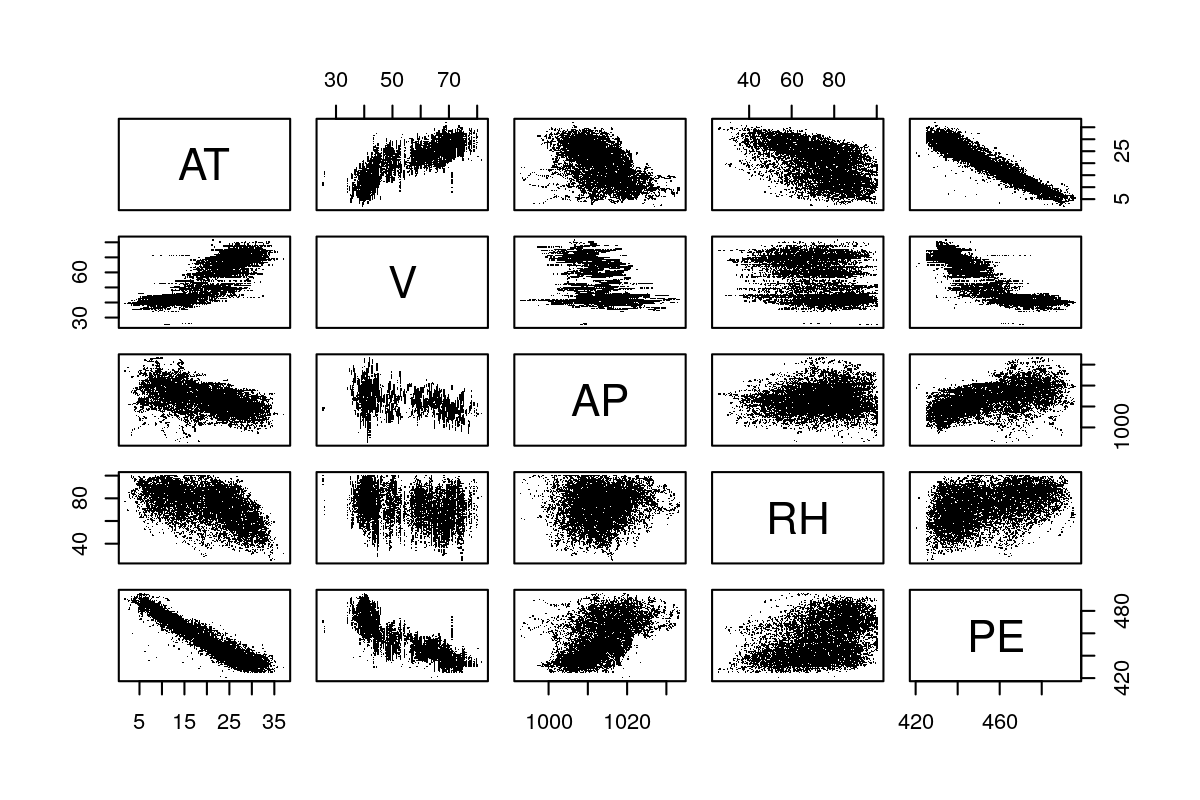

In [34]:
powerplant<-read.csv("data/powerplant.csv")

options(repr.plot.height=4,repr.plot.width=6)
plot(powerplant,pch='.')

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



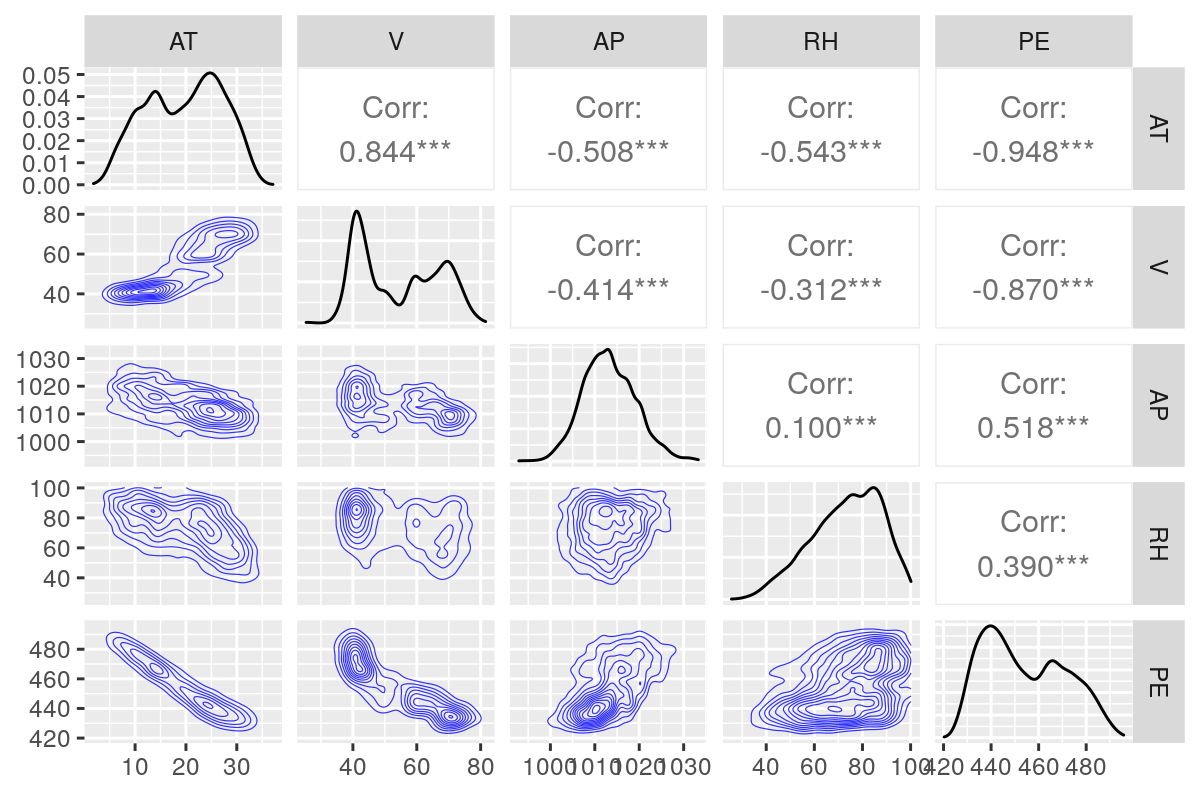

In [35]:
library(GGally)
ggpairs(powerplant, 
        lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       #lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

In [36]:
set.seed(12345)
idx<-sample(1:nrow(powerplant),nrow(powerplant)*0.7)
powerplant.train<-powerplant[idx,]
powerplant.test <-powerplant[-idx,]
model_powerplant<-lm(PE~.,data=powerplant.train)
summary(model_powerplant)


Call:
lm(formula = PE ~ ., data = powerplant.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.426  -3.134  -0.125   3.187  17.786 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 462.670588  11.445161   40.425  < 2e-16 ***
AT           -1.983368   0.018051 -109.878  < 2e-16 ***
V            -0.231893   0.008608  -26.940  < 2e-16 ***
AP            0.054137   0.011107    4.874 1.12e-06 ***
RH           -0.157993   0.004911  -32.169  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.522 on 6692 degrees of freedom
Multiple R-squared:  0.9291,	Adjusted R-squared:  0.929 
F-statistic: 2.191e+04 on 4 and 6692 DF,  p-value: < 2.2e-16


[1] "MSE: 4.52060572398258"

[1] "R^2: 0.92906168865458"

RMSE  Rsquared       MAE 
4.5206057 0.9290617 3.6081818

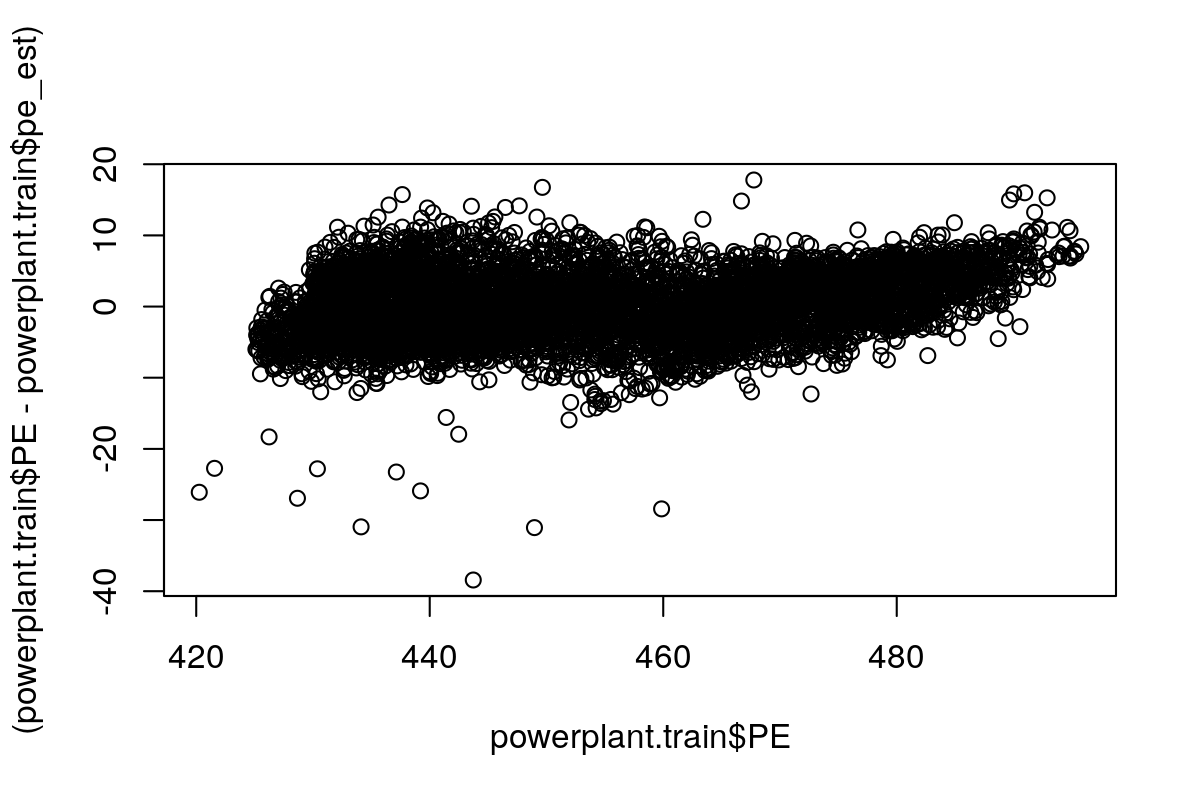

In [37]:
powerplant.train$pe_est<-predict(model_powerplant,powerplant.train)
#plot(powerplant.train$PE,(powerplant.train$PE-powerplant.train$pe_est)^2)
plot(powerplant.train$PE,(powerplant.train$PE-powerplant.train$pe_est))
paste("MSE:", sqrt(mean((powerplant.train$PE-powerplant.train$pe_est)^2)))
paste("R^2:", myrsquared(powerplant.train$PE,powerplant.train$pe_est))
caret::postResample(pred=powerplant.train$pe_est, obs= powerplant.train$PE)

En la gráfica anterior observamos que la varianza de los residuos es más o menos constante a lo largo de todo el rango predicho.  Es decir, NO hay **Heterocedasticidad** o hay muy poca.

En la siguiente podemos ver como los residuos siguen una distribución normal.

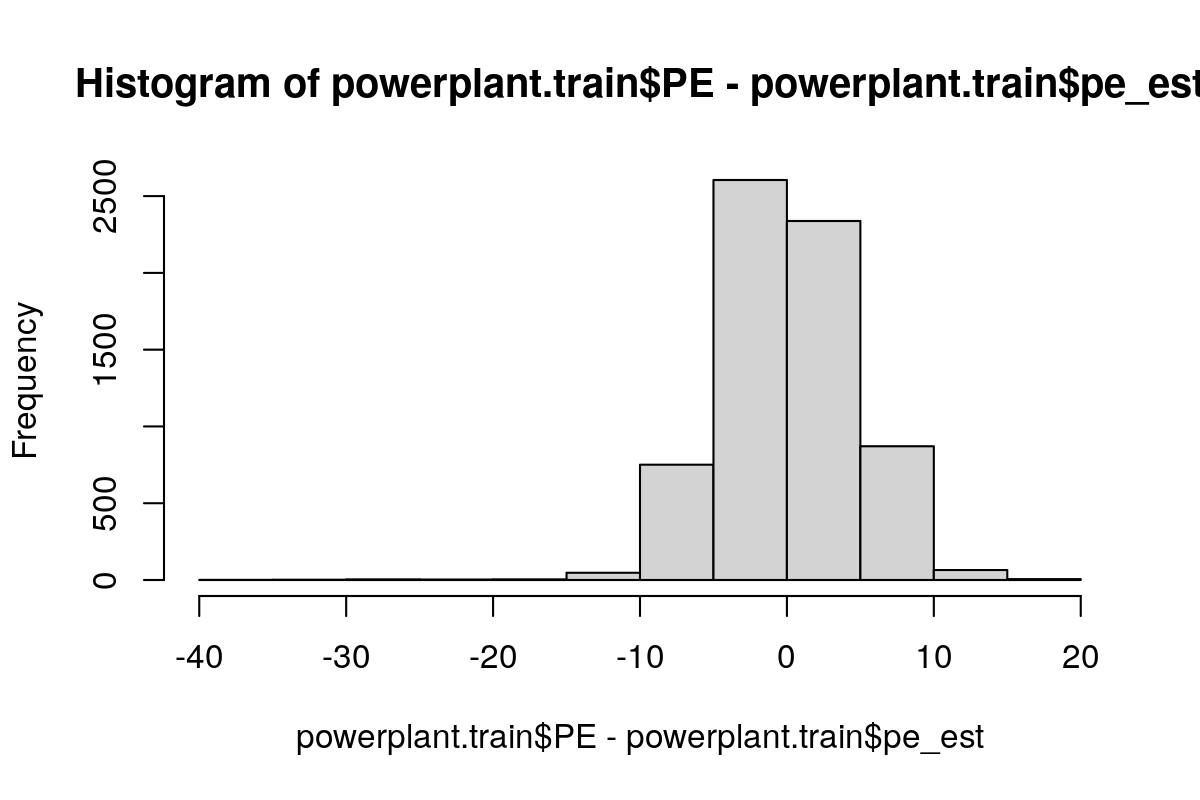

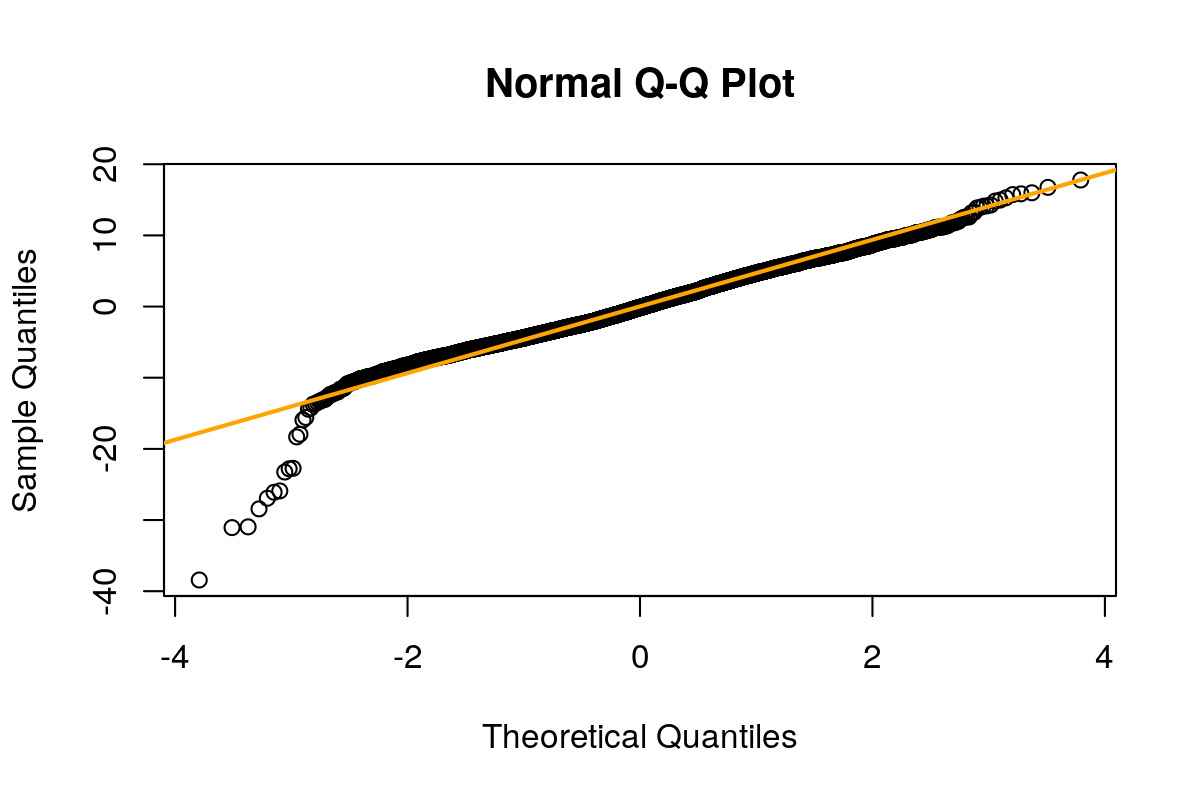

In [38]:
hist(powerplant.train$PE-powerplant.train$pe_est,20)
qqnorm(powerplant.train$PE-powerplant.train$pe_est)
qqline(powerplant.train$PE-powerplant.train$pe_est, col = 'orange', lwd =2)

In [44]:
res <- (powerplant.train$PE-powerplant.train$pe_est)
shapiro.test(res[sample(1:length(res),1000)])


	Shapiro-Wilk normality test

data:  res[sample(1:length(res), 1000)]
W = 0.9793, p-value = 9.945e-11


In [45]:

ks.test((powerplant.train$PE-powerplant.train$pe_est),pnorm,0,sd((powerplant.train$PE-powerplant.train$pe_est)))

Warning message in ks.test((powerplant.train$PE - powerplant.train$pe_est), pnorm, :
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  (powerplant.train$PE - powerplant.train$pe_est)
D = 0.023582, p-value = 0.001165
alternative hypothesis: two-sided


Analicemos ahora el conjunto de test

RMSE  Rsquared       MAE 
4.6418892 0.9278558 3.6621305

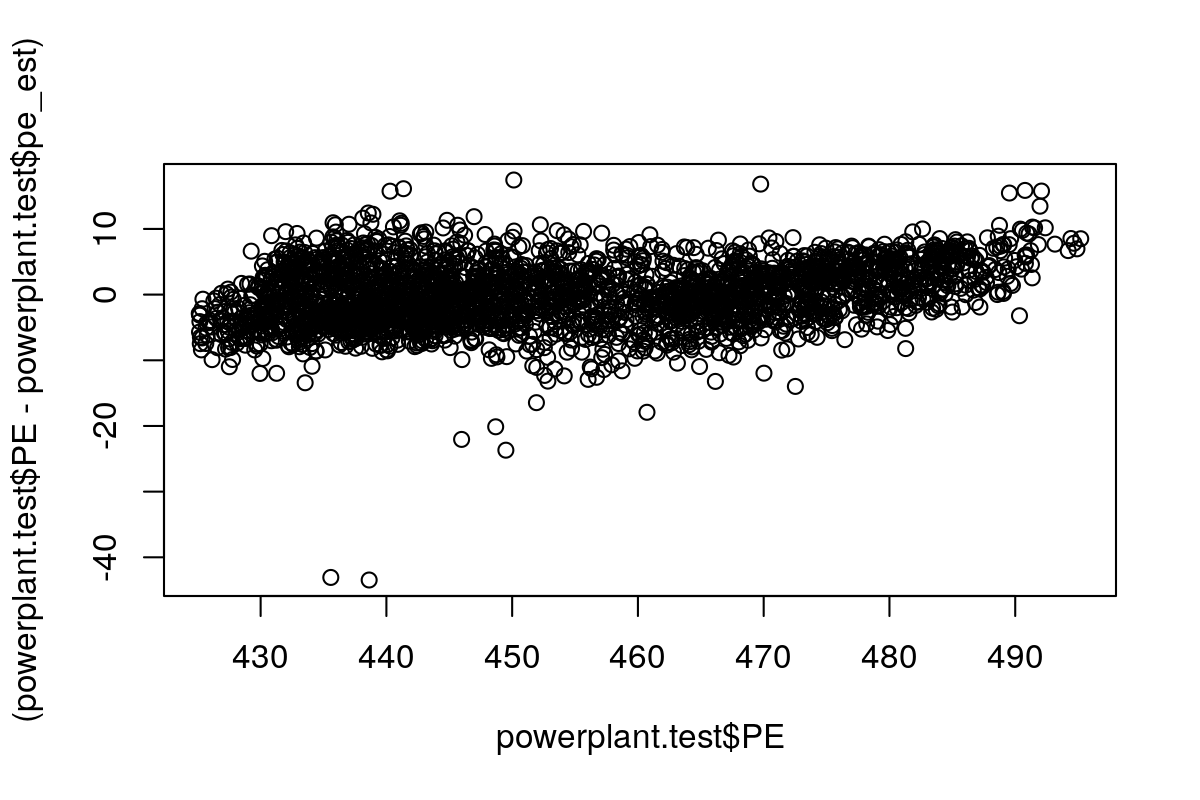

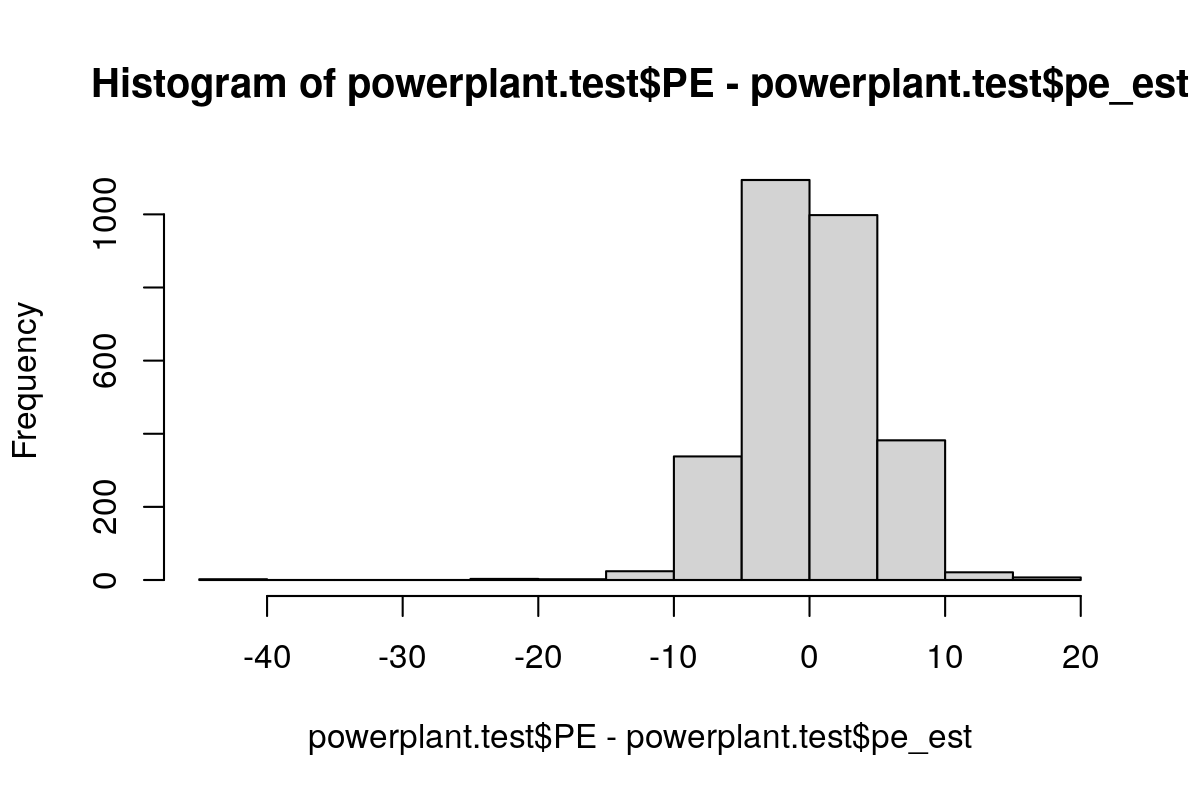

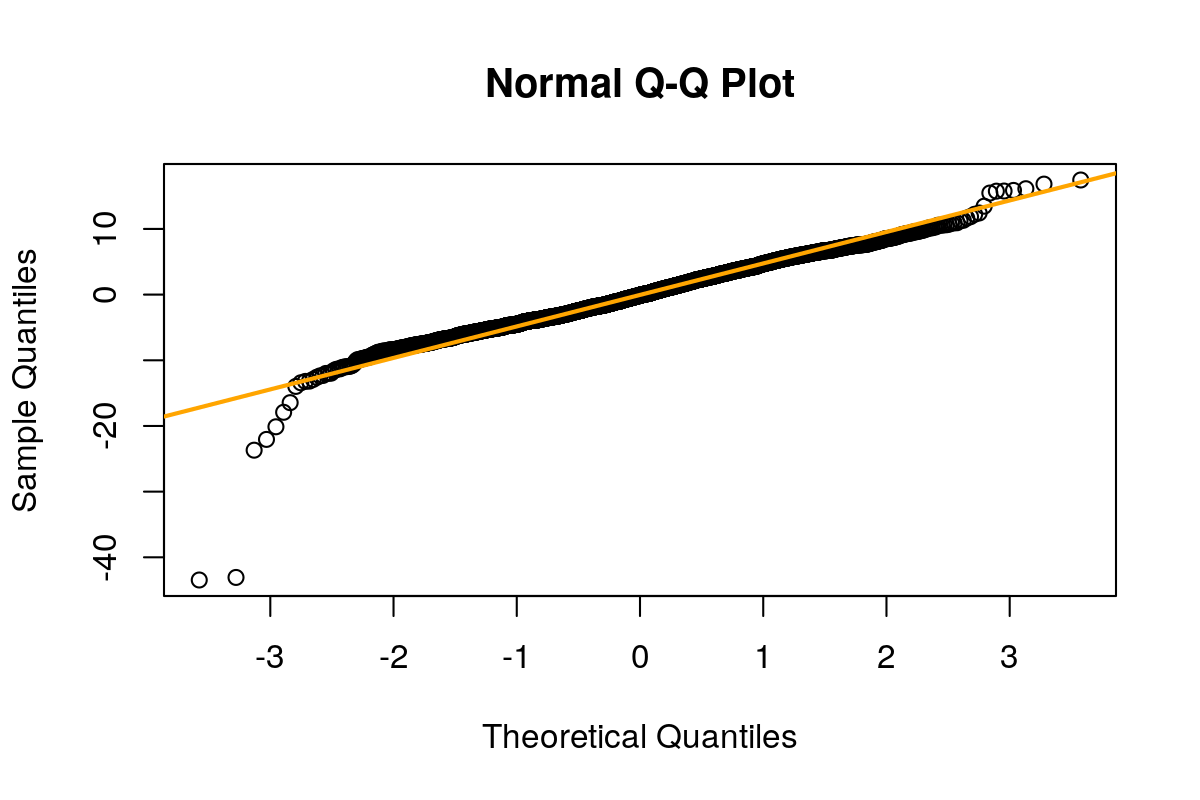

In [46]:
powerplant.test$pe_est<-predict(model_powerplant,powerplant.test)
plot(powerplant.test$PE,(powerplant.test$PE-powerplant.test$pe_est))

caret::postResample(pred=powerplant.test$pe_est, obs= powerplant.test$PE)

hist(powerplant.test$PE-powerplant.test$pe_est,20)
qqnorm(powerplant.test$PE-powerplant.test$pe_est)
qqline(powerplant.test$PE-powerplant.test$pe_est, col = 'orange', lwd =2)

### Distancia Cooks

La distancia de Cooks nos sirve para detectar outliers, valores cuyo valor influye mucho en la salida de la regresión lineal.

Se calcula mirando la diferencia entre el modelo completo con todas las muestras menos el modelo generado eliminando la muestra bajo estudio. La distancia de cook para la muestra $i$ se puede calcular como:
\\[
D_i \frac{\sum_{j=1}^N (\hat Y_j - \hat Y_{j(i)})^2}{(p+1)·\hat \sigma ^2}
\\]

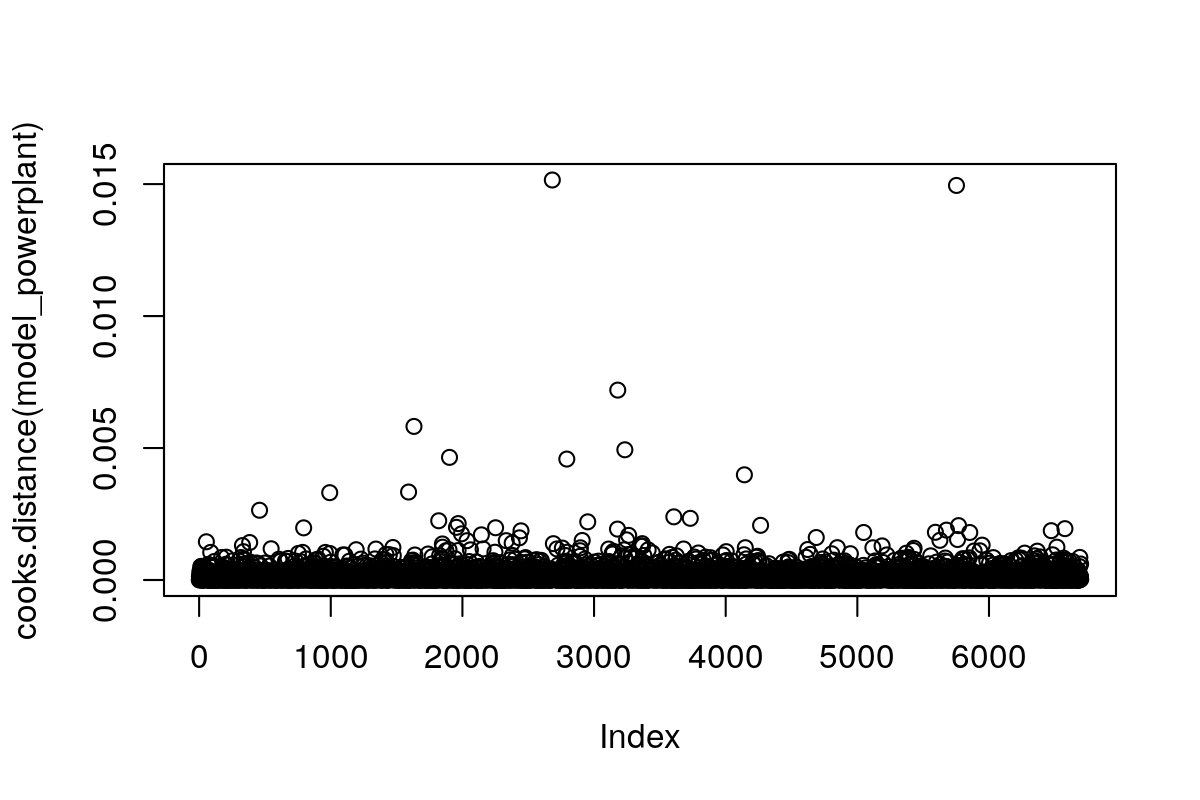

In [47]:
plot(cooks.distance(model_powerplant))

In [48]:
powerplant.train_clean<-powerplant.train[cooks.distance(model_powerplant)<0.005,]
model_powerplant_clean<-lm(PE~AT+V+AP+RH,data=powerplant.train_clean)
summary(model_powerplant_clean)


Call:
lm(formula = PE ~ AT + V + AP + RH, data = powerplant.train_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.9815  -3.1315  -0.1563   3.1611  17.7887 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 464.045977  11.278761   41.143  < 2e-16 ***
AT           -1.992595   0.017794 -111.980  < 2e-16 ***
V            -0.229235   0.008479  -27.034  < 2e-16 ***
AP            0.052886   0.010946    4.832 1.38e-06 ***
RH           -0.158685   0.004837  -32.803  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.453 on 6688 degrees of freedom
Multiple R-squared:  0.9312,	Adjusted R-squared:  0.9312 
F-statistic: 2.264e+04 on 4 and 6688 DF,  p-value: < 2.2e-16


[1] 4.642426

[1] 0.9278346

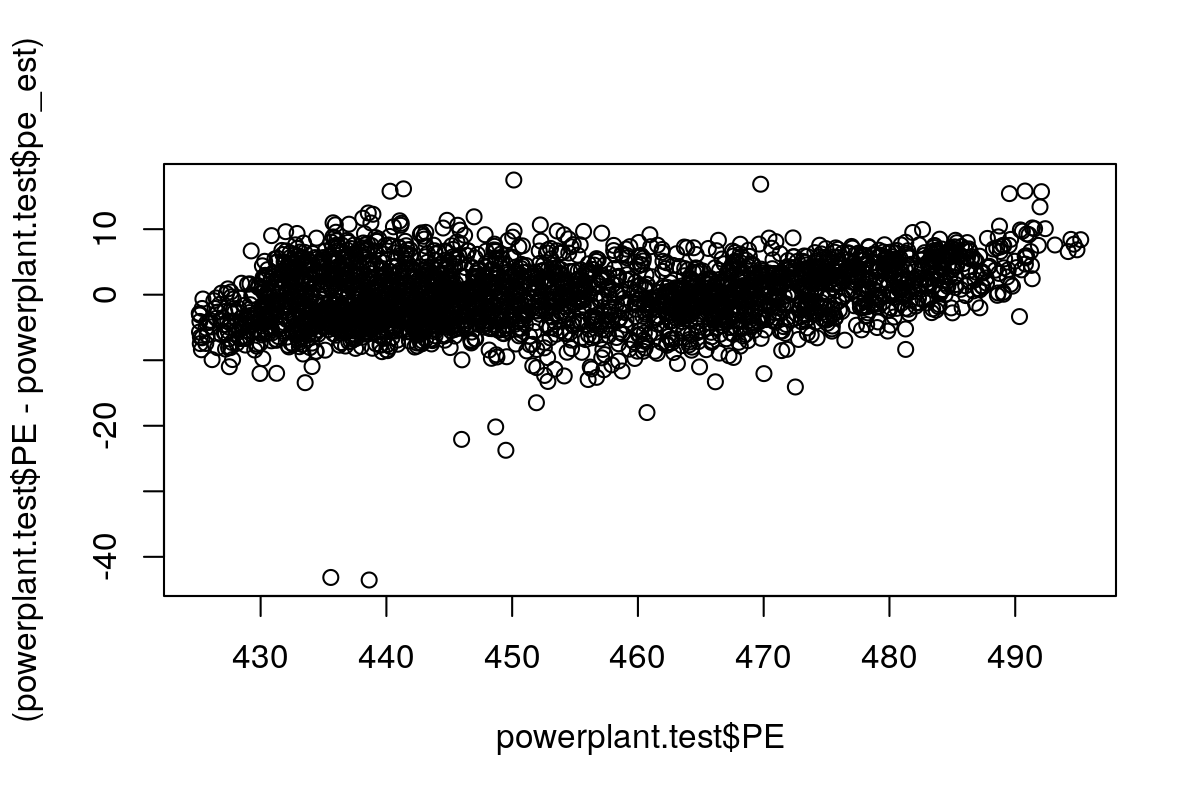

In [49]:
powerplant.test$pe_est<-predict(model_powerplant_clean,powerplant.test)
plot(powerplant.test$PE,(powerplant.test$PE-powerplant.test$pe_est))
sqrt(mean((powerplant.test$PE-powerplant.test$pe_est)^2))
myrsquared(powerplant.test$PE,powerplant.test$pe_est)

### Mejorando el modelo cerebro/peso

In [50]:
library(MASS)
library(dplyr)
library(tibble)

unique(rbind(Animals, mammals)) %>% rownames_to_column(var = "especie") %>% 
    mutate(log_body=log10(body)) %>%
    mutate(log_brain=log10(brain)) -> animals_log

set.seed(1111)
idx <- sample(1:nrow(animals_log),nrow(animals_log)*0.7)
animals_log_train <- animals_log[idx,]
animals_log_test <- animals_log[-idx,]

In [51]:
model_body_brain <- lm(log_brain ~ log_body, data = animals_log_train)
summary(model_body_brain)


Call:
lm(formula = log_brain ~ log_body, data = animals_log_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5709 -0.2406  0.0500  0.3324  0.8157 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.96634    0.08325   11.61 7.74e-15 ***
log_body     0.56554    0.04990   11.33 1.69e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5043 on 43 degrees of freedom
Multiple R-squared:  0.7492,	Adjusted R-squared:  0.7434 
F-statistic: 128.4 on 1 and 43 DF,  p-value: 1.69e-14


In [52]:
caret::postResample(pred=predict(model_body_brain,animals_log_train), obs= animals_log_train$log_brain)
caret::postResample(pred=predict(model_body_brain,animals_log_test), obs= animals_log_test$log_brain)

RMSE  Rsquared       MAE 
0.4929786 0.7491963 0.3662631

RMSE  Rsquared       MAE 
0.5244306 0.8021742 0.3839410

,especie,body,brain,log_body,log_brain
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
26,Brachiosaurus,87000.000,154.50,4.939519,2.188928
6,Dipliodocus,11700.000,50.00,4.068186,1.698970
37,Lesser short-tailed shrew,0.005,0.14,-2.301030,-0.853872
7,Asian elephant,2547.000,4603.00,3.406029,3.663041


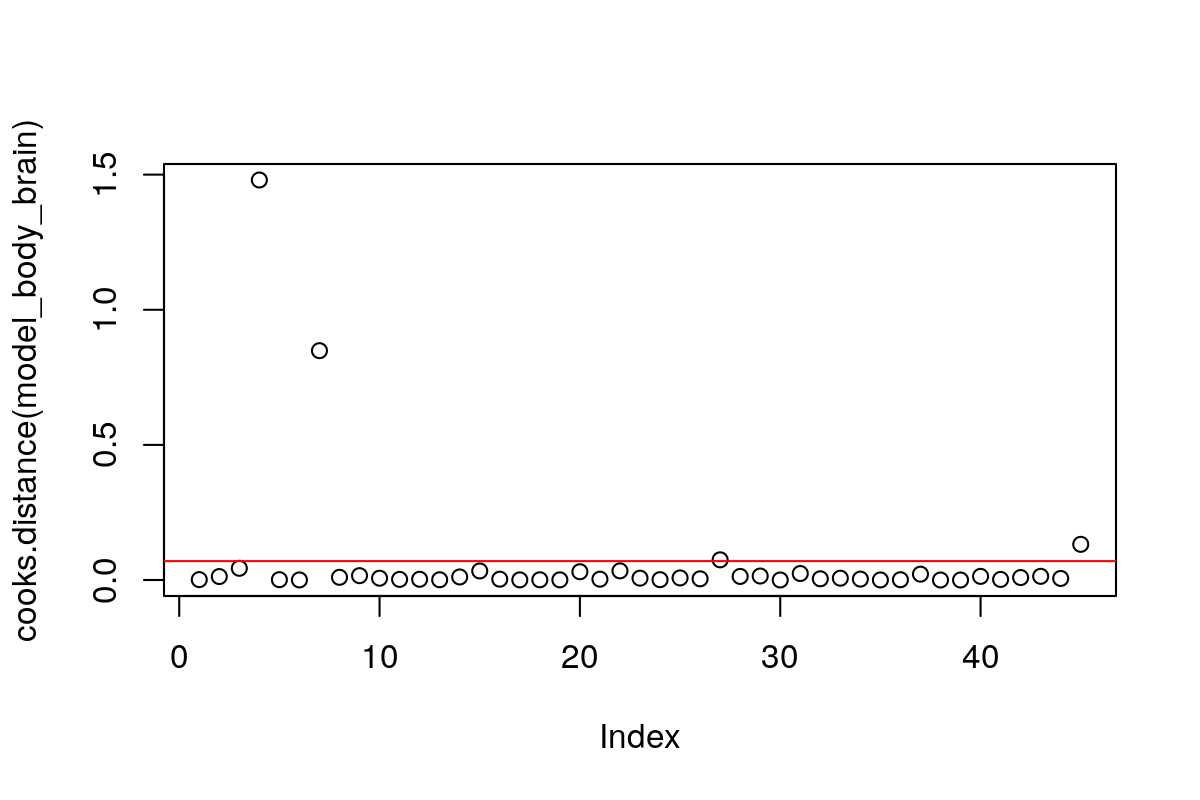

In [53]:
plot(cooks.distance(model_body_brain))

th = 0.07
abline(h=th,col='red')
animals_log_train[cooks.distance(model_body_brain)>th,]

In [54]:
animals_log_train_clean <- animals_log_train[cooks.distance(model)<th,]
model_body_brain <- lm(log_brain ~ log_body, data = animals_log_train_clean)
summary(model_body_brain)



Call:
lm(formula = log_brain ~ log_body, data = animals_log_train_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71306 -0.19566  0.06193  0.26139  0.68749 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.94642    0.10649   8.887 3.28e-09 ***
log_body     0.60607    0.06567   9.229 1.58e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4963 on 25 degrees of freedom
Multiple R-squared:  0.7731,	Adjusted R-squared:  0.764 
F-statistic: 85.18 on 1 and 25 DF,  p-value: 1.578e-09


In [55]:
caret::postResample(pred=predict(model_body_brain,animals_log_train_clean), 
                    obs= animals_log_train_clean$log_brain)
caret::postResample(pred=predict(model_body_brain,animals_log_test), obs= animals_log_test$log_brain)

RMSE  Rsquared       MAE 
0.4775527 0.7730904 0.3387709

RMSE  Rsquared       MAE 
0.5133463 0.8021742 0.3662404

### Prediciendo la dureza del hormigón

Resumen: El hormigón es el material más importante en la ingeniería civil. La resistencia a la compresión del hormigón es una función altamente no lineal de la edad y ingredientes Estos ingredientes incluyen cemento, escoria de alto horno, cenizas volantes, agua, superplastificante, agregado grueso y agregado fino.

Fuente:
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

**Características de los datos:**
    
La resistencia a la compresión real del hormigón (MPa) para una mezcla dada bajo un
la edad específica (días) se determinó a partir del laboratorio. Los datos están en forma cruda (no a escala).

**Resumen estadístico:**

Número de instancias (observaciones): 1030
Cantidad de Atributos: 9
Desglose de atributos: 8 variables de entrada cuantitativas y 1 variable de salida cuantitativa
Faltan valores de atributo: ninguno


* Cemento (componente 1) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Escoria de alto horno (componente 2) - cuantitativa - kg en una mezcla de m3 - Variable de entrada
* Cenizas volantes (componente 3) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Agua (componente 4) - cuantitativa - kg en una mezcla m3 - Variable de entrada
* Superplastificante (componente 5) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Agregado grueso (componente 6) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Agregado fino (componente 7) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Edad - cuantitativa - Día (1 ~ 365) - Variable de entrada
* Resistencia a la compresión del hormigón - cuantitativa - MPa - Variable de salida


In [56]:
concrete<-read.csv("data/Concrete_Data.csv",
                   col.names=c("cemento","escoria","cenizas","agua","plastificante","aggrueso","agfino","edad","resistencia"))
head(concrete)

,cemento,escoria,cenizas,agua,plastificante,aggrueso,agfino,edad,resistencia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,540.0,0.0,0,162,2.5,1040.0,676.0,28,79.99
2,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
3,332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
4,332.5,142.5,0,228,0.0,932.0,594.0,365,41.05
5,198.6,132.4,0,192,0.0,978.4,825.5,360,44.30
6,266.0,114.0,0,228,0.0,932.0,670.0,90,47.03


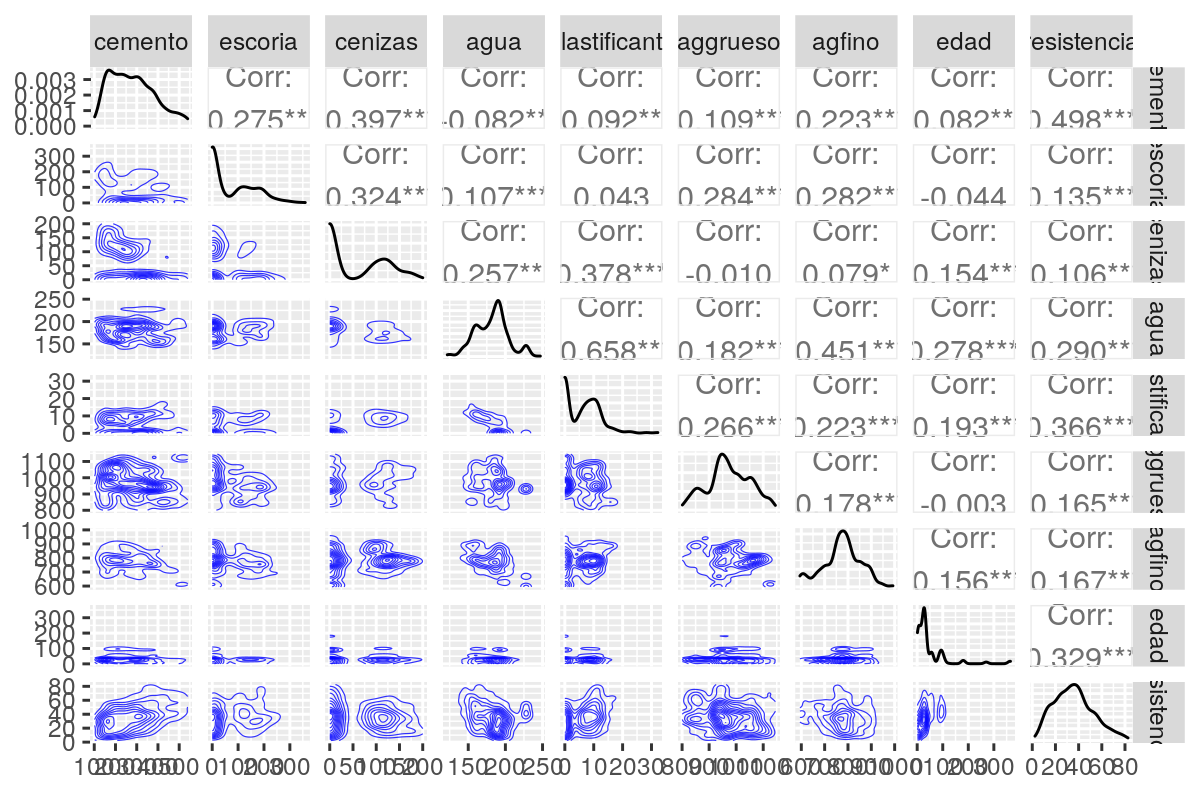

In [57]:
ggpairs(concrete, 
        lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       #lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

In [58]:
set.seed(12)
idx<-sample(1:nrow(concrete),nrow(concrete)*0.7)
train.df<-concrete[idx,]
test.df<-concrete[-idx,]

In [59]:
model<-lm(resistencia~.-agfino,train.df)
summary(model)


Call:
lm(formula = resistencia ~ . - agfino, data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.822  -6.390   0.799   6.758  31.658 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   20.303029  10.500047   1.934   0.0536 .  
cemento        0.109406   0.005139  21.291  < 2e-16 ***
escoria        0.090218   0.006200  14.551  < 2e-16 ***
cenizas        0.072927   0.009098   8.016 4.48e-15 ***
agua          -0.213271   0.028213  -7.559 1.25e-13 ***
plastificante  0.267966   0.109294   2.452   0.0145 *  
aggrueso       0.006320   0.006247   1.012   0.3120    
edad           0.112457   0.006345  17.725  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.5 on 713 degrees of freedom
Multiple R-squared:  0.6299,	Adjusted R-squared:  0.6263 
F-statistic: 173.4 on 7 and 713 DF,  p-value: < 2.2e-16


[1] "R^2 testing: 0.563176091410201"

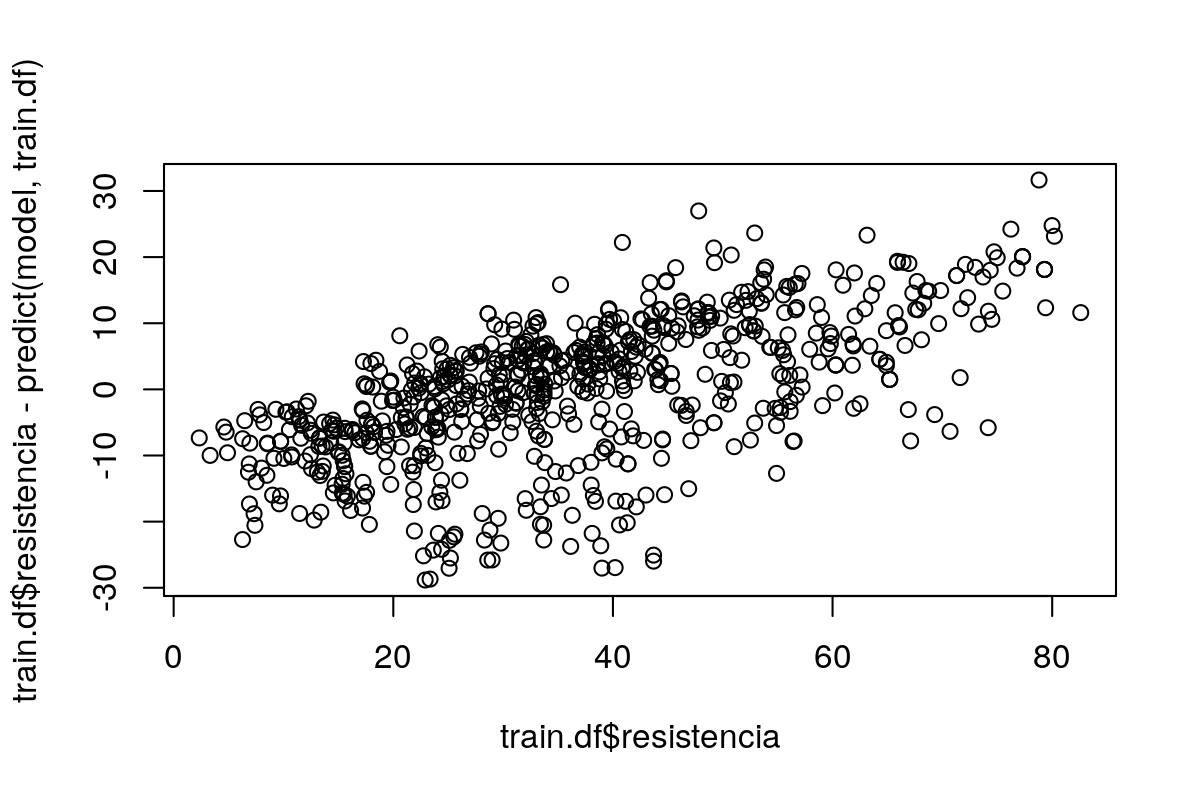

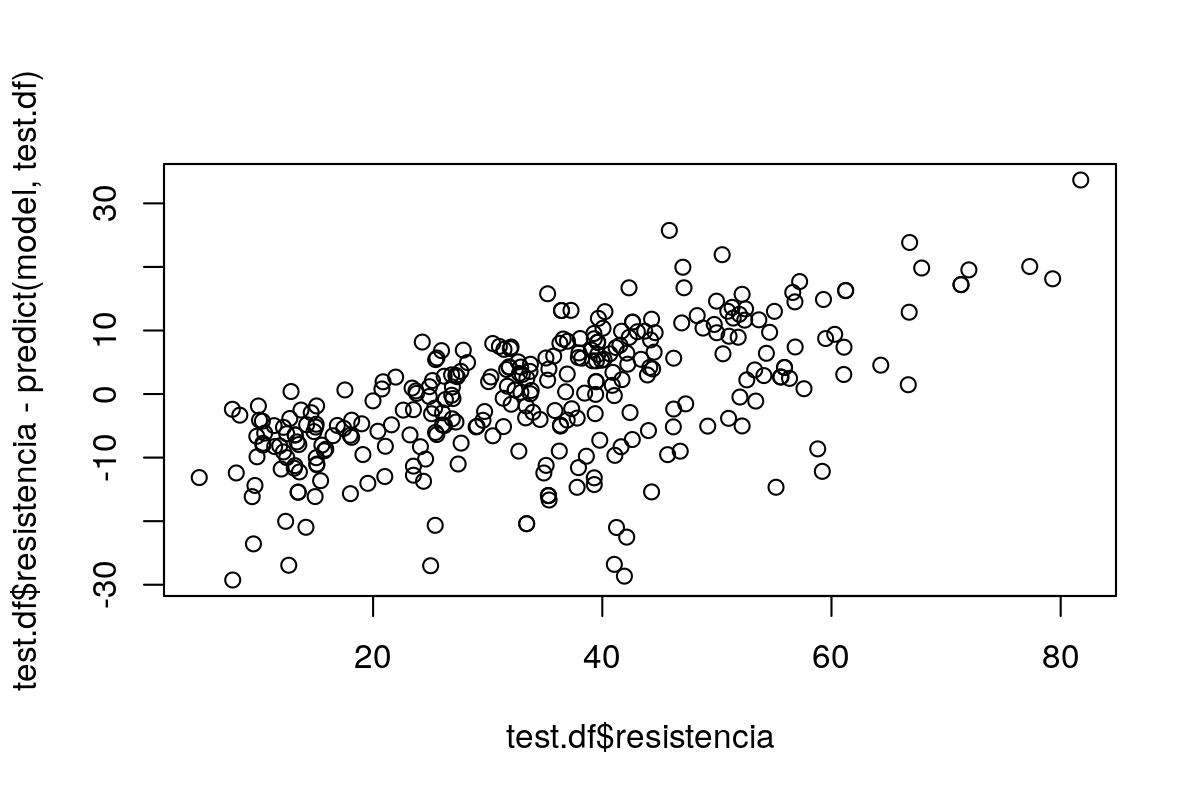

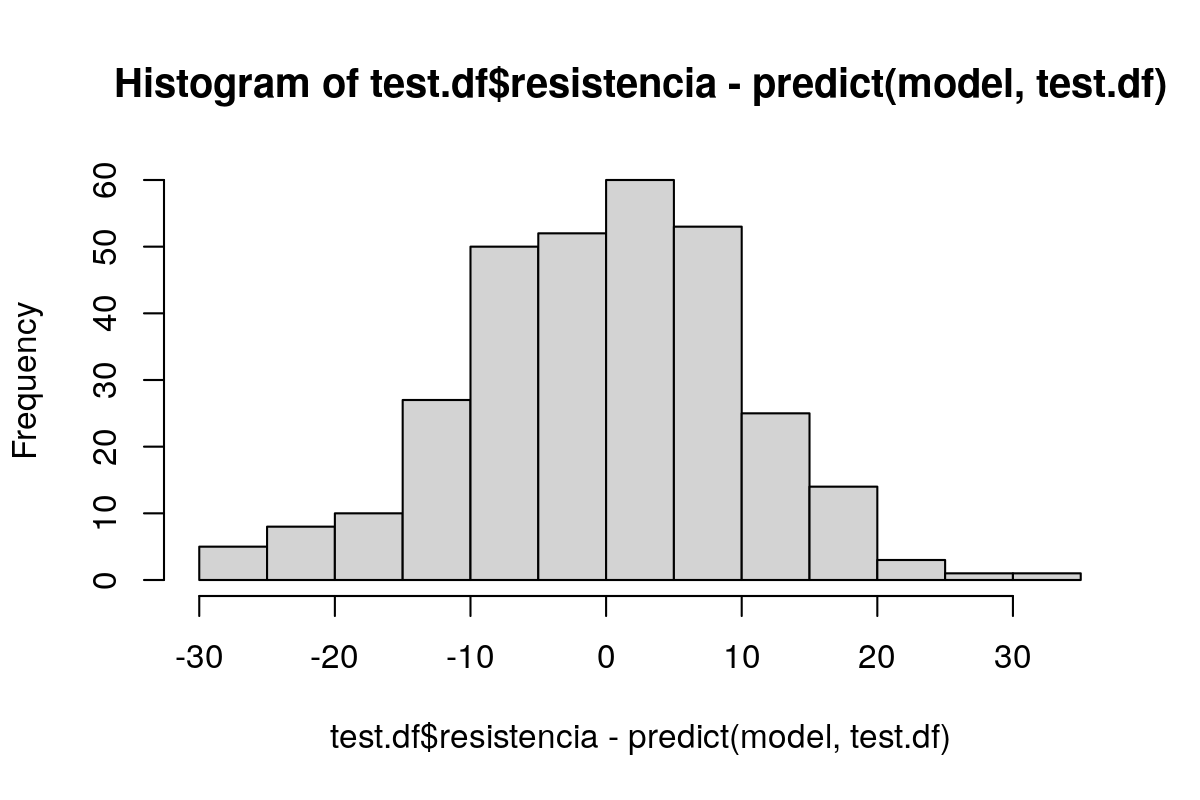

In [60]:
paste("R^2 testing:",myrsquared(test.df$resistencia,predict(model,test.df)))
plot(train.df$resistencia,train.df$resistencia-predict(model,train.df))
plot(test.df$resistencia,test.df$resistencia-predict(model,test.df))
hist(test.df$resistencia-predict(model,test.df))

Warning message in predict.lm(model, train.df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test.df):
“prediction from a rank-deficient fit may be misleading”


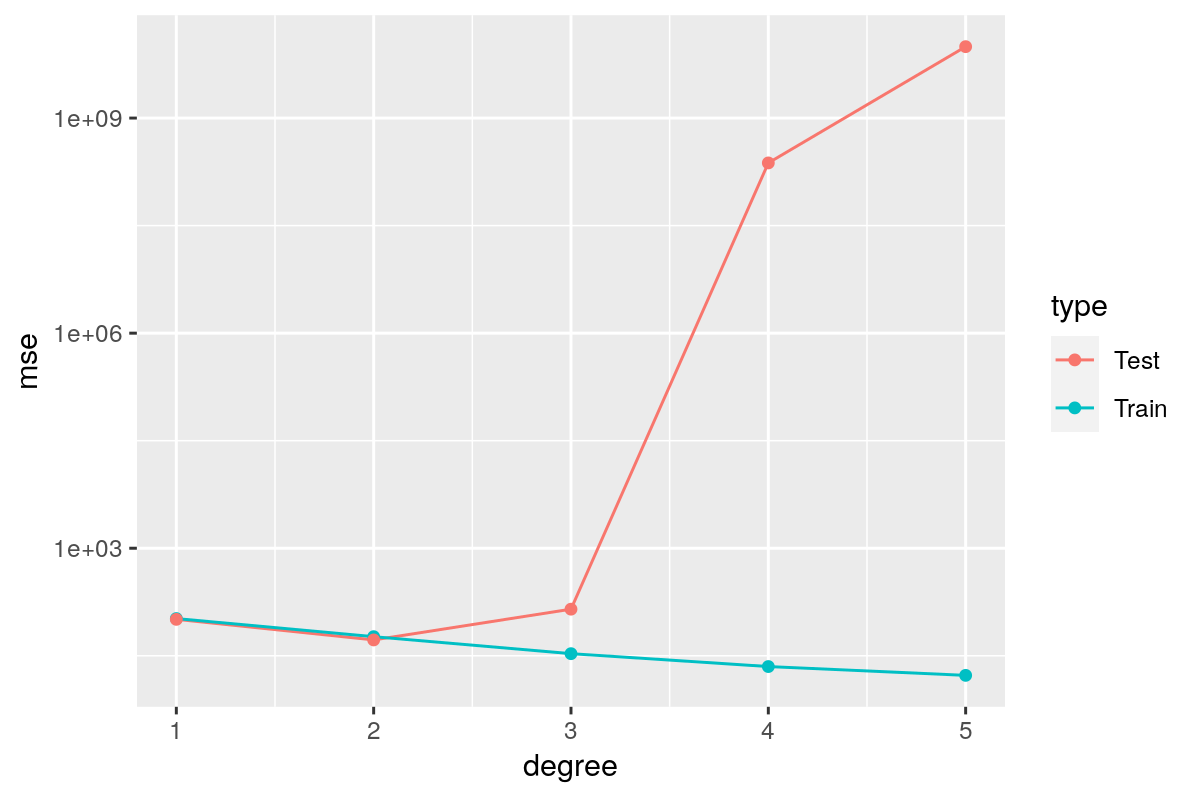

In [61]:
calcmse<-function(y_real,y_est){
  sum((y_real-y_est)^2,na.rm = T)/length(y_real)
}

mse_train<-c()
mse_test<-c()
for (N in 1:5){
    model<-lm(resistencia~
           poly(cemento,N)*poly(escoria,N)*poly(cenizas,N)+
           poly(agua,N)*poly(plastificante,N)+
           poly(aggrueso,N)*poly(agfino,N)+
           poly(edad,N),data = train.df)
    
    yp_train<-predict(model,train.df)
    mse_train[N]<-calcmse(train.df$resistencia,yp_train)
  
    yp_test<-predict(model,test.df)
    mse_test[N] <-calcmse(test.df$resistencia,yp_test)
}
mse.df<-data.frame(degree=1:length(mse_train),mse=mse_train,type="Train")
mse.df<-rbind(mse.df,data.frame(degree=1:length(mse_train),mse=mse_test,type="Test"))

library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

ggplot(mse.df,aes(x=degree,y=mse,color=type))+geom_line()+geom_point()+scale_y_log10()


In [62]:
mse.df

degree,mse,type
<int>,<dbl>,<chr>
1,1.044485e+02,Train
2,5.837840e+01,Train
3,3.383201e+01,Train
4,2.236717e+01,Train
5,1.685384e+01,Train
1,1.018512e+02,Test
2,5.260308e+01,Test
3,1.412627e+02,Test
4,2.368111e+08,Test


[1] "R^2 testing: 0.780105348187795"

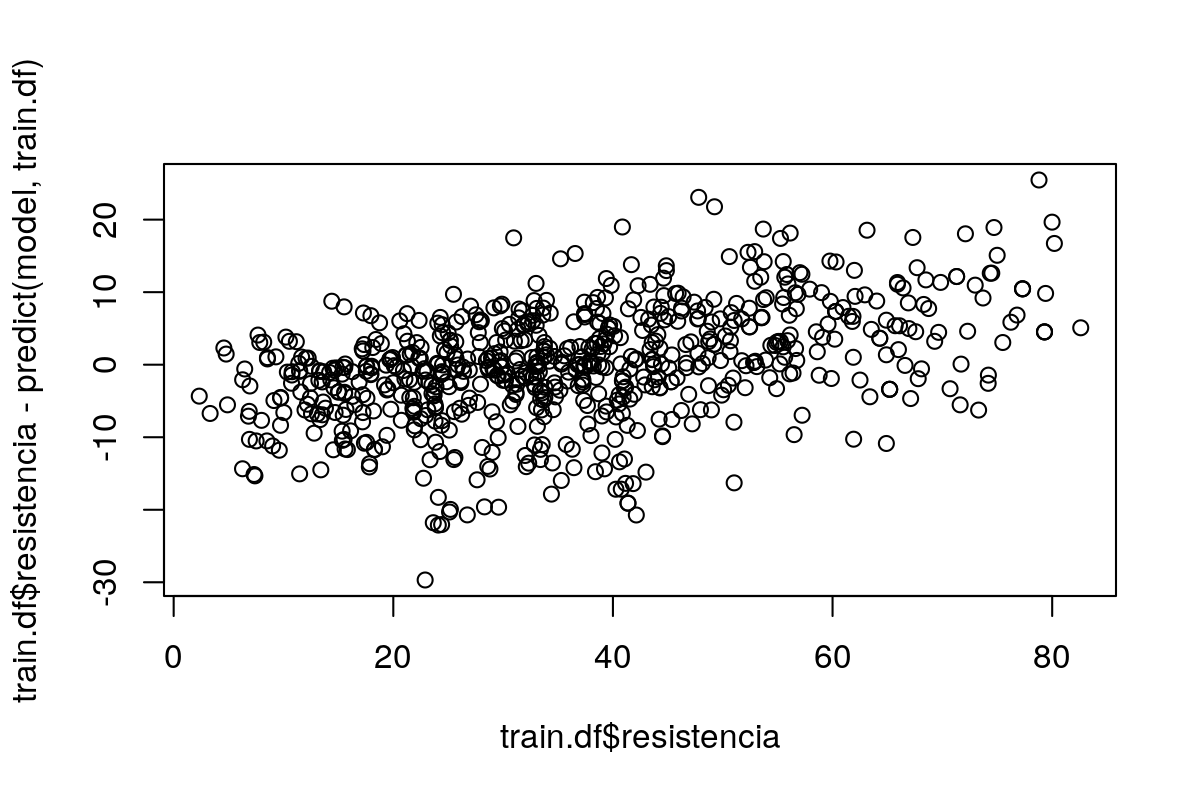

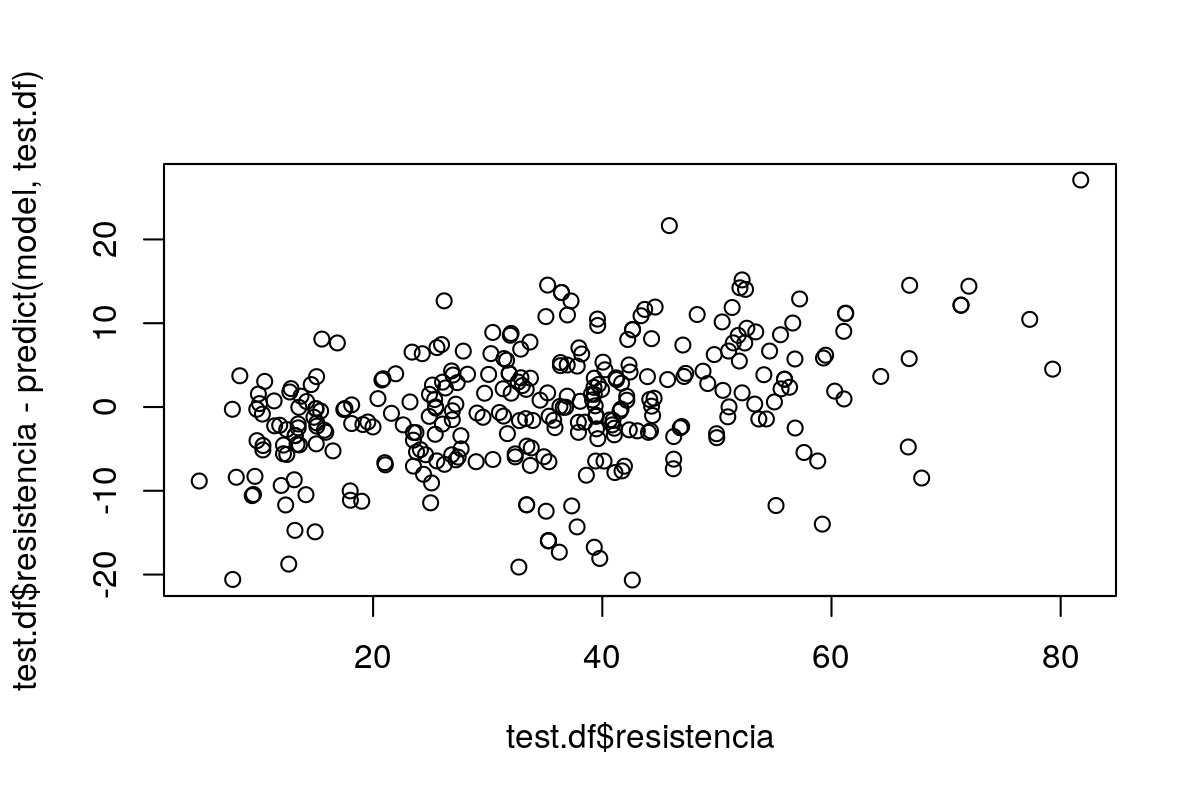

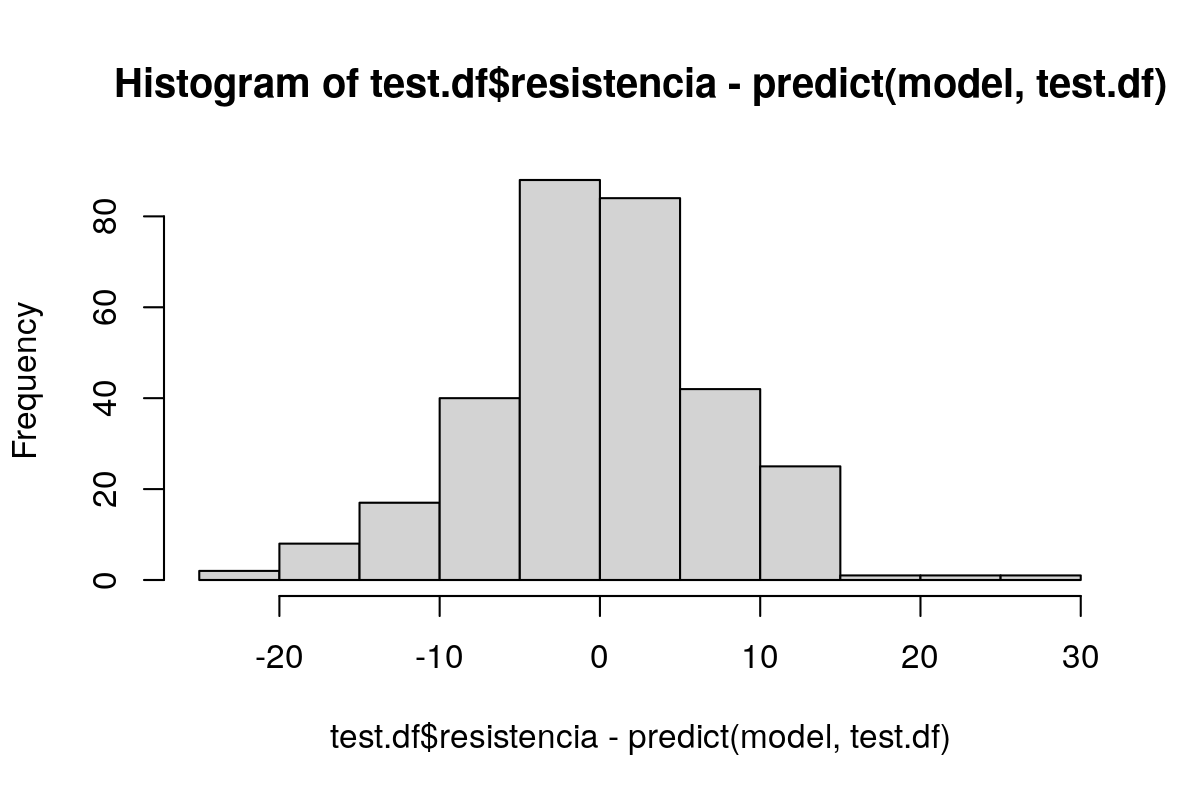

In [63]:
N<-2
model<-lm(resistencia~
       poly(cemento,N)*poly(escoria,N)*poly(cenizas,N)+
       poly(agua,N)*poly(plastificante,N)+
       poly(aggrueso,N)*poly(agfino,N)+
       poly(edad,N),data = train.df)
paste("R^2 testing:",myrsquared(test.df$resistencia,predict(model,test.df)))
plot(train.df$resistencia,train.df$resistencia-predict(model,train.df))
plot(test.df$resistencia,test.df$resistencia-predict(model,test.df))
hist(test.df$resistencia-predict(model,test.df),10)


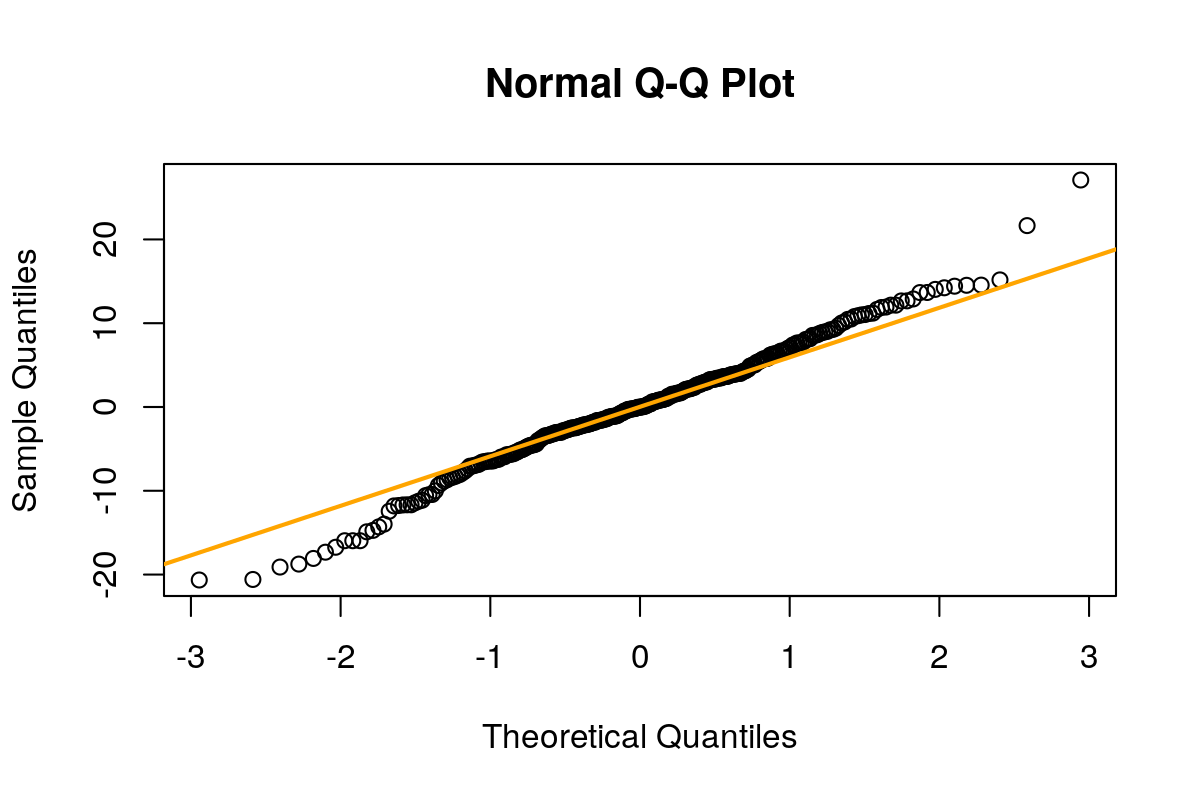

In [64]:
qqnorm(test.df$resistencia-predict(model,test.df))
qqline(test.df$resistencia-predict(model,test.df), col = 'orange', lwd =2)

## Variables categóricas

Variables categóricas son aquellas que no presentan un valor de un número real sino una categoría, es decir pueden tomar un valor dentro de un conjunto fijo y limitado de posible valores, con o sin orden. Ejemplo:
* Variables binarias: Si/No
* Categóricas con orden: nada/poco/normal/mucho.
* Categóricas sin orden: rojo/verde/azul

Antes de utilizar una de estas variables en un algoritmo de aprendizaje hay que convertirlo a un número real, es necesario **coficarlo** para que el algoritmo correspondiente lo interprete correctamente.

#### Ejemplo peso de niños/niñas en función de la edad y del peso

Queremos un modelo completo para calcular la longitud de un bebé en función de su edad en dias y su peso en kg.

In [ ]:
set.seed(123)
boys<-read.csv("data/lhfa_boys_p_exp.txt",sep="")
boys$gender<-"boy"
girls<-read.csv("data/lhfa_girls_p_exp.txt",sep="")
girls$gender<-"girl"
height<-rbind(boys,girls)
height["s_height"]<-((height$P25-height$M)/qnorm(0.25)+(height$P75-height$M)/qnorm(0.75))/2
height<-height[,c("gender","Day","M","s_height")]
colnames(height)<-c("gender","day","height","s_height")

boys<-read.csv("data/wfa_boys_p_exp.txt",sep="")
boys$gender<-"boy"
girls<-read.csv("data/wfa_girls_p_exp.txt",sep="")
girls$gender<-"girl"
weight<-rbind(boys,girls)
weight["s_weight"]<-((weight$P25-weight$M)/qnorm(0.25)+(weight$P75-weight$M)/qnorm(0.75))/2
weight<-weight[,c("gender","Age","M","s_weight")]
colnames(weight)<-c("gender","day","weight","s_weight")



hw<-merge(height,weight,by=c("gender","day"))
n <- 20
hw<-do.call("rbind", replicate(n, hw, simplify = FALSE))
sample_data=data.frame(gender=hw$gender,
                   day=hw$day,
                   height=apply(hw[,c("height","s_height")],1,function(x){rnorm(1,mean=x["height"],sd=x["s_height"])}),
                   weight=apply(hw[,c("weight","s_weight")],1,function(x){rnorm(1,mean=x["weight"],sd=x["s_weight"])}))
idx<-sample(1:nrow(sample_data),200)
sample_data<-sample_data[idx,]
write.csv(sample_data,file="data/weight_babys.csv",row.names = FALSE)

In [65]:
df_weight_height=read.csv("data/weight_babys.csv")
head(df_weight_height)
set.seed(123)
idx<-sample(1:nrow(df_weight_height),nrow(df_weight_height)*0.7)
train.df<-df_weight_height[idx,]
test.df<-df_weight_height[-idx,]

,gender,day,height,weight
,<chr>,<int>,<dbl>,<dbl>
1,girl,1079,95.48602,13.171765
2,boy,1662,106.66612,17.591256
3,boy,175,66.62338,8.731773
4,boy,1646,109.82951,19.583067
5,girl,1772,109.26331,21.579168
6,girl,1003,96.84478,11.761331


Exploramos como se relacionan las variables entre sí, analizándo niños y niñas por separado.
Se ve una alta correlación entre peso, altura y edad.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



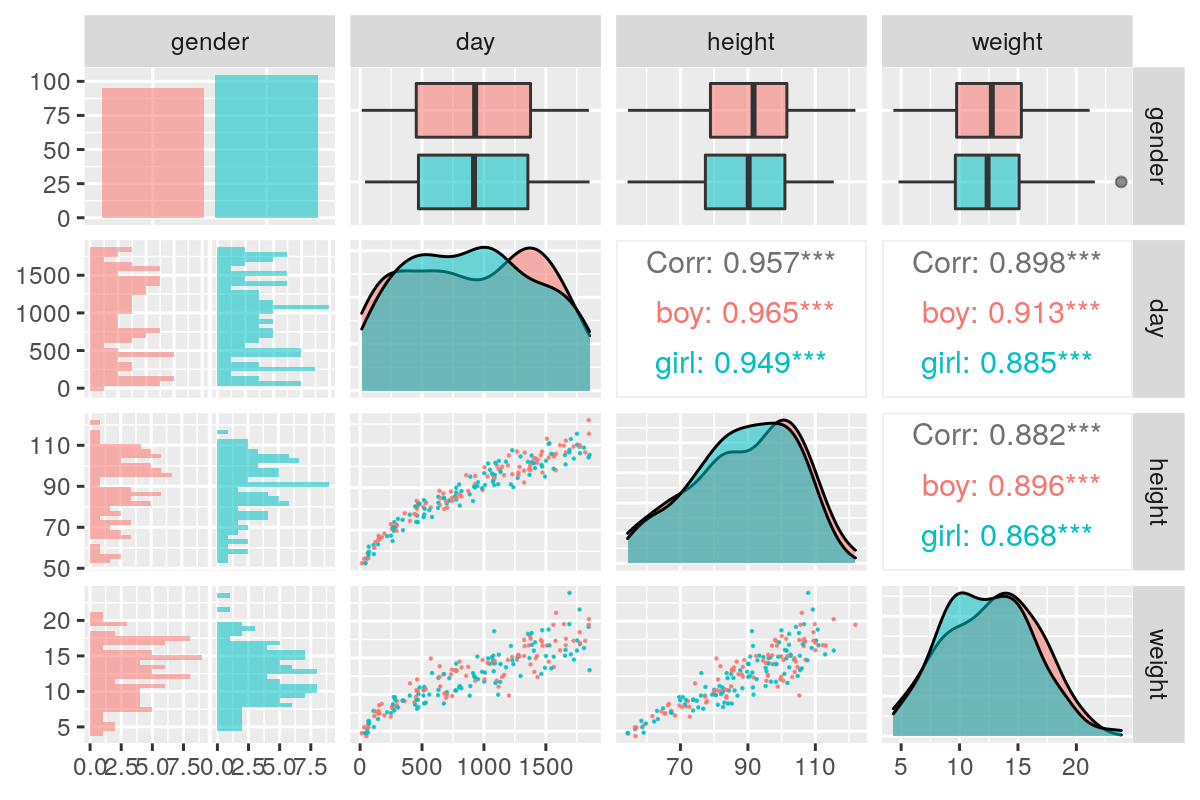

In [66]:
library(GGally)
options(repr.plot.height=4,repr.plot.width=6)

ggpairs(df_weight_height,ggplot2::aes(colour=gender,alpha=0.5),
       lower = list(continuous = wrap("points", alpha = 0.8,size=0.1))
                  )

Como queremos hacer un modelo predictivo vamos a dividir los datos entre test y training:

In [67]:
set.seed(123)
idx<-sample(1:nrow(df_weight_height),nrow(df_weight_height)*0.7)
train.df<-df_weight_height[idx,]
test.df<-df_weight_height[-idx,]

Calculemos para la formula:
\\[
height = \beta_0 + \beta_1·day + \beta_2·gender
\\]
Donde *gender* es una variable categórica que traducirá a dos valores:
* Boy  - 0
* Girl - 1

In [68]:
model<-lm(data=train.df,formula=height~day+gender)
summary(model)


Call:
lm(formula = height ~ day + gender, data = train.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1152  -2.8007   0.0805   3.5784  10.0219 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 63.2007484  0.8666949  72.922   <2e-16 ***
day          0.0283134  0.0007393  38.296   <2e-16 ***
gendergirl  -1.0691758  0.7942038  -1.346     0.18    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.675 on 137 degrees of freedom
Multiple R-squared:  0.9146,	Adjusted R-squared:  0.9134 
F-statistic: 733.9 on 2 and 137 DF,  p-value: < 2.2e-16


A igual número de días una niña pesará, aproximadamente, en media 1.07 kg menos.

Pero si miramos al intervalo de confianza del coeficiente asociado al género es muy amplio, llegando a ser incluso positivo:

In [69]:
confint(model)

,2.5 %,97.5 %
(Intercept),61.48691887,64.91457799
day,0.02685145,0.02977543
gendergirl,-2.63965925,0.50130757


Podemos ver las figuras de calidad de la predicción:
\\[
RMS = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2}{N}}
\\]
\\[
R^2 = 1-\frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
\\]
\\[
MAE = \frac{\sum | y_i - \hat{y}_i | }{N}
\\]

In [70]:
library(caret)
print("Training:")
train.df$pred <-  predict(model,train.df)
postResample(train.df$pred,obs = train.df$height)
print("Testing:")
test.df$pred <-  predict(model,test.df)
postResample(test.df$pred,obs = test.df$height)

[1] "Training:"


RMSE  Rsquared       MAE 
4.6246035 0.9146361 3.7407511

[1] "Testing:"


RMSE  Rsquared       MAE 
4.2239352 0.9173109 3.3127037

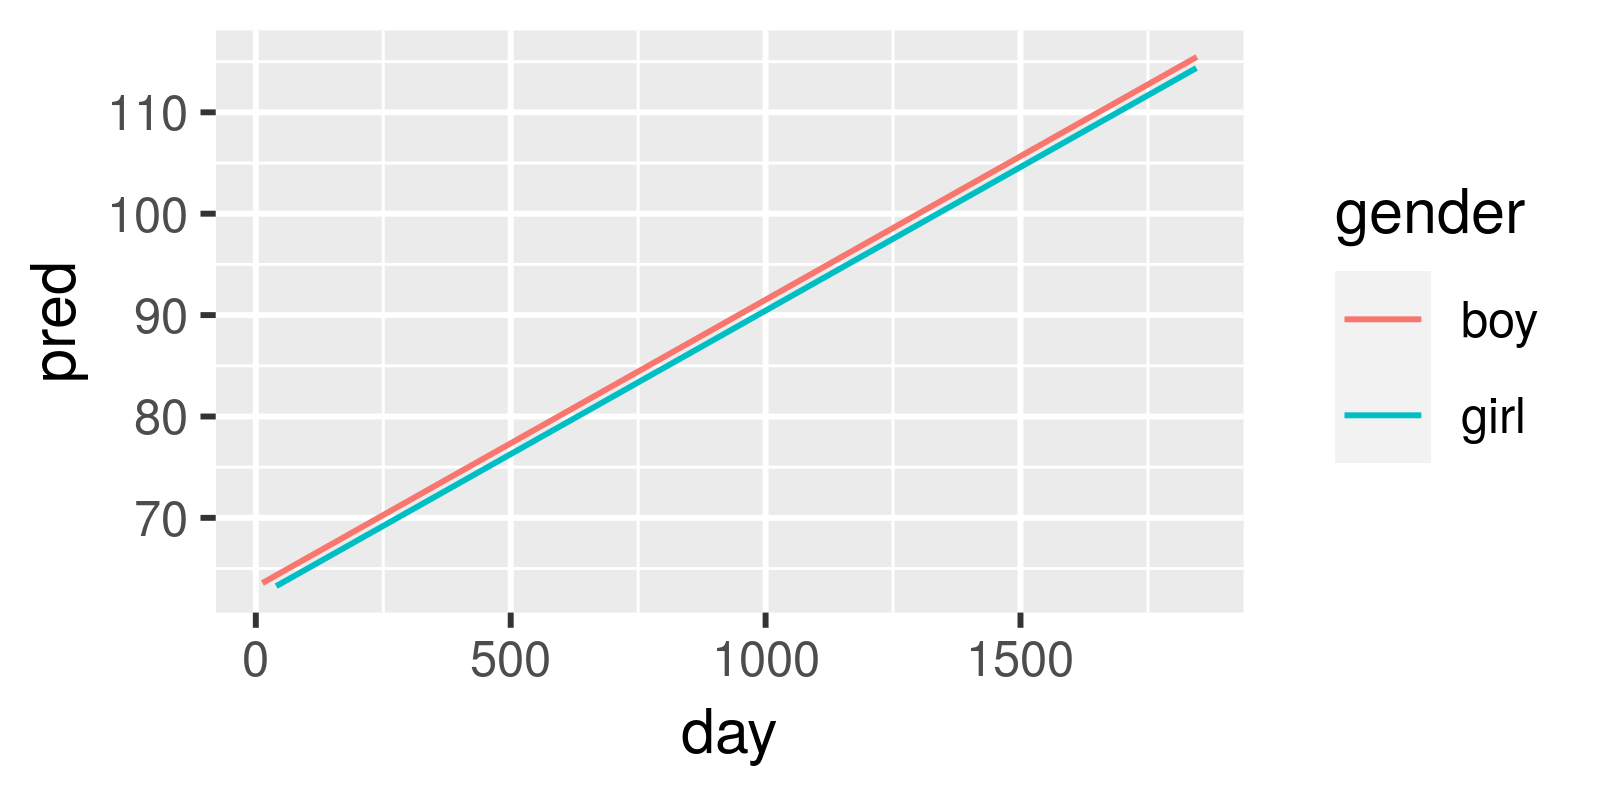

In [71]:
options(repr.plot.height=2,repr.plot.width=4,repr.plot.res = 400)
ggplot(train.df,aes(x=day,y=pred,color=gender))+geom_line()

Ahora vamos a intentar otro modelo:
\\[
height = \beta_0 + \beta_1·day·(gender==boy) + \beta_2·day·(gender==girl) \\
height = \beta_0 + \beta_1·day·(1-gender) + \beta_2·day·(gender)        
\\]
Donde *gender* es una variable categórica que traducirá a dos valores:
* Boy  - 0
* Girl - 1

Por lo tanto:
* $\beta_0$ cuanto mide de media un bebe al nacer. Un niño y una niña medirán lo mismo.
* $\beta_1$ nos dirá cuantos cm crece cada día un niño
* $\beta_2$ nos dirá cuantos cm crece cada día una niña

In [72]:
model<-lm(data=train.df,formula=height~day:gender)
summary(model)


Call:
lm(formula = height ~ day:gender, data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.429  -2.881   0.110   3.566  10.293 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    62.604255   0.743537   84.20   <2e-16 ***
day:genderboy   0.029221   0.000852   34.30   <2e-16 ***
day:gendergirl  0.027593   0.000808   34.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.632 on 137 degrees of freedom
Multiple R-squared:  0.9162,	Adjusted R-squared:  0.915 
F-statistic: 748.9 on 2 and 137 DF,  p-value: < 2.2e-16


In [73]:
library(caret)
print("Training:")
train.df$pred <-  predict(model,train.df)
postResample(train.df$pred,obs = train.df$height)
print("Testing:")
test.df$pred <-  predict(model,test.df)
postResample(test.df$pred,obs = test.df$height)

[1] "Training:"


RMSE  Rsquared       MAE 
4.5821097 0.9161977 3.7272938

[1] "Testing:"


RMSE  Rsquared       MAE 
4.3209229 0.9149775 3.3997308

In [74]:
confint(model)

,2.5 %,97.5 %
(Intercept),61.13396201,64.07454708
day:genderboy,0.02753615,0.03090550
day:gendergirl,0.02599558,0.02919112


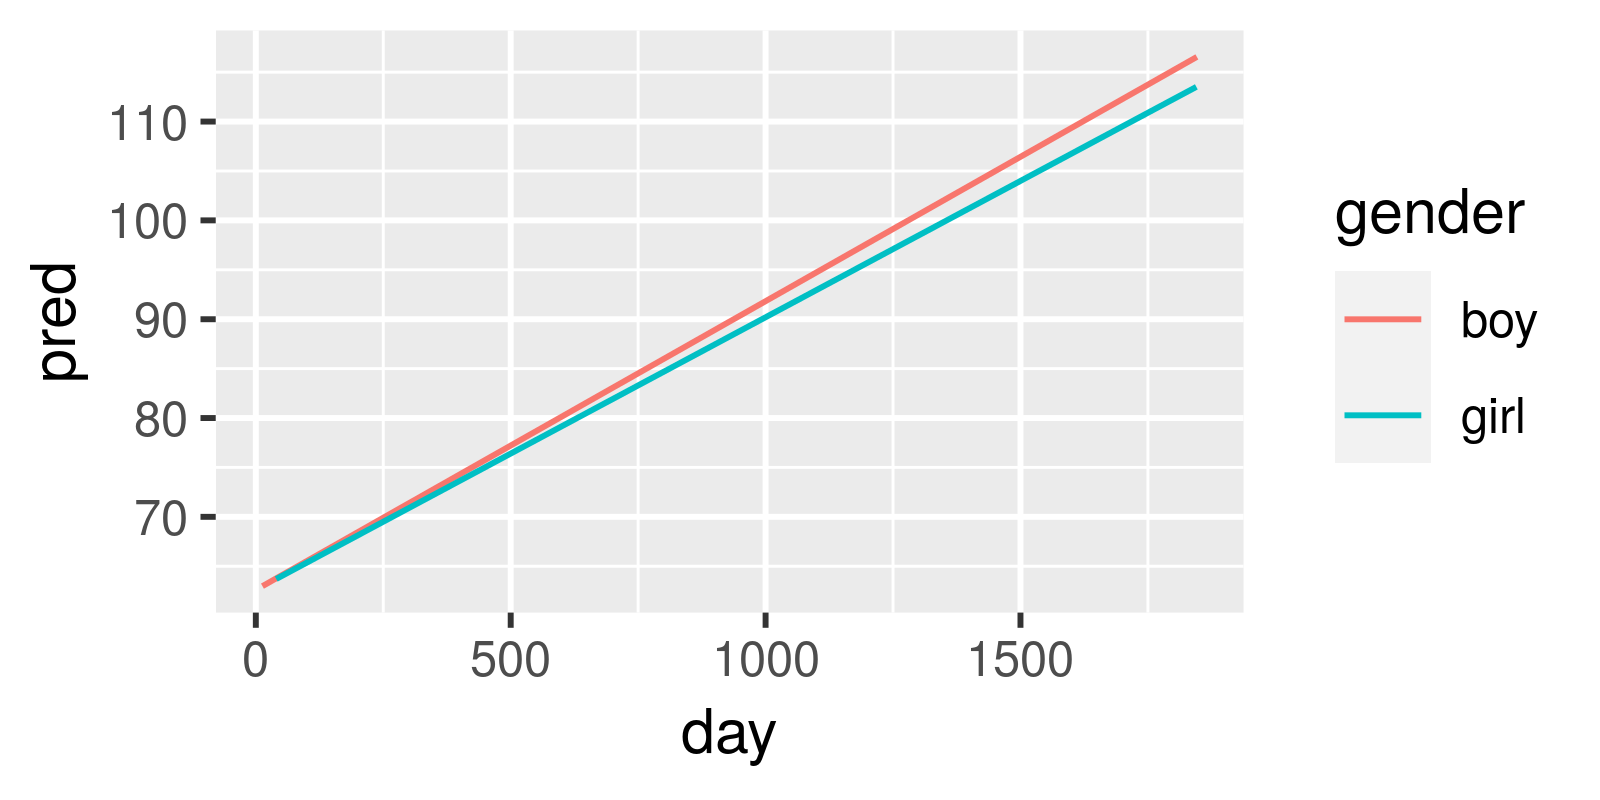

In [75]:
ggplot(train.df,aes(x=day,y=pred,color=gender))+geom_line()

Por último podríamos pensar en el modelo:
\\[
height = \beta_0 +\beta_1·day + \beta_2·day·(gender==girl)+ \beta_3·(gender==girl) \\
height = \beta_0 + \beta_1·day + \beta_2·day·(gender)+ \beta_3·gender
\\]
Donde *gender* es una variable categórica que traducirá a dos valores:
* Boy  - 0
* Girl - 1

Por lo tanto:
* $\beta_0$ cuanto mide de media un niño al nacer
* $\beta_1$ nos dirá cuantos cm crece cada día un niño
* $\beta_2$ nos dirá cuantos cm crece cada día una niña en exceso sobre un niño
* $\beta_3$ nos dirá cuantos cm de más mide una niña al nacer respecto un niño

In [76]:
model<-lm(data=train.df,formula=height~day*gender)
#model<-lm(data=train.df,formula=height~day:gender+day+gender)
summary(model)


Call:
lm(formula = height ~ day * gender, data = train.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6485  -3.0527   0.2079   3.5566  10.2182 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    61.937305   1.112991  55.649   <2e-16 ***
day             0.029783   0.001102  27.038   <2e-16 ***
gendergirl      1.207014   1.497273   0.806    0.422    
day:gendergirl -0.002640   0.001476  -1.788    0.076 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.638 on 136 degrees of freedom
Multiple R-squared:  0.9166,	Adjusted R-squared:  0.9148 
F-statistic: 498.2 on 3 and 136 DF,  p-value: < 2.2e-16


In [77]:
confint(model)

,2.5 %,97.5 %
(Intercept),59.736297690,6.413831e+01
day,0.027604303,3.196092e-02
gendergirl,-1.753935278,4.167963e+00
day:gendergirl,-0.005559352,2.802011e-04


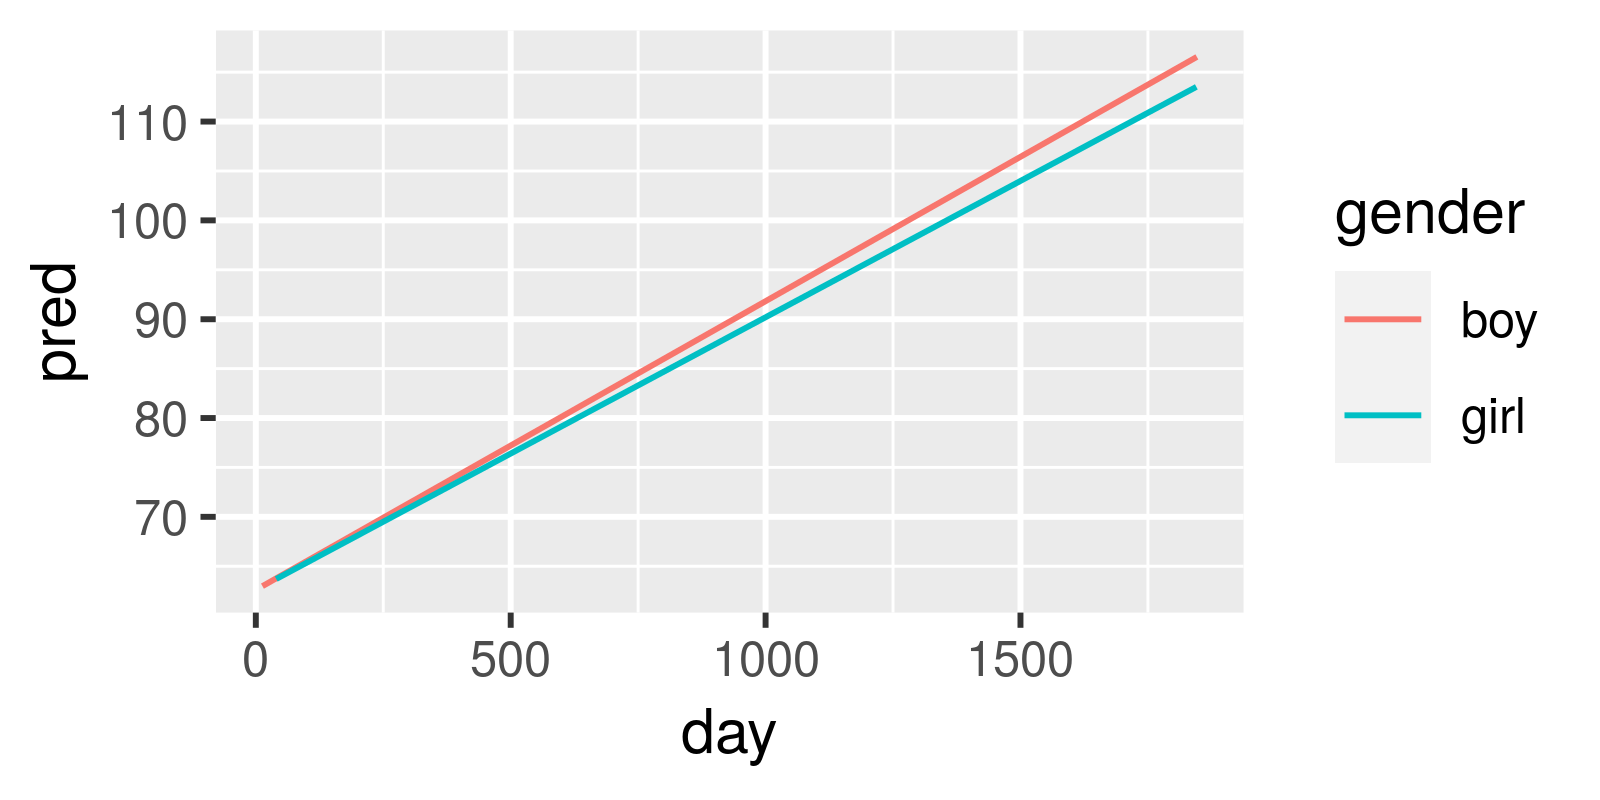

In [78]:
options(repr.plot.height=2,repr.plot.width=4,repr.plot.res = 400)
ggplot(train.df,aes(x=day,y=pred,color=gender))+geom_line()

## Codificación de variables categóricas

### One-hot

Se crean N columnas nuevas, tantas como posibles valores tenga la variable categórica.
Se asigna un valor de 1 a la variable que tiene ese valor 0 en caso contrario.


|-|col1|col2|col3|col4|
|-|:--:| -----:|--|--|
|categoria1|1|0|0|0|
|categoria2|0|1|0|0|
|categoria3|0|0|1|0|
|categoria4|0|0|0|1|

In [79]:
df_new_econding<-df_weight_height
df_new_econding$boy<-ifelse(df_new_econding$gender=="boy",1,0)
df_new_econding$girl<-ifelse(df_new_econding$gender=="girl",1,0)
df_new_econding$gender<-NULL
#set.seed(123)
#idx<-sample(1:nrow(df_new_econding),nrow(df_new_econding)*0.7)
train.df<-df_new_econding[idx,]
test.df<-df_new_econding[-idx,]

In [80]:
head(train.df)

,day,height,weight,boy,girl
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
159,115,61.69181,7.063859,1,0
179,1355,102.24834,18.256696,0,1
14,818,88.38173,10.859407,0,1
195,741,85.26628,13.393031,1,0
170,1523,104.22974,14.486120,1,0
50,1163,95.89462,12.668591,1,0


In [81]:
model<-lm(data=train.df,formula=height~day:boy+day:girl)
summary(model)


Call:
lm(formula = height ~ day:boy + day:girl, data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.429  -2.881   0.110   3.566  10.293 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 62.604255   0.743537   84.20   <2e-16 ***
day:boy      0.029221   0.000852   34.30   <2e-16 ***
day:girl     0.027593   0.000808   34.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.632 on 137 degrees of freedom
Multiple R-squared:  0.9162,	Adjusted R-squared:  0.915 
F-statistic: 748.9 on 2 and 137 DF,  p-value: < 2.2e-16


In [82]:
model<-lm(data=train.df,formula=height~day+girl)
summary(model)


Call:
lm(formula = height ~ day + girl, data = train.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1152  -2.8007   0.0805   3.5784  10.0219 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 63.2007484  0.8666949  72.922   <2e-16 ***
day          0.0283134  0.0007393  38.296   <2e-16 ***
girl        -1.0691758  0.7942038  -1.346     0.18    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.675 on 137 degrees of freedom
Multiple R-squared:  0.9146,	Adjusted R-squared:  0.9134 
F-statistic: 733.9 on 2 and 137 DF,  p-value: < 2.2e-16


### Dummy

Se crean N-1 columnas nuevas, tantas como posibles valores tenga la variable categórica menos una.
para una categoría en la que todos los valores serán 0, esa catergoría será usada como base del modelo.
Al resto de columnas se le asigna un valor de 1 a la variable que tiene ese valor 0 en caso contrario. 

|-|col1|col2|col3|
|-|:--:| -----:|--|
|categoria1|0|0|0|
|categoria2|1|0|0|
|categoria3|0|1|0|
|categoria4|0|0|1|


In [83]:
df_new_econding<-df_weight_height
df_new_econding$girl<-ifelse(df_new_econding$gender=="girl",1,0)
df_new_econding$gender<-NULL
set.seed(123)
idx<-sample(1:nrow(df_new_econding),nrow(df_new_econding)*0.7)
train.df<-df_new_econding[idx,]
test.df<-df_new_econding[-idx,]

In [84]:
model<-lm(data=train.df,formula=height~day+day:girl)
summary(model)


Call:
lm(formula = height ~ day + day:girl, data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.429  -2.881   0.110   3.566  10.293 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 62.604255   0.743537  84.198   <2e-16 ***
day          0.029221   0.000852  34.299   <2e-16 ***
day:girl    -0.001628   0.000776  -2.097   0.0378 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.632 on 137 degrees of freedom
Multiple R-squared:  0.9162,	Adjusted R-squared:  0.915 
F-statistic: 748.9 on 2 and 137 DF,  p-value: < 2.2e-16


In [85]:
paste("El coeficiente final para las niñas es:",model$coefficients[2]+model$coefficients[3])

[1] "El coeficiente final para las niñas es: 0.0275933503254364"

La ecuación equivalente sería:
\\[
height = \beta_0 + \beta_1·day + \beta_2·day·girl \\
height = \beta_0 + (\beta_1+\beta_2·girl)·day
\\]

### Ortogonal de polinomios

La codificación ortogonal de polinomios es una forma de análisis de tendencias en el sentido de que busca tendencias lineales, cuadráticas, cúbicas, grado-n, etc.. en la variable categórica. Este tipo de sistema de codificación debe usarse solo con una variable ordinal en la que los niveles están equiespaciados. 

|-| .L|.Q|.C|
|-|:--:| -----:|--|
|categoria1| -0.6708204 |  0.5 | -0.2236068 |
|categoria2| -0.2236068 | -0.5 | 0.6708204 |
|categoria3|  0.2236068 | -0.5 | -0.6708204|
|categoria4|  0.6708204 |  0.5 | 0.2236068|



### Codificación Helmert invesrsa

La codificación Helmert inversa genera el primer coeficiente de regresión como la media del nivel 2 en comparación con la media del nivel 1. El segundo coeficiente de regresión sería la media del nivel 3 en comparación con la media de los niveles 1 y 2. El tercero el coeficiente de regresión sería la media del nivel 4 menos la media de los niveles 1, 2 y 3.

|-|col1|col2|col3|
|-|:--:| -----:|--|
|categoria1|-1|-1|-1|
|categoria2|1|-1|-1|
|categoria3|0|2|-1|
|categoria4|0|0|3|

### Ejemplo 
The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:

    Food - refers to the total amount of the food item available as human food during the reference period.
    Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.

https://www.kaggle.com/dorbicycle/world-foodfeed-production


In [86]:
fao=read.csv('./data/FAO.csv', stringsAsFactors = T)
head(fao)

,Area.Abbreviation,Area.Code,Area,Item.Code,Item,Element.Code,Element,Unit,latitude,longitude,⋯,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,⋯,3249,3486,3704,4164,4252,4538,4605,4711,4810,4895
2,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,⋯,419,445,546,455,490,415,442,476,425,422
3,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,⋯,58,236,262,263,230,379,315,203,367,360
4,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,⋯,185,43,44,48,62,55,60,72,78,89
5,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,⋯,120,208,233,249,247,195,178,191,200,200
6,AFG,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,⋯,231,67,82,67,69,71,82,73,77,76


In [87]:
fao=fao[c(3,5,7,11:63)]
head(fao)

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,⋯,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,Wheat and products,Food,1928,1904,1666,1950,2001,1808,2053,⋯,3249,3486,3704,4164,4252,4538,4605,4711,4810,4895
2,Afghanistan,Rice (Milled Equivalent),Food,183,183,182,220,220,195,231,⋯,419,445,546,455,490,415,442,476,425,422
3,Afghanistan,Barley and products,Feed,76,76,76,76,76,75,71,⋯,58,236,262,263,230,379,315,203,367,360
4,Afghanistan,Barley and products,Food,237,237,237,238,238,237,225,⋯,185,43,44,48,62,55,60,72,78,89
5,Afghanistan,Maize and products,Feed,210,210,214,216,216,216,235,⋯,120,208,233,249,247,195,178,191,200,200
6,Afghanistan,Maize and products,Food,403,403,410,415,415,413,454,⋯,231,67,82,67,69,71,82,73,77,76


In [88]:
levels(fao$Item)[levels(fao$Item)=="Wheat and products"] <- "Wheat"
levels(fao$Item)[levels(fao$Item)=="Barley and products"]<-"Barley"
levels(fao$Item)[levels(fao$Item)=="Rice (Milled Equivalent)"]<-"Rice"
levels(fao$Item)[levels(fao$Item)=="Maize and products"]<-"Maize"
items<-c("Wheat","Rice","Barley","Maize")
fao<-fao[fao$Item %in% items,]
fao$Item<-droplevels(fao$Item)
head(fao)

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,⋯,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,Wheat,Food,1928,1904,1666,1950,2001,1808,2053,⋯,3249,3486,3704,4164,4252,4538,4605,4711,4810,4895
2,Afghanistan,Rice,Food,183,183,182,220,220,195,231,⋯,419,445,546,455,490,415,442,476,425,422
3,Afghanistan,Barley,Feed,76,76,76,76,76,75,71,⋯,58,236,262,263,230,379,315,203,367,360
4,Afghanistan,Barley,Food,237,237,237,238,238,237,225,⋯,185,43,44,48,62,55,60,72,78,89
5,Afghanistan,Maize,Feed,210,210,214,216,216,216,235,⋯,120,208,233,249,247,195,178,191,200,200
6,Afghanistan,Maize,Food,403,403,410,415,415,413,454,⋯,231,67,82,67,69,71,82,73,77,76


In [89]:
library(reshape2)
fao=melt(fao,id.vars=c("Area","Item","Element"))
head(fao)

,Area,Item,Element,variable,value
,<fct>,<fct>,<fct>,<fct>,<int>
1,Afghanistan,Wheat,Food,Y1961,1928
2,Afghanistan,Rice,Food,Y1961,183
3,Afghanistan,Barley,Feed,Y1961,76
4,Afghanistan,Barley,Food,Y1961,237
5,Afghanistan,Maize,Feed,Y1961,210
6,Afghanistan,Maize,Food,Y1961,403


In [90]:
fao$year<-as.numeric(substr(fao$variable,2,5))
head(fao)

,Area,Item,Element,variable,value,year
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>
1,Afghanistan,Wheat,Food,Y1961,1928,1961
2,Afghanistan,Rice,Food,Y1961,183,1961
3,Afghanistan,Barley,Feed,Y1961,76,1961
4,Afghanistan,Barley,Food,Y1961,237,1961
5,Afghanistan,Maize,Feed,Y1961,210,1961
6,Afghanistan,Maize,Food,Y1961,403,1961


`summarise()` has grouped output by 'Item', 'Element'. You can override using the `.groups` argument.



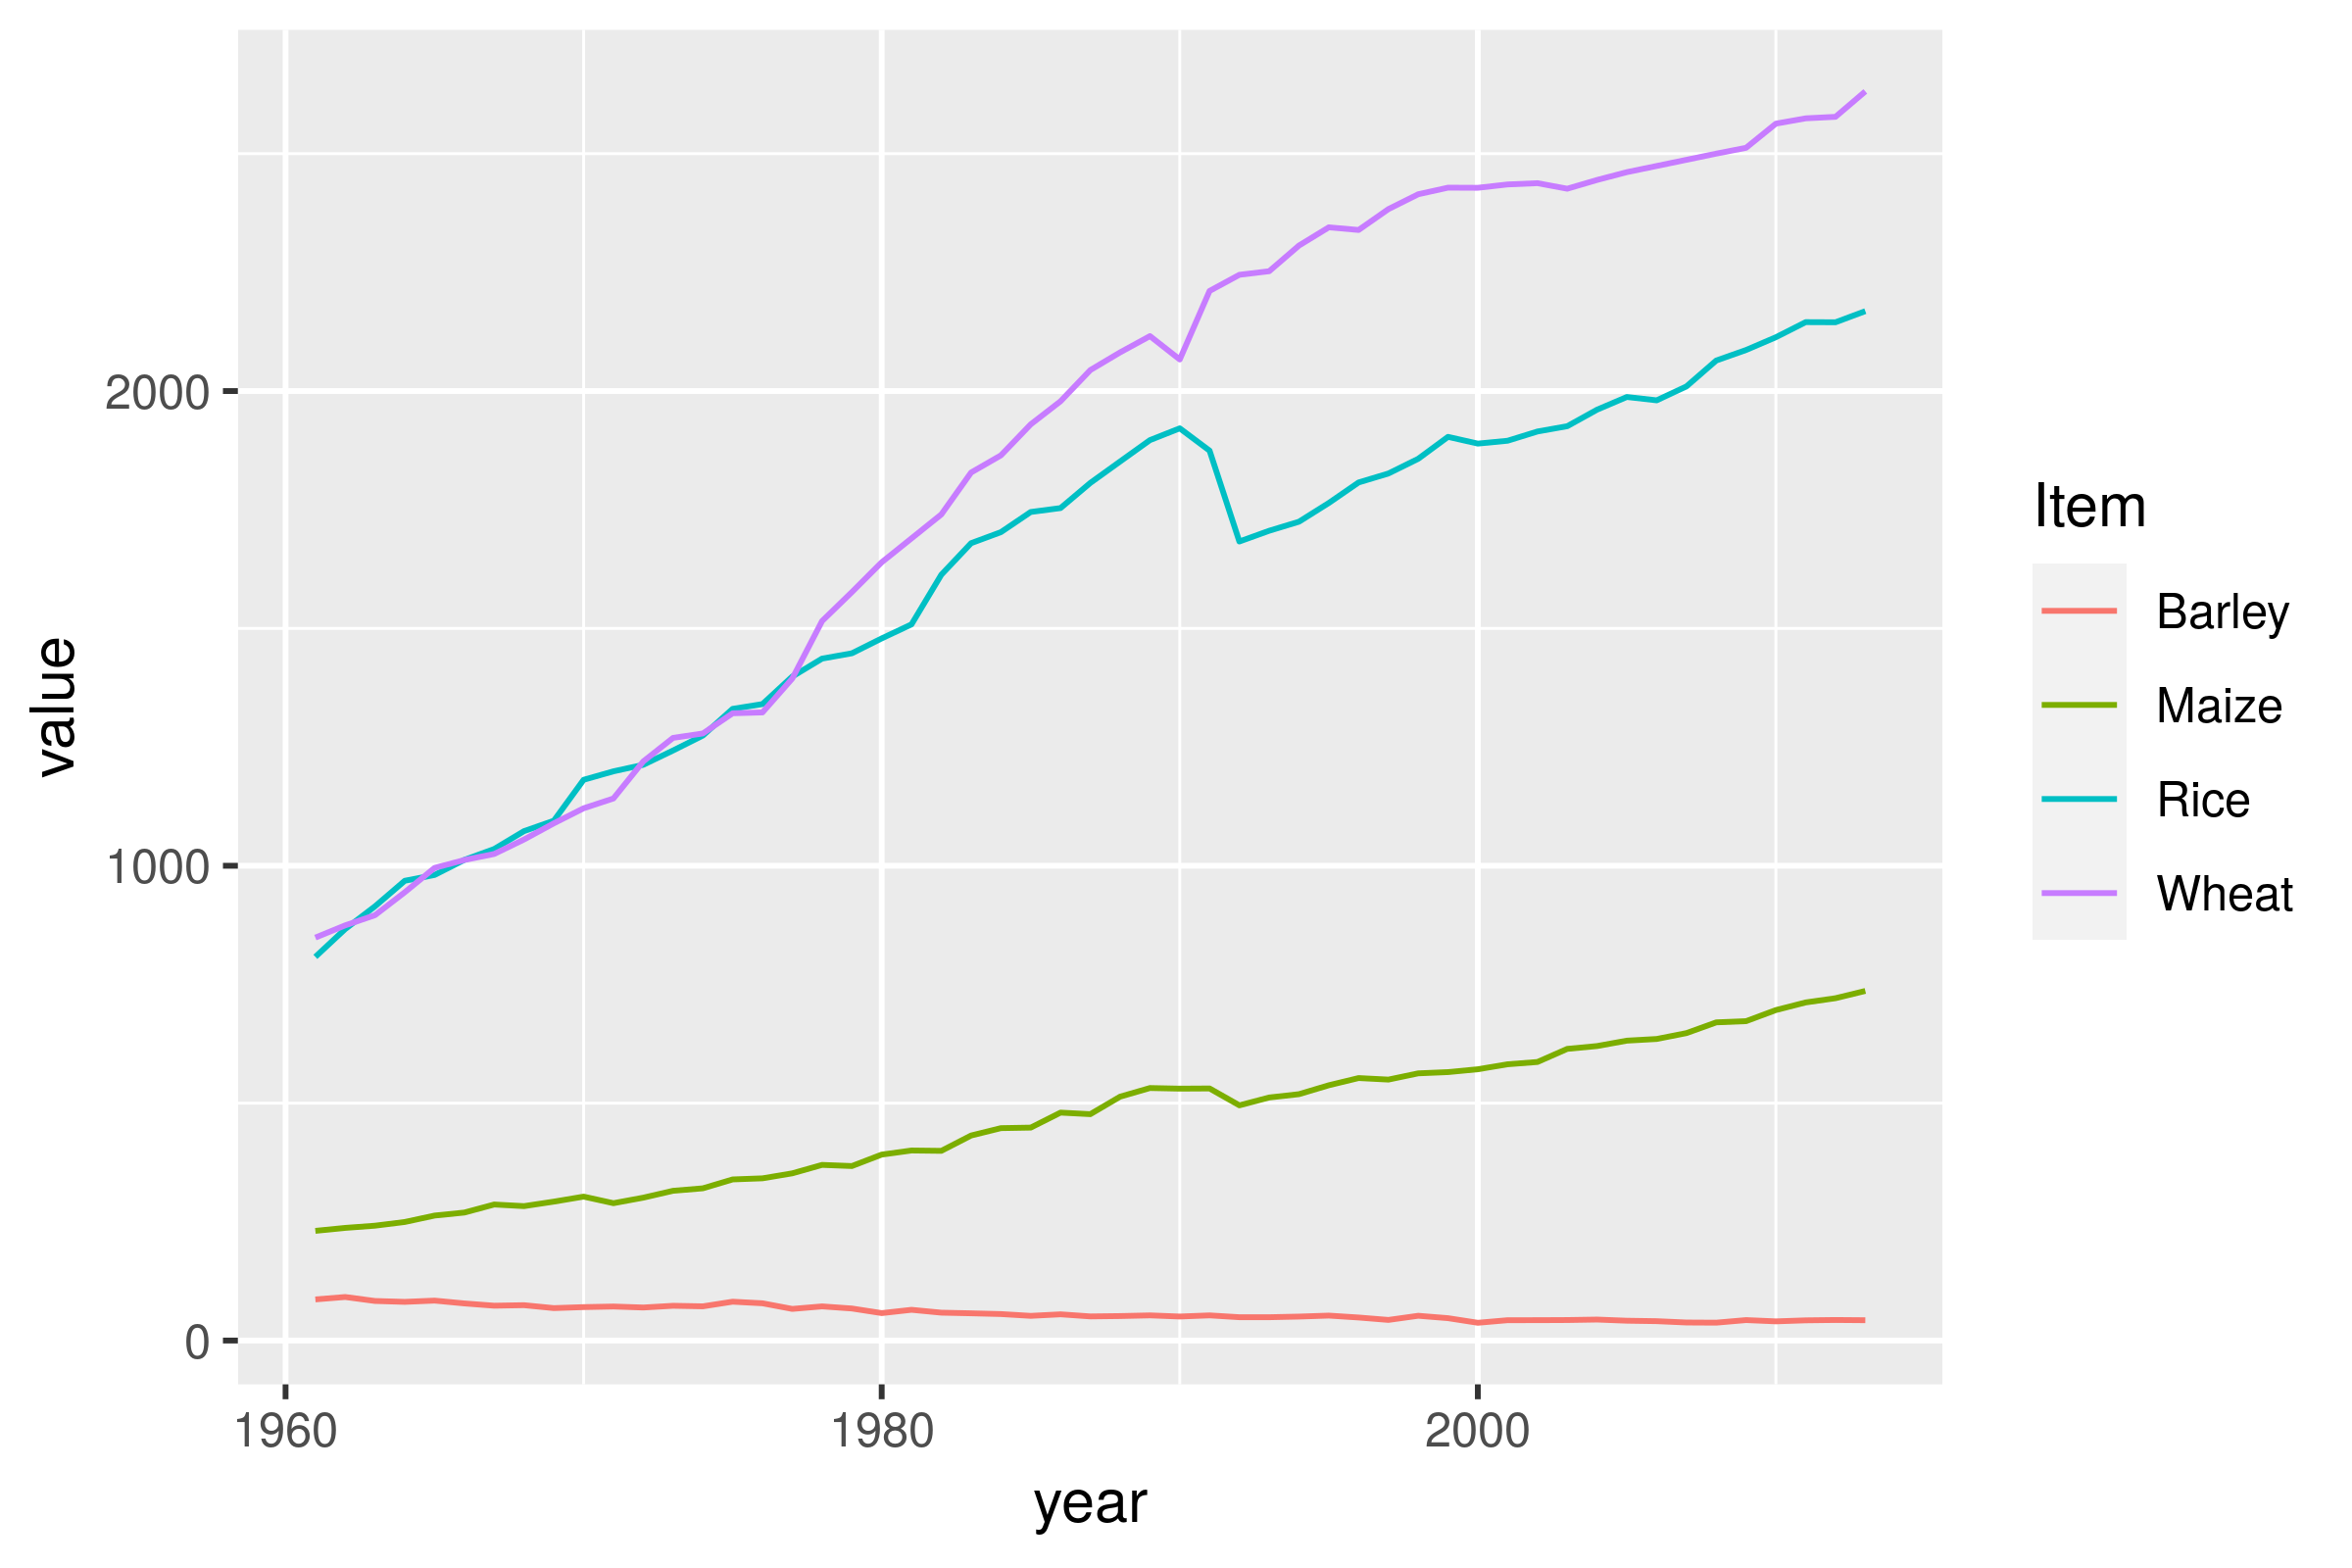

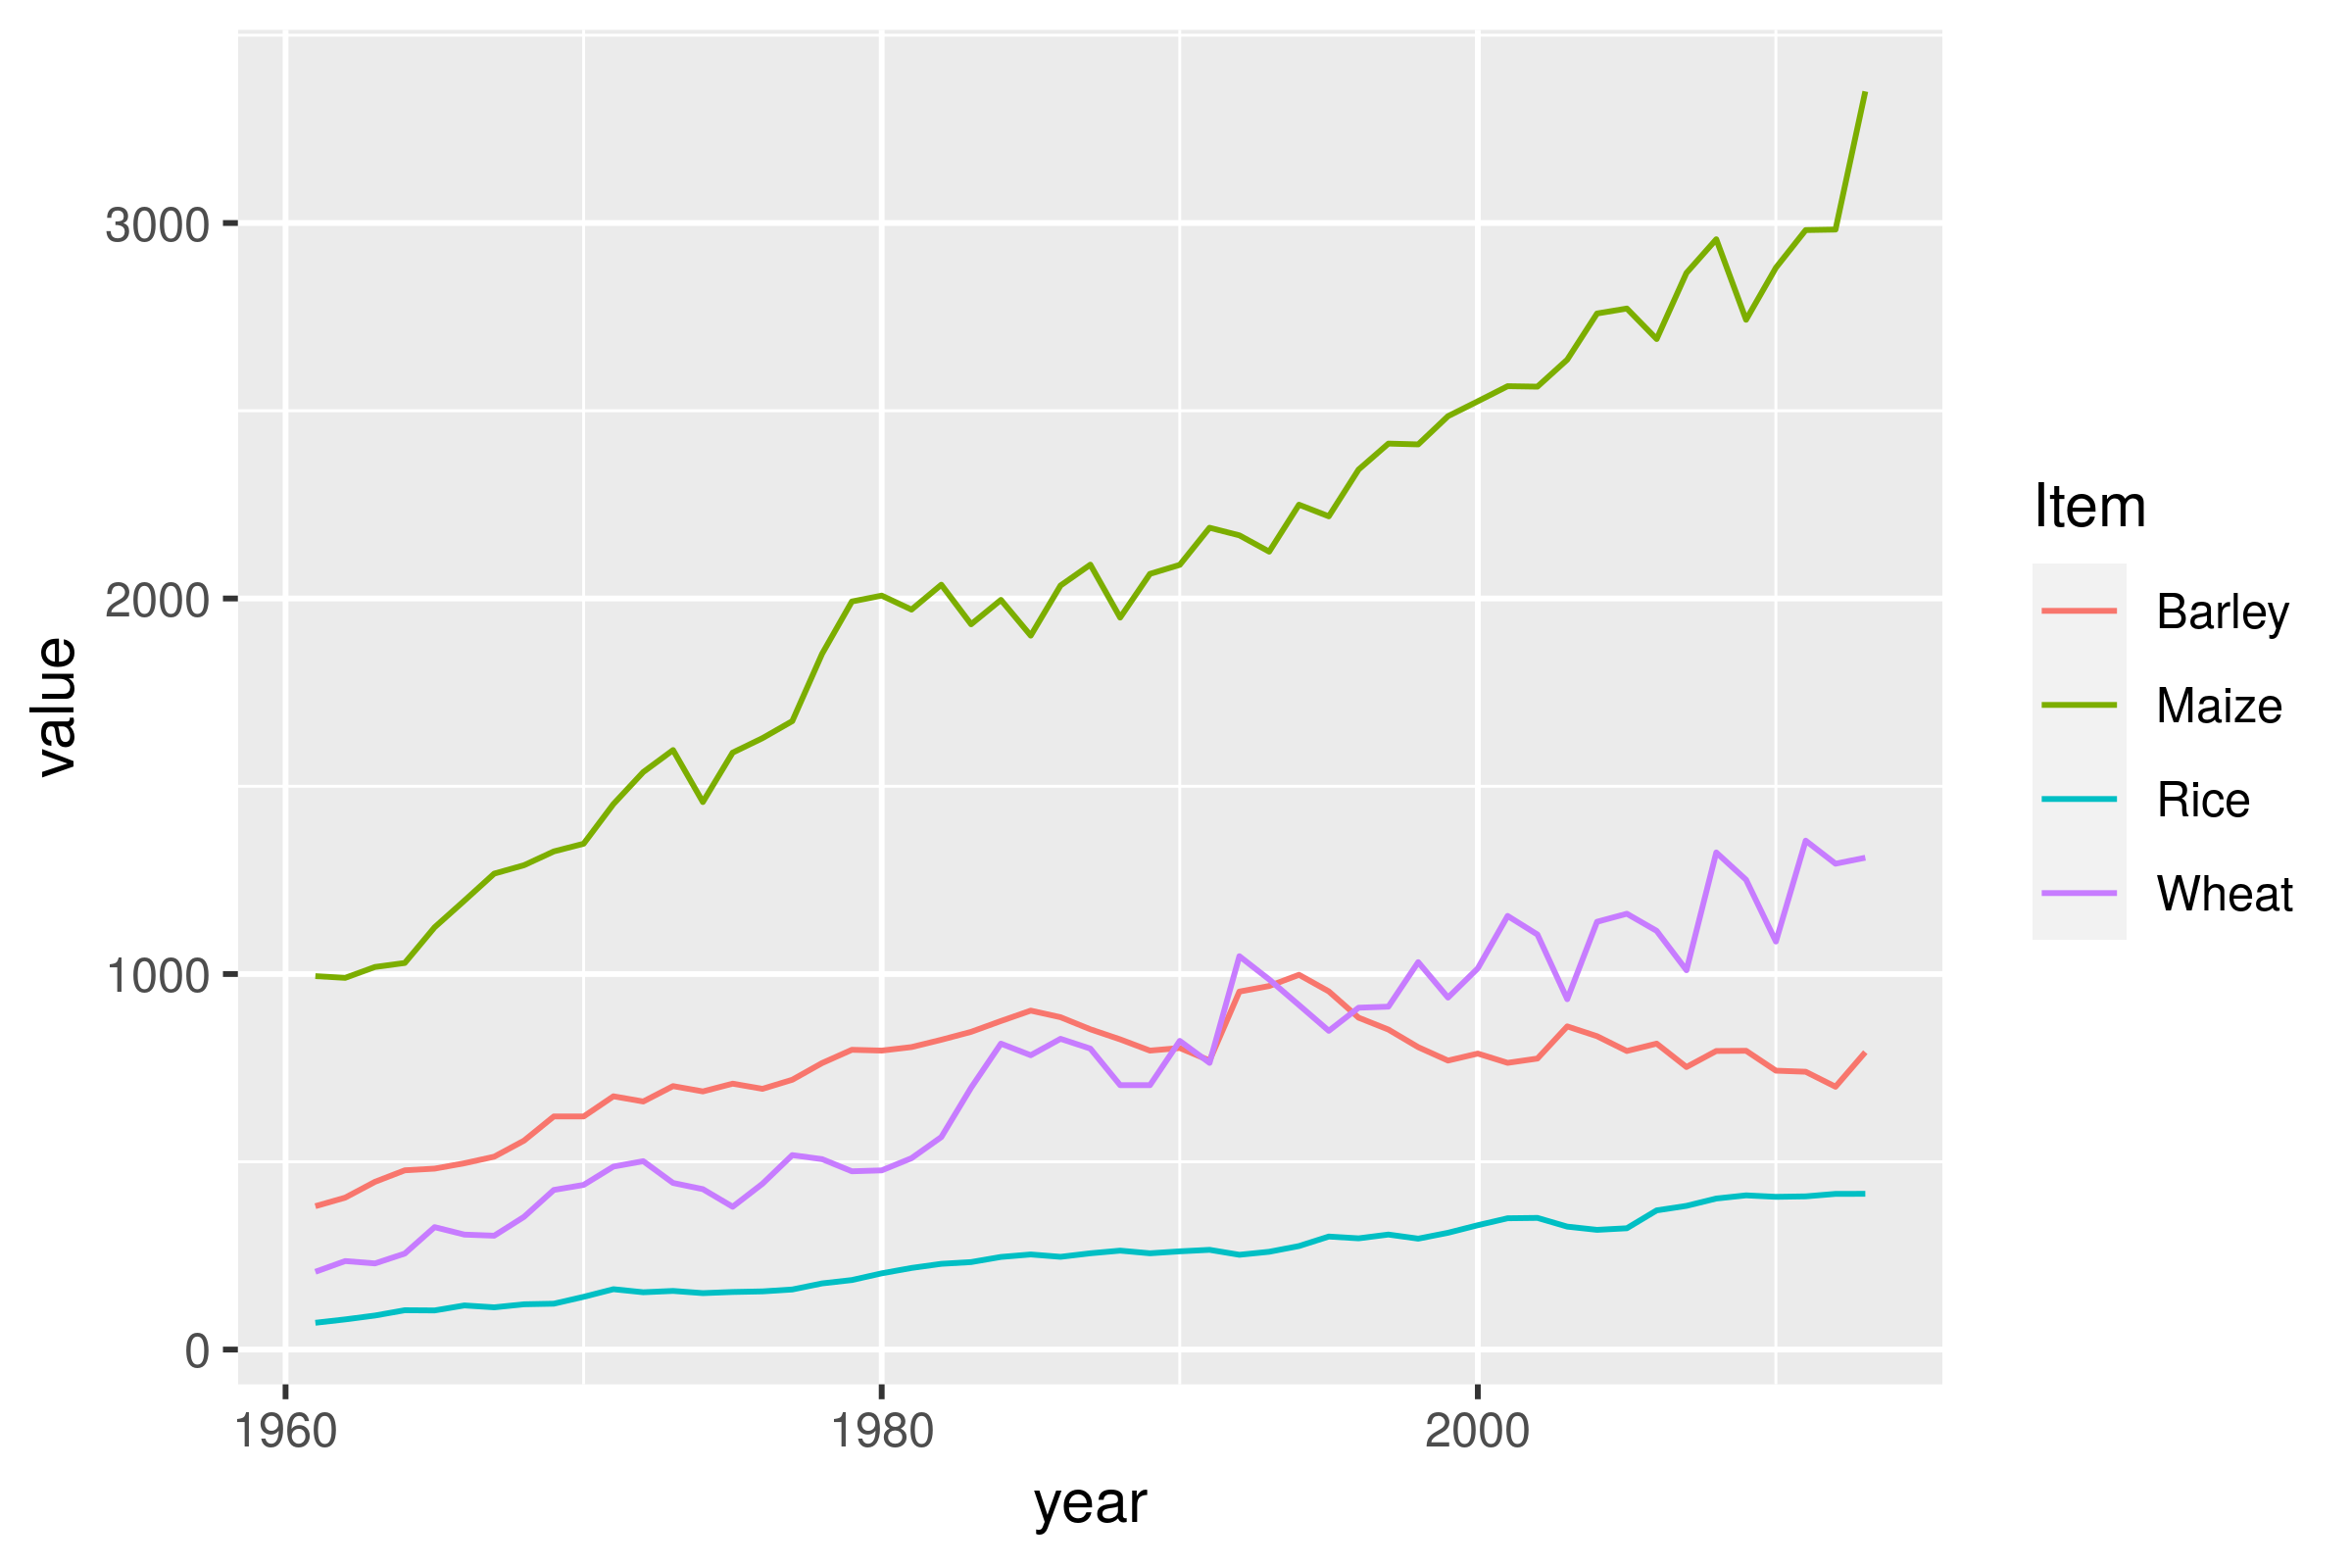

In [91]:
library(dplyr)
fao_sum<-fao %>% group_by(Item,Element,year) %>% summarise(value=mean(value,na.rm=T))

options(repr.plot.height=4,repr.plot.width=6)
library(ggplot2)
ggplot(subset(fao_sum,Element=="Food"),aes(x=year,y=value,color=Item))+geom_line()
ggplot(subset(fao_sum,Element=="Feed"),aes(x=year,y=value,color=Item))+geom_line()

In [92]:
model<-lm(data=fao,formula="value~year+Item+Element")
summary(model)


Call:
lm(formula = "value~year+Item+Element", data = fao)

Residuals:
   Min     1Q Median     3Q    Max 
 -2074  -1282   -875   -284 154199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -37257.797   3523.325 -10.575   <2e-16 ***
year            18.951      1.772  10.698   <2e-16 ***
ItemMaize      911.406     74.965  12.158   <2e-16 ***
ItemRice       867.701     80.024  10.843   <2e-16 ***
ItemWheat     1182.459     79.054  14.958   <2e-16 ***
ElementFood   -134.079     56.314  -2.381   0.0173 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6305 on 53418 degrees of freedom
  (6837 observations deleted due to missingness)
Multiple R-squared:  0.006956,	Adjusted R-squared:  0.006863 
F-statistic: 74.84 on 5 and 53418 DF,  p-value: < 2.2e-16


## Contrastes

Los "contrastes" definidos en el entorno R determinan como las variables categóricas son gestionadas en los modelos. El patrón más comun para los modelos es el "treatment contrasts", que es equivalente a una codificación dummy. Al primer nivel de la variable categórica es se le asigna el valor 0, y los otros niveles se miden a partir de este.

#### Dummy

Como ya habíamos visto, por defecto R utiliza una coficación Dummy de variables categóricas.

El nivel de referencia se elije al que tiene el nivel (level) más bajo:

In [93]:
levels(fao$Item)

[1] "Barley" "Maize"  "Rice"   "Wheat"

In [94]:
contrasts(fao$Item)

,Maize,Rice,Wheat
Barley,0,0,0
Maize,1,0,0
Rice,0,1,0
Wheat,0,0,1


Podemos cambiar el nivel de referencia con la función `cont.trearment` , por ejemplo seleccionamos el Trigo:

In [95]:
ctr<-contr.treatment(4, base = 4)
colnames(ctr)<-c("Cebada","Maiz","Arroz")
ctr

,Cebada,Maiz,Arroz
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,0


In [96]:
contrasts(fao$Item)<-ctr

In [97]:
contrasts(fao$Item)

,Cebada,Maiz,Arroz
Barley,1,0,0
Maize,0,1,0
Rice,0,0,1
Wheat,0,0,0


In [98]:
model<-lm(data=fao,formula="value~year+Item+Element")
summary(model)


Call:
lm(formula = "value~year+Item+Element", data = fao)

Residuals:
   Min     1Q Median     3Q    Max 
 -2074  -1282   -875   -284 154199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36075.339   3523.514 -10.238  < 2e-16 ***
year            18.951      1.772  10.698  < 2e-16 ***
ItemCebada   -1182.459     79.054 -14.958  < 2e-16 ***
ItemMaiz      -271.052     75.682  -3.581 0.000342 ***
ItemArroz     -314.758     80.215  -3.924 8.72e-05 ***
ElementFood   -134.079     56.314  -2.381 0.017273 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6305 on 53418 degrees of freedom
  (6837 observations deleted due to missingness)
Multiple R-squared:  0.006956,	Adjusted R-squared:  0.006863 
F-statistic: 74.84 on 5 and 53418 DF,  p-value: < 2.2e-16


In [99]:
print("Predicción usando el método predict()")
predict(model,data.frame(year=1980,Item="Barley",Element="Feed"))

print("Predicción usando la formula de la regresión:")
model$coef["(Intercept)"]+model$coef["year"]*1980+model$coef["ItemCebada"]

[1] "Predicción usando el método predict()"


1 
266.1376

[1] "Predicción usando la formula de la regresión:"


(Intercept) 
   266.1376

Esto es equivalente a crear 3 columnas más llamadas ItemCebada, ItemMaiz e ItemArroz:

In [100]:
fao_dummy<-fao
fao_dummy$ItemCebada<-ifelse(fao_dummy$Item=="Barley",1,0)
fao_dummy$ItemMaiz<-ifelse(fao_dummy$Item=="Maize",1,0)
fao_dummy$ItemArroz<-ifelse(fao_dummy$Item=="Rice",1,0)
head(fao_dummy)

,Area,Item,Element,variable,value,year,ItemCebada,ItemMaiz,ItemArroz
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Wheat,Food,Y1961,1928,1961,0,0,0
2,Afghanistan,Rice,Food,Y1961,183,1961,0,0,1
3,Afghanistan,Barley,Feed,Y1961,76,1961,1,0,0
4,Afghanistan,Barley,Food,Y1961,237,1961,1,0,0
5,Afghanistan,Maize,Feed,Y1961,210,1961,0,1,0
6,Afghanistan,Maize,Food,Y1961,403,1961,0,1,0


In [101]:
model_dummy<-lm(data=fao_dummy,formula="value~year+Element+ItemCebada+ItemMaiz+ItemArroz")
summary(model_dummy)


Call:
lm(formula = "value~year+Element+ItemCebada+ItemMaiz+ItemArroz", 
    data = fao_dummy)

Residuals:
   Min     1Q Median     3Q    Max 
 -2074  -1282   -875   -284 154199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36075.339   3523.514 -10.238  < 2e-16 ***
year            18.951      1.772  10.698  < 2e-16 ***
ElementFood   -134.079     56.314  -2.381 0.017273 *  
ItemCebada   -1182.459     79.054 -14.958  < 2e-16 ***
ItemMaiz      -271.052     75.682  -3.581 0.000342 ***
ItemArroz     -314.758     80.215  -3.924 8.72e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6305 on 53418 degrees of freedom
  (6837 observations deleted due to missingness)
Multiple R-squared:  0.006956,	Adjusted R-squared:  0.006863 
F-statistic: 74.84 on 5 and 53418 DF,  p-value: < 2.2e-16


####  Codificación polinómica


In [102]:
ctr<-contr.poly(4)
ctr

.L,.Q,.C
-0.6708204,0.5,-0.2236068
-0.2236068,-0.5,0.6708204
0.2236068,-0.5,-0.6708204
0.6708204,0.5,0.2236068


In [103]:
contrasts(fao$Item)<-ctr

In [104]:
contrasts(fao$Item)

,.L,.Q,.C
Barley,-0.6708204,0.5,-0.2236068
Maize,-0.2236068,-0.5,0.6708204
Rice,0.2236068,-0.5,-0.6708204
Wheat,0.6708204,0.5,0.2236068


In [105]:
model<-lm(data=fao,formula="value~year+Item+Element")
summary(model)


Call:
lm(formula = "value~year+Item+Element", data = fao)

Residuals:
   Min     1Q Median     3Q    Max 
 -2074  -1282   -875   -284 154199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36517.406   3522.872 -10.366  < 2e-16 ***
year            18.951      1.772  10.698  < 2e-16 ***
Item.L         783.445     55.845  14.029  < 2e-16 ***
Item.Q        -298.324     54.865  -5.437 5.43e-08 ***
Item.C         293.724     54.350   5.404 6.53e-08 ***
ElementFood   -134.079     56.314  -2.381   0.0173 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6305 on 53418 degrees of freedom
  (6837 observations deleted due to missingness)
Multiple R-squared:  0.006956,	Adjusted R-squared:  0.006863 
F-statistic: 74.84 on 5 and 53418 DF,  p-value: < 2.2e-16


In [106]:
print("Predicción usando el método predict()")
predict(model,data.frame(year=1980,Item="Barley",Element="Feed"))

print("Predicción usando la formula de la regresión:")
model$coef["(Intercept)"]+model$coef["year"]*1980+
 model$coef["Item.L"]*ctr[1,1]+model$coef["Item.Q"]*ctr[1,2]+model$coef["Item.C"]*ctr[1,3]

[1] "Predicción usando el método predict()"


1 
266.1376

[1] "Predicción usando la formula de la regresión:"


(Intercept) 
   266.1376

In [107]:
fao_dummy$valorL<-ctr[as.numeric(fao$Item),1]
fao_dummy$valorQ<-ctr[as.numeric(fao$Item),2]
fao_dummy$valorC<-ctr[as.numeric(fao$Item),3]
head(fao_dummy)

,Area,Item,Element,variable,value,year,ItemCebada,ItemMaiz,ItemArroz,valorL,valorQ,valorC
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Wheat,Food,Y1961,1928,1961,0,0,0,0.6708204,0.5,0.2236068
2,Afghanistan,Rice,Food,Y1961,183,1961,0,0,1,0.2236068,-0.5,-0.6708204
3,Afghanistan,Barley,Feed,Y1961,76,1961,1,0,0,-0.6708204,0.5,-0.2236068
4,Afghanistan,Barley,Food,Y1961,237,1961,1,0,0,-0.6708204,0.5,-0.2236068
5,Afghanistan,Maize,Feed,Y1961,210,1961,0,1,0,-0.2236068,-0.5,0.6708204
6,Afghanistan,Maize,Food,Y1961,403,1961,0,1,0,-0.2236068,-0.5,0.6708204


In [108]:
model_dummy<-lm(data=fao_dummy,formula="value~year+Element+valorL+valorQ+valorC")
summary(model_dummy)


Call:
lm(formula = "value~year+Element+valorL+valorQ+valorC", data = fao_dummy)

Residuals:
   Min     1Q Median     3Q    Max 
 -2074  -1282   -875   -284 154199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36517.406   3522.872 -10.366  < 2e-16 ***
year            18.951      1.772  10.698  < 2e-16 ***
ElementFood   -134.079     56.314  -2.381   0.0173 *  
valorL         783.445     55.845  14.029  < 2e-16 ***
valorQ        -298.324     54.865  -5.437 5.43e-08 ***
valorC         293.724     54.350   5.404 6.53e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6305 on 53418 degrees of freedom
  (6837 observations deleted due to missingness)
Multiple R-squared:  0.006956,	Adjusted R-squared:  0.006863 
F-statistic: 74.84 on 5 and 53418 DF,  p-value: < 2.2e-16


#### Codificacion Helmert

In [109]:
ctr<-contr.helmert(4)
ctr

1,-1,-1,-1
2,1,-1,-1
3,0,2,-1
4,0,0,3


In [110]:
contrasts(fao$Item)<-ctr

In [111]:
model<-lm(data=fao,formula="value~year+Item+Element")
summary(model)


Call:
lm(formula = "value~year+Item+Element", data = fao)

Residuals:
   Min     1Q Median     3Q    Max 
 -2074  -1282   -875   -284 154199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36517.406   3522.872 -10.366  < 2e-16 ***
year            18.951      1.772  10.698  < 2e-16 ***
Item1          455.703     37.483  12.158  < 2e-16 ***
Item2          137.333     22.961   5.981 2.23e-09 ***
Item3          147.356     16.098   9.154  < 2e-16 ***
ElementFood   -134.079     56.314  -2.381   0.0173 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6305 on 53418 degrees of freedom
  (6837 observations deleted due to missingness)
Multiple R-squared:  0.006956,	Adjusted R-squared:  0.006863 
F-statistic: 74.84 on 5 and 53418 DF,  p-value: < 2.2e-16


In [112]:
print("Predicción usando el método predict()")
predict(model,data.frame(year=1980,Item="Barley",Element="Feed"))

print("Predicción usando la formula de la regresión:")
model$coef["(Intercept)"]+model$coef["year"]*1980-
 model$coef["Item1"]-model$coef["Item2"]-model$coef["Item3"]

[1] "Predicción usando el método predict()"


1 
266.1376

[1] "Predicción usando la formula de la regresión:"


(Intercept) 
   266.1376

## Regresión lineal y t-student/ANOVA



Suponiendo que los residuos siguen una distribución gaussiana, se puede calcular la varianza de cada uno de los coeficientes como:
\\[
Var [ \beta' | X ] = s^2 (X^TX)^{-1} = \frac{\varepsilon^2}{n-p} ·  (X^TX)^{-1} = \frac{\sum(Y_i-Y')^2}{n-p} ·  (\sum(X_i-\overline{X}) )^{-1}
\\]

Donde:
* p es el número de grados de liberdad, de coeficientes, en este caso son 2: Intersección y la pendiente.
* n es el número de muestras

La media de los coeficientes vienen dados por el vector $\beta'$. Con la media y la varianza podemos calcular la probabilidad de que el valor de la media estimado esté muy desviado de 0 por puro azar. Eso aparece con el valor Pr(>|t|) en el summary del modelo. Cuanto menos sea este valor más fiable será. Más adelante veremos que significa esta probabilidad en detalle, llamada p-valor.

Donde Pr(>|t|) vendrá a ser un test de dos hipótesis:
* $H_0$ : El valor del coeficiente no es importante para la regresión. Su valor debería ser 0.
* $H_1$ : El valor del coeficiente es importante para la regresión. Su valor debería ser diferente de 0.


El test estadístico que trataremos de medir es el coeficiente de la regresión lineal dividido por la desviación típica:

\\[
t=\frac{coef}{\sigma_M}
\\]


### Ejemplo: Peso de los niños al nacer

Este dataset contien información de bebes recien nacidos y sus padres. Nos vamos a centrar en si la madre era o no fumadora.

In [113]:
bwt<-read.csv("data/birthweight_reduced.csv")
bwt$smoker<-factor(bwt$smoker,labels = c("NO","YES"))

_Repaso t-test_

In [114]:
tw<-t.test(bwt$Birthweight[bwt$smoker=="YES"],bwt$Birthweight[bwt$smoker=="NO"])

[1] "El margen que nos llevaría a rechazar la hipótesis nula está fuera del rango: [ -2.02 , 2.02 ]"


	Welch Two Sample t-test

data:  bwt$Birthweight[bwt$smoker == "YES"] and bwt$Birthweight[bwt$smoker == "NO"]
t = -2.0735, df = 39.662, p-value = 0.04467
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.60512583 -0.02032871
sample estimates:
mean of x mean of y 
 6.877273  7.690000 


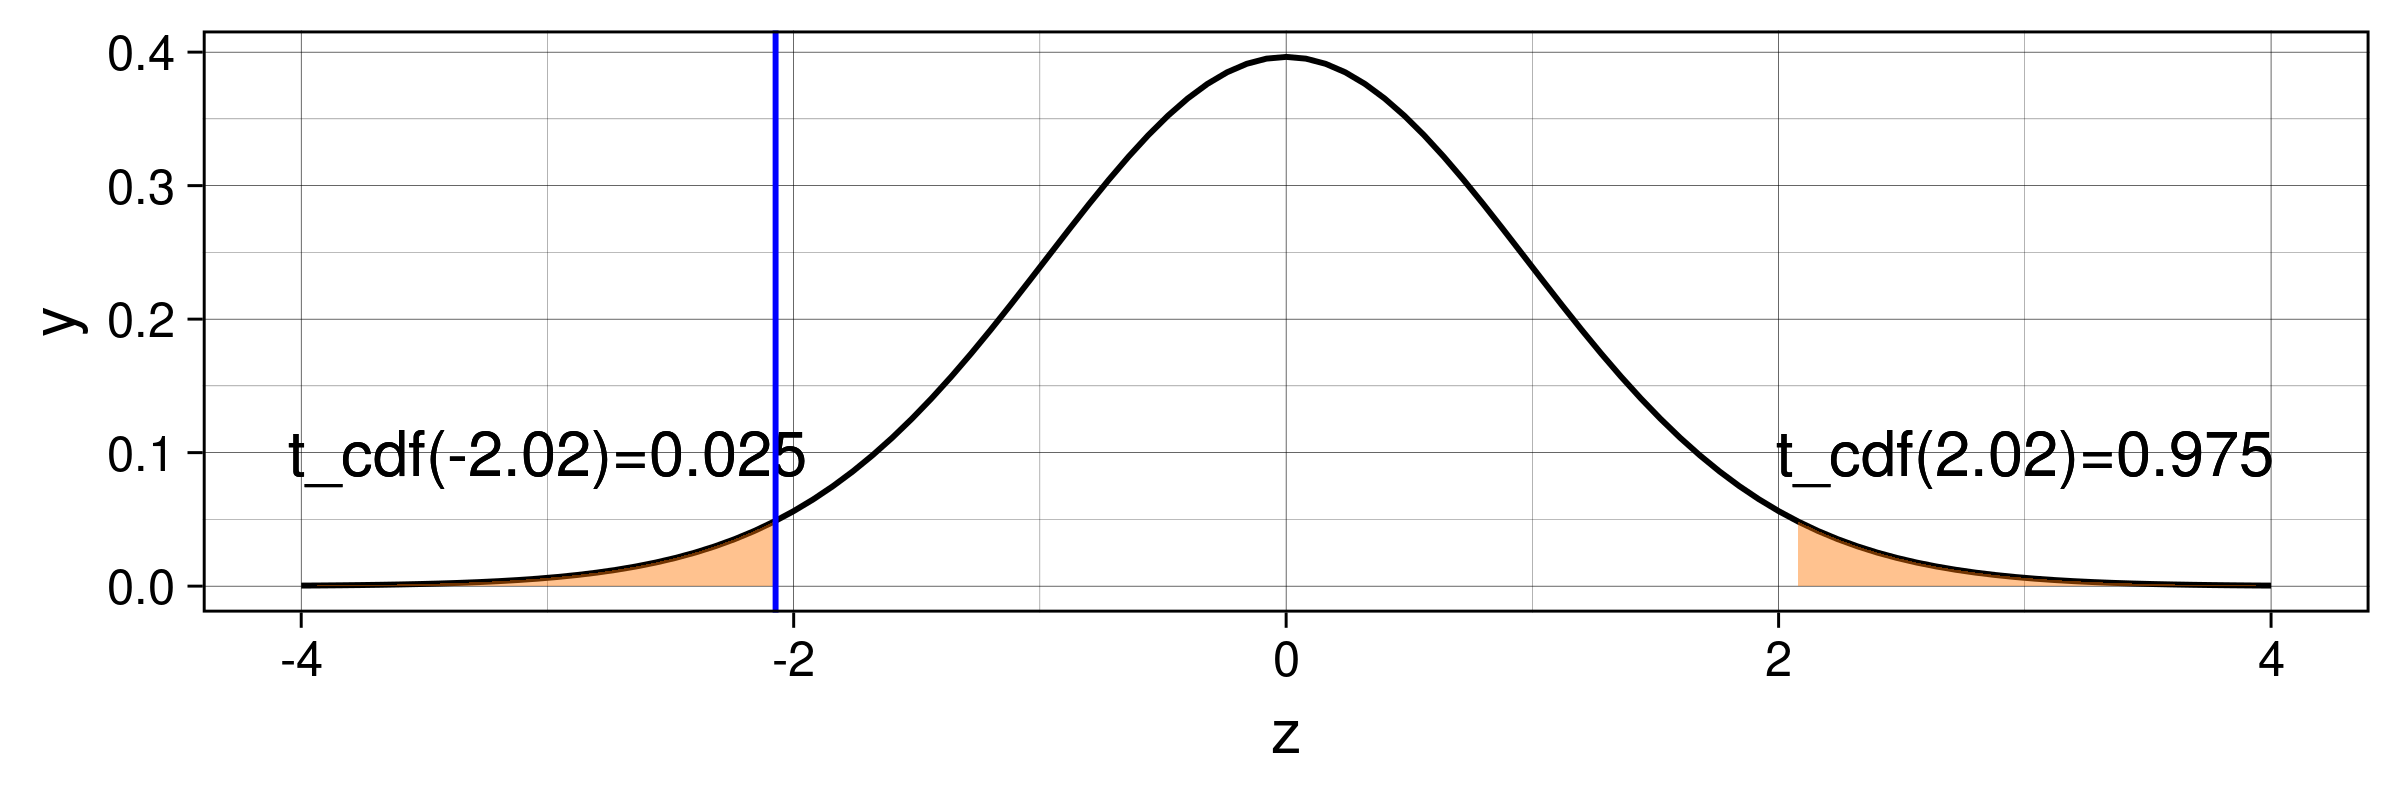

In [115]:
library(ggplot2)
d.f.<-tw$parameter
t<-tw$statistic
loth<-qt(0.025,d.f.,lower.tail = T)
upth<-qt(0.025,d.f.,lower.tail = F)

paste("El margen que nos llevaría a rechazar la hipótesis nula está fuera del rango: [",
      round(loth,2),",",round(upth,2),"]")


qsd009<-function(x){    
    out<-dt(x,d.f.)
    out[x> loth  & x<upth  ]<-NA
    out
}

qsdtest<-function(x){    
    out<-dt(x,d.f.)
    out[x> -abs(t)  & x< abs(t)  ]<-NA
    out
}


options(repr.plot.height=2,repr.plot.width=6)
xdf<-data.frame(z=c(-4,4))
ggplot(xdf,aes(x=z))+stat_function(fun=dt,args = list(df = d.f.))+
  stat_function(fun=qsd009, geom="area",fill="red",alpha=0.3)+
  stat_function(fun=qsdtest, geom="area",fill="yellow",alpha=0.2)+
  geom_text(x=3,y=0.1,size=4,label=paste0("t_cdf(",round(upth,2),")=0.975"))+
  geom_text(x=-3,y=0.1,size=4,label=paste0("t_cdf(",round(loth,2),")=0.025"))+

  geom_vline(xintercept = t,color="blue")+

  theme_linedraw()
options(repr.plot.height=7,repr.plot.width=7)

tw

### ¿Qué sabíamos hasta ahora?

#### Para madres no fumadoras

In [116]:
bwt_nosmoker<-bwt[bwt$smoker=="NO",]
mn<-mean(bwt_nosmoker$Birthweight)
paste("La media de peso de los bebes de las madres no fumadoras es de",mn)
paste("Su desviación típica estimada es de",sd(bwt_nosmoker$Birthweight))

[1] "La media de peso de los bebes de las madres no fumadoras es de 7.69"

[1] "Su desviación típica estimada es de 1.14795011811673"

Sabiendo que el vector de las medias tiene una distribución gaussiana de media $\bar{x}$.
Pero una desviación típica desconocida, estimada a través de la muestra  de $\frac{\sigma}{\sqrt{n}}$ es fácil calcular el intervalo de confianza para la media con una probabilidad de $p$.

Los intervalos de confianza para un p-valor de $p$ y $n$ muestras vendrá dado por la fórmula:

\\[
\begin{split}
\text{Limite inferior} = \bar{x}-t(1-p/2,n-1)·\frac{\sqrt {var[X]}}{\sqrt{n}} \\
\text{Limite superior} = \bar{x}+t(1-p/2,n-1)·\frac{\sqrt {var[X]}}{\sqrt{n}} \\
\end{split}
\\]

Donde t(p,n-1) es la función cumulativa de probabilidad de una distribución t-student con $n-1$ grados de libertad.

In [120]:
p<-0.05
error<-qt(1-p/2,nrow(bwt_nosmoker)-1)*sd(bwt_nosmoker$Birthweight)/sqrt(nrow(bwt_nosmoker))
paste("El error será:",error)
paste("Intervalo de confianza del 95% de la media de no fumadores será: [",mn-error,",",mn+error,"]")
#Equivalente a ejecutar: t.test(bwt_nosmoker$Birthweight)

[1] "El error será: 0.537257193130077"

[1] "Intervalo de confianza del 95% de la media de no fumadores será: [ 7.15274280686992 , 8.22725719313008 ]"

#### Para madres fumadoras

In [121]:
bwt_smoker<-bwt[bwt$smoker=="YES",]
mn_smoker<-mean(bwt_smoker$Birthweight)
paste("La media de peso de los bebes de las madres fumadoras es de",mn_smoker)
paste("Su desviación típica estimada es de",sd(bwt_smoker$Birthweight))

[1] "La media de peso de los bebes de las madres fumadoras es de 6.87727272727273"

[1] "Su desviación típica estimada es de 1.3893924051222"

In [122]:
p<-0.05
error_smoker<-qt(1-p/2,nrow(bwt_smoker)-1)*sd(bwt_smoker$Birthweight)/sqrt(nrow(bwt_smoker))
paste("El error será:",error_smoker)
paste("Intervalo de confianza del 95% de la media de no fumadores será: [",
      mn_smoker-error_smoker,",",mn_smoker+error_smoker,"]")

[1] "El error será: 0.616022081923158"

[1] "Intervalo de confianza del 95% de la media de no fumadores será: [ 6.26125064534957 , 7.49329480919589 ]"

In [123]:
t.test(bwt_smoker$Birthweight)


	One Sample t-test

data:  bwt_smoker$Birthweight
t = 23.217, df = 21, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 6.261251 7.493295
sample estimates:
mean of x 
 6.877273 


### ¿Que nos está diciendo el resumen del modelo?


In [124]:
model <- lm(formula = Birthweight ~ smoker, data = bwt)
summary(model)


Call:
lm(formula = Birthweight ~ smoker, data = bwt)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.67727 -0.87727  0.07273  0.91000  3.12273 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.6900     0.2863  26.859   <2e-16 ***
smokerYES    -0.8127     0.3956  -2.054   0.0465 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.28 on 40 degrees of freedom
Multiple R-squared:  0.09545,	Adjusted R-squared:  0.07284 
F-statistic: 4.221 on 1 and 40 DF,  p-value: 0.0465


In [125]:
paste("La media de peso de los bebes de las madres NO fumadoras es de",model$coefficients[1])
paste("La media de peso de los bebes de las madres fumadoras es de",model$coefficients[1]+model$coefficients[2])

[1] "La media de peso de los bebes de las madres NO fumadoras es de 7.69"

[1] "La media de peso de los bebes de las madres fumadoras es de 6.87727272727273"

In [126]:
vcov_matrix <- vcov(model)
paste("La desviación típica del error es:",sqrt(vcov_matrix[1,1]))

[1] "La desviación típica del error es: 0.286305423376061"

In [127]:
p<-0.05
error<-qt(1-p/2,nrow(bwt)-2)*sqrt(vcov_matrix[1,1])
paste("Intervalo de confianza del 95% de la media de no fumadores será: [",
      model$coefficients[1]-error,",",model$coefficients[1]+error,"]")

[1] "Intervalo de confianza del 95% de la media de no fumadores será: [ 7.11135515470342 , 8.26864484529657 ]"

In [128]:
error<-qt(1-p/2,nrow(bwt)-2)*sqrt(vcov_matrix[2,2])
paste("Intervalo de confianza del 95% del aumento de peso debido a que la made es fumadora será: [",
      model$coefficients[2]-error,",",model$coefficients[2]+error,"]")

[1] "Intervalo de confianza del 95% del aumento de peso debido a que la made es fumadora será: [ -1.61224002188676 , -0.0132145235677812 ]"

In [129]:
confint(model,level=1-p)

,2.5 %,97.5 %
(Intercept),7.111355,8.26864485
smokerYES,-1.612240,-0.01321452


In [130]:
model$coefficients[1]+confint(model,level=1-p)[2,]

2.5 %   97.5 % 
6.077760 7.676785

Para ver cual es el peso de los niños de madres fumadores y no fumadoras podríamos hacer:

In [131]:
model <- lm(formula = Birthweight ~ smoker+0, data = bwt)
summary(model)
confint(model,level=1-p)


Call:
lm(formula = Birthweight ~ smoker + 0, data = bwt)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.67727 -0.87727  0.07273  0.91000  3.12273 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
smokerNO    7.6900     0.2863   26.86   <2e-16 ***
smokerYES   6.8773     0.2730   25.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.28 on 40 degrees of freedom
Multiple R-squared:  0.9713,	Adjusted R-squared:  0.9699 
F-statistic: 678.1 on 2 and 40 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
smokerNO,7.111355,8.268645
smokerYES,6.325557,7.428989


### Ejemplo: Efectividad de una dieta

https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv

Los datos contienen información de 76 personas que tomaron una de las tres dietas (1, 2 o 3). Además se aporta información extra como edad, género y altura. El objetivo del estudio es compara cual de las tres dietas era la mejor para perder peso.

In [132]:
diet = read.csv("data/stcp-Rdataset-Diet.csv",row.names=1)
head(diet)
diet$loss <- diet$pre.weight - diet$weight6weeks
diet$Diet <- factor(diet$Diet)
diet$gender<-factor(diet$gender, labels=c("female","male"))
str(diet)

,gender,Age,Height,pre.weight,Diet,weight6weeks
,<int>,<int>,<int>,<int>,<int>,<dbl>
25,NA,41,171,60,2,60.0
26,NA,32,174,103,2,103.0
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1


'data.frame':	78 obs. of  7 variables:
 $ gender      : Factor w/ 2 levels "female","male": NA NA 1 1 1 1 1 1 1 1 ...
 $ Age         : int  41 32 22 46 55 33 50 50 37 28 ...
 $ Height      : int  171 174 159 192 170 171 170 201 174 176 ...
 $ pre.weight  : int  60 103 58 60 64 64 65 66 67 69 ...
 $ Diet        : Factor w/ 3 levels "1","2","3": 2 2 1 1 1 1 1 1 1 1 ...
 $ weight6weeks: num  60 103 54.2 54 63.3 61.1 62.2 64 65 60.5 ...
 $ loss        : num  0 0 3.8 6 0.7 ...


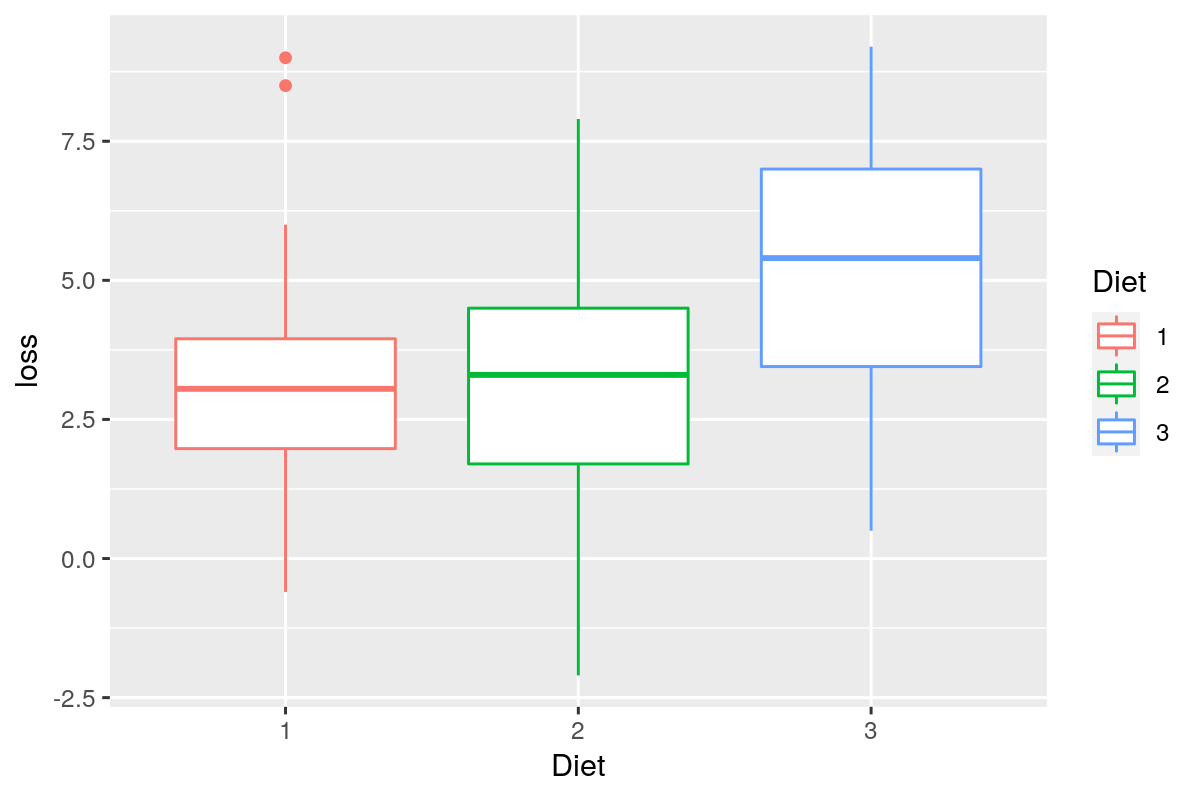

In [133]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 200)

ggplot(diet, aes(y=loss, x=Diet, color=Diet))+geom_boxplot()

#### Efectividad de la dieta

_Tests estadisticos_

Aplicamos el test ANOVA y vemos que efectivamente, hay una diferencia estadística significativa entre las diferentes dietas.

In [134]:
for (v in levels(diet$Diet)){
    print(paste("Diet:",v,"pvalue,",
                shapiro.test(diet$loss[diet$Diet==v])$p.value))
}
anovatest <- aov(loss~Diet, data=diet)
summary(anovatest)

[1] "Diet: 1 pvalue, 0.0774863354064023"
[1] "Diet: 2 pvalue, 0.961174848331039"
[1] "Diet: 3 pvalue, 0.372040025775311"


            Df Sum Sq Mean Sq F value  Pr(>F)   
Diet         2   71.1   35.55   6.197 0.00323 **
Residuals   75  430.2    5.74                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [135]:
TukeyHSD(anovatest)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = loss ~ Diet, data = diet)

$Diet
          diff        lwr      upr     p adj
2-1 -0.2740741 -1.8806155 1.332467 0.9124737
3-1  1.8481481  0.2416067 3.454690 0.0201413
3-2  2.1222222  0.5636481 3.680796 0.0047819


_Regresión lineal_

La regresión lineal nos muestra que apenas hay diferencia entre la dieta1 y dieta2, pero la dieta3 si que es mejor.

In [136]:
model<-lm(data=diet,formula=loss~ Diet)
summary(model)


Call:
lm(formula = loss ~ Diet, data = diet)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1259 -1.3815  0.1759  1.6519  5.7000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.3000     0.4889   6.750 2.72e-09 ***
Diet2        -0.2741     0.6719  -0.408  0.68449    
Diet3         1.8481     0.6719   2.751  0.00745 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.395 on 75 degrees of freedom
Multiple R-squared:  0.1418,	Adjusted R-squared:  0.1189 
F-statistic: 6.197 on 2 and 75 DF,  p-value: 0.003229


In [137]:
diet3<-mean(subset(diet,Diet==3)$loss)
diet2<-mean(subset(diet,Diet==2)$loss)
diet1<-mean(subset(diet,Diet==1)$loss)

paste("Perdida de peso por dieta 1 : ",diet1, ". Es igual a:", model$coef[1])
paste("Perdida de peso por dieta 2 : ",diet2, ". Es igual a:", model$coef[1]+model$coef[2])
paste("Perdida de peso por dieta 3 : ",diet3, ". Es igual a:", model$coef[1]+model$coef[3])


[1] "Perdida de peso por dieta 1 :  3.3 . Es igual a: 3.3"

[1] "Perdida de peso por dieta 2 :  3.02592592592593 . Es igual a: 3.02592592592593"

[1] "Perdida de peso por dieta 3 :  5.14814814814815 . Es igual a: 5.14814814814815"

#### Adelgazamiento por la dieta y género

In [138]:
summary(aov(loss~Diet+gender,data=diet))

            Df Sum Sq Mean Sq F value  Pr(>F)   
Diet         2   60.5  30.264   5.312 0.00705 **
gender       1    0.2   0.169   0.030 0.86387   
Residuals   72  410.2   5.698                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
2 observations deleted due to missingness

In [139]:
summary(lm(data=diet,formula=loss~ Diet+gender))


Call:
lm(formula = loss ~ Diet + gender, data = diet)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3262 -1.4018  0.1218  1.6941  5.6445 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.26038    0.53890   6.050  5.9e-08 ***
Diet2       -0.03422    0.68226  -0.050  0.96014    
Diet3        1.84551    0.66982   2.755  0.00742 ** 
gendermale   0.09508    0.55258   0.172  0.86387    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.387 on 72 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1289,	Adjusted R-squared:  0.09259 
F-statistic: 3.551 on 3 and 72 DF,  p-value: 0.01855


Ser hombre o mujer parece no aumentar las probabilidades de perder peso. La regresión lineal nos dice que de media los hombres pierden 0.09 kg más que las mujeres, pero la precisión de este número no es estadísticamente significativa.

#### Efectividad de la dieta en el género

In [140]:
summary(aov(loss~Diet*gender,data=diet))

            Df Sum Sq Mean Sq F value  Pr(>F)   
Diet         2   60.5  30.264   5.629 0.00541 **
gender       1    0.2   0.169   0.031 0.85991   
Diet:gender  2   33.9  16.952   3.153 0.04884 * 
Residuals   70  376.3   5.376                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
2 observations deleted due to missingness

In [141]:
model<-lm(data=diet,formula=loss~ Diet*gender)
summary(model)


Call:
lm(formula = loss ~ Diet * gender, data = diet)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5091 -1.2958  0.0705  1.2159  5.4500 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.0500     0.6197   4.922 5.49e-06 ***
Diet2             -0.4429     0.8764  -0.505   0.6149    
Diet3              2.8300     0.8616   3.284   0.0016 ** 
gendermale         0.6000     0.9600   0.625   0.5340    
Diet2:gendermale   0.9019     1.3395   0.673   0.5030    
Diet3:gendermale  -2.2467     1.3145  -1.709   0.0919 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.319 on 70 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.2009,	Adjusted R-squared:  0.1438 
F-statistic: 3.519 on 5 and 70 DF,  p-value: 0.006775


Parece que la dieta 3 es más efectiva en mujeres que hombres.

In [142]:
lossmale3<-mean(subset(diet,gender=="male" & Diet==3)$loss)
lossfemale3<-mean(subset(diet,gender=="female" & Diet==3)$loss)

paste("Perdida de peso por dieta 3 en mujeres: ", lossfemale3,      
       ". Es igual a:", model$coef['(Intercept)']+model$coef['Diet3'])
paste("Perdida de peso por dieta 3 en hombres: ", lossmale3,
      ". Es igual a:",
      model$coef['(Intercept)']+model$coef['Diet3']+model$coef['gendermale']+model$coef['Diet3:gendermale'])

[1] "Perdida de peso por dieta 3 en mujeres:  5.88 . Es igual a: 5.88"

[1] "Perdida de peso por dieta 3 en hombres:  4.23333333333333 . Es igual a: 4.23333333333333"